In [1]:
import matplotlib.pyplot as plt
import numpy as np
from svdutils_Zhicai import train_model, get_err, train_model_bias, get_err_bias

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

## Task 1: use the code from homework 5

In [3]:
train_model(M, N, 20, 0.03, 0.12, Y_train, 1e-5, 300, True)

Initial error = 6.9180975279455375
After epoch: 0, error = 0.5000699286023484, eps = 0.9277156867791579
After epoch: 1, error = 0.4342149917584362, eps = 0.010260930764874202
After epoch: 2, error = 0.4152182372777319, eps = 0.0029599053894140957
After epoch: 3, error = 0.39665684594209333, eps = 0.002892070974817575
After epoch: 4, error = 0.3886882925949242, eps = 0.0012415891368221298
After epoch: 5, error = 0.3830434354039598, eps = 0.0008795314609650636
After epoch: 6, error = 0.37485608025186834, eps = 0.001275680888771706
After epoch: 7, error = 0.3679563050833031, eps = 0.0010750616231802006
After epoch: 8, error = 0.3631916956635816, eps = 0.0007423790792375392
After epoch: 9, error = 0.365995548414759, eps = 0.00043687140757455383
After epoch: 10, error = 0.356179819325788, eps = 0.001529399638290044
After epoch: 11, error = 0.3523932538624742, eps = 0.0005899889654106983
After epoch: 12, error = 0.34880273984613125, eps = 0.0005594419719713295
After epoch: 13, error = 0.3473

(array([[ 0.04769125,  0.434301  , -0.12319558, ..., -0.72516245,
         -0.72517747,  0.21054406],
        [-0.39380902,  0.70011498, -0.08234387, ..., -0.43208216,
         -0.88016893,  0.19213989],
        [-0.62205755,  0.23867924,  0.38462837, ..., -0.04889735,
         -0.54138122,  0.22437074],
        ...,
        [-0.20920095,  0.57386861,  0.20273295, ..., -0.40652077,
         -1.02012908, -0.1316605 ],
        [-0.29452913,  0.40278357, -0.01055302, ..., -0.45548395,
         -0.99405291, -0.08634439],
        [-0.72506309,  0.50681052,  0.32144616, ..., -0.53206946,
         -0.64213369,  0.27160957]]),
 array([[-0.38116929,  0.40053915,  0.11106199, ..., -0.5372568 ,
         -1.07390957,  0.08983654],
        [-0.28932393,  0.45379836,  0.15374852, ..., -0.7119425 ,
         -0.8930071 ,  0.10265727],
        [-0.09073358, -0.01814441,  0.27836195, ..., -0.72461687,
         -0.59189784,  0.49659657],
        ...,
        [-0.30242478,  0.18973352, -0.33465213, ..., -

In [4]:
## scan E_in and E_out for different lambda
regs = [10**-3, 10**-2, 0.06, 0.08, 10**-1, 0.12, 0.14, 0.20, 1.0]
eta = 0.03
K = 20
E_ins_vs_lambda = np.zeros(len(regs))
E_outs_vs_lambda = np.zeros(len(regs))

for idx in range(len(regs)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, regs[idx]))
    U,V, e_in = train_model(M, N, K, eta, regs[idx], Y_train)
    E_ins_vs_lambda[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_lambda[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
E_in = 0.2366, E_out = 0.6906
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01
E_in = 0.2073, E_out = 0.5827
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
E_in = 0.2477, E_out = 0.4681
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.08
E_in = 0.2571, E_out = 0.4393
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.3018, E_out = 0.4482
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.12
E_in = 0.3620, E_out = 0.4581
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.14
E_in = 0.3482, E_out = 0.4495
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.2
E_in = 0.4232, E_out = 0.4749
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 1.0
E_in = 0.9405, E_out = 0.9582


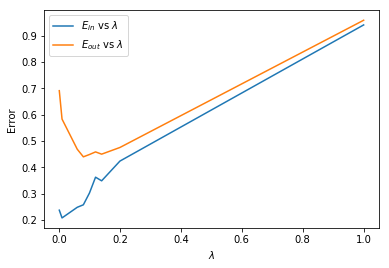

In [5]:
#plot E_in and E_out vs. lambda
plt.plot(regs, E_ins_vs_lambda, label='$E_{in}$ vs $\lambda$')
plt.plot(regs, E_outs_vs_lambda, label='$E_{out}$ vs $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.png')

In [6]:
print(np.argmin(E_ins_vs_lambda))
print(regs[np.argmin(E_ins_vs_lambda)])
print(np.argmin(E_outs_vs_lambda))
print(regs[np.argmin(E_outs_vs_lambda)])

1
0.01
3
0.08


In [7]:
## scan E_in and E_out for different eta
## scan E_in and E_out for different lambda
reg = 0.10
etas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
K = 20
E_ins_vs_eta = np.zeros(len(etas))
E_outs_vs_eta = np.zeros(len(etas))

for idx in range(len(etas)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, etas[idx], reg))
    U,V, e_in = train_model(M, N, K, etas[idx], reg, Y_train)
    E_ins_vs_eta[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_eta[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.001, reg = 0.1
E_in = 0.3013, E_out = 0.4237
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.1
E_in = 0.3040, E_out = 0.4340
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.1
E_in = 0.2879, E_out = 0.4343
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.2875, E_out = 0.4430
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.1
E_in = 0.2967, E_out = 0.4586
Training model with M = 943, N = 1682, k = 20, eta = 0.05, reg = 0.1
E_in = 0.3360, E_out = 0.4742
Training model with M = 943, N = 1682, k = 20, eta = 0.1, reg = 0.1
E_in = 0.3852, E_out = 0.5299


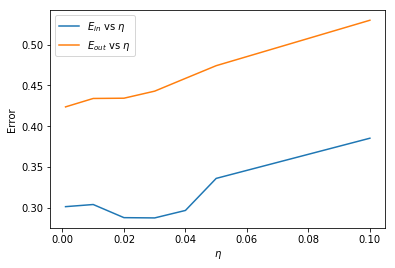

In [8]:
#plot E_in and E_out vs. eta
plt.clf()
plt.plot(etas, E_ins_vs_eta, label='$E_{in}$ vs $\eta$')
plt.plot(etas, E_outs_vs_eta, label='$E_{out}$ vs $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.png')

In [9]:
print(np.argmin(E_ins_vs_eta))
print(regs[np.argmin(E_ins_vs_eta)])
print(np.argmin(E_outs_vs_eta))
print(regs[np.argmin(E_outs_vs_eta)])

3
0.08
0
0.001


In [3]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT, VT, e_in = train_model(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err(UT, VT, Y_test)

Initial error = 6.93539518913333
After epoch: 0, error = 0.5049426522000807, eps = 0.927193384309052
After epoch: 1, error = 0.4235720379643001, eps = 0.012653948344759438
After epoch: 2, error = 0.398690294759795, eps = 0.0038693611470727775
After epoch: 3, error = 0.3822280990508512, eps = 0.0025600368892225427
After epoch: 4, error = 0.3722842424213314, eps = 0.0015463696485445374
After epoch: 5, error = 0.35666395026165343, eps = 0.002429112425597259
After epoch: 6, error = 0.3498687569209705, eps = 0.0010567208608810606
After epoch: 7, error = 0.34429610667896443, eps = 0.0008666031216309621
After epoch: 8, error = 0.3366693210133617, eps = 0.0011860418254855828
After epoch: 9, error = 0.32812400815595555, eps = 0.001328882035646207
After epoch: 10, error = 0.3272222447145709, eps = 0.000140233278483183
After epoch: 11, error = 0.3197243751486194, eps = 0.0011659940762936275
After epoch: 12, error = 0.3161321614393918, eps = 0.0005586253360235112
After epoch: 13, error = 0.3106423

In [5]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
ratings_all = np.loadtxt('data/data.txt')
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx][0:line_items[idx].find('(')]) #remove the year of the movie from the name
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [155]:
## 10 random movies, 10 most popular movies, and 10 best movies
average_ratings_all = np.zeros(len(movies_all))
num_of_ratings_all = np.zeros(len(movies_all))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
id_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
id_best_10 = average_ratings_all.argsort()[-10:][::-1]

name_most_popular_10 = []
for idx in range(len(id_most_popular_10)):
    name_most_popular_10.append(movies_all[id_most_popular_10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_most_popular_10[idx]], average_ratings_all[id_most_popular_10[idx]]))
    
name_best_10 = []
for idx in range(len(id_best_10)):
    name_best_10.append(movies_all[id_best_10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_best_10[idx]], average_ratings_all[id_best_10[idx]]))
    #print(average_ratings_all[id_best_10[idx]])
    #print(num_of_ratings_all[id_best_10[idx]])

## 10 random movies
id_all = np.arange(len(movies_all))
np.random.shuffle(id_all)
id_random10 = id_all[:10]
name_random10 = []
for idx in range(len(id_random10)):
    name_random10.append(movies_all[id_random10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_random10[idx]], average_ratings_all[id_random10[idx]]))

## 10 random movies of genre = action
print(id_all)
id_random_action = []
id_random_documentary = []
id_random_drama = []
name_random_action = []
name_random_documentary = []
name_random_drama = []

for idx in id_all:
    if movies_all[idx][3] == 1 and num_of_ratings_all[idx] > 50:
        id_random_action.append(idx)
        name_random_action.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))
    if movies_all[idx][9] == 1 and num_of_ratings_all[idx] > 20:
        id_random_documentary.append(idx)
        name_random_documentary.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))
    if movies_all[idx][10] == 1 and num_of_ratings_all[idx] > 50:
        id_random_drama.append(idx)
        name_random_drama.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))

id_random10_action = id_random_action[:10]
name_random10_action = name_random_action[:10]
id_random10_documentary = id_random_documentary[:10]
name_random10_documentary = name_random_documentary[:10]
id_random10_drama = id_random_drama[:10]
name_random10_drama = name_random_drama[:10]

print('10 random movies')
print(id_random10)
print(name_random10)
print('10 random action movies')
print(id_random10_action)
print(name_random10_action)
print('10 random documentary movies')
print(id_random10_documentary)
print(name_random10_documentary)
print('10 random drama movies')
print(id_random10_drama)
print(name_random10_drama)

print('10 most popular movies')
print(id_most_popular_10)
print(name_most_popular_10)
print('10 best movies')
print(id_best_10)
print(name_best_10)

[ 532 1034 1346 ...  536  688  725]
10 random movies
[ 532 1034 1346  172  868  786  984   94  540 1675]
['Daytrippers, The (15, 3.7)', 'Cool Runnings (68, 3.2)', 'Ballad of Narayama, The (4, 2.8)', 'Princess Bride, The (324, 4.2)', 'Fools Rush In (24, 3.0)', 'Roommates (13, 3.2)', 'Blood & Wine (22, 2.9)', 'Aladdin (219, 3.8)', 'Mortal Kombat (49, 2.9)', 'War at Home, The (1, 2.0)']
10 random action movies
[172, 830, 229, 683, 384, 20, 379, 333, 448, 525]
['Princess Bride, The (324, 4.2)', 'Escape from L.A. (91, 2.5)', 'Star Trek IV: The Voyage Home (199, 3.4)', 'In the Line of Fire (169, 3.8)', 'True Lies (208, 3.6)', 'Muppet Treasure Island (84, 2.8)', 'Star Trek: Generations (116, 3.3)', 'U Turn (64, 3.4)', 'Star Trek: The Motion Picture (117, 3.0)', 'Ben-Hur (124, 3.8)']
10 random documentary movies
[1141, 644, 643, 846, 31, 812, 1021, 1064, 47, 633]
['When We Were Kings (44, 4.0)', 'Paris Is Burning (27, 3.8)', 'Thin Blue Line, The (35, 3.8)', 'Looking for Richard (55, 3.7)', 'Cr

In [214]:
def visualize_V(Vtilt, id_movie, name_movie, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    Vtilt: 2xn matrix 
    id_movie: the id of the movies to visualize
    name_movie: the names of the movies to visualize
    figname: the figure name you want to save
    """   
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
        
    fig = plt.figure()
    fig.set_size_inches(40,30)
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(id_movie)):
        plt.scatter(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]], s=5000, marker='o', color='blue')
        plt.text(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]]-0.3, name_movie[idx], 
                 rotation=45, bbox=dict(facecolor='red', alpha=0.05), fontsize=50,
                 horizontalalignment='center', verticalalignment='center')
        #print(str(Vtiltp[0][id_movie[idx]])+', '+str(Vtiltp[1][id_movie[idx]])+', '+name_movie[idx])
    #plt.xlim(-1.0*np.amax(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(-1.0*np.amax(Vtiltp[1]), np.amax(Vtiltp[1]))
    #plt.xlim(np.amin(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(np.amin(Vtiltp[1]), np.amax(Vtiltp[1]))
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_linewidth(5.5)
    ax.spines['bottom'].set_linewidth(5.5)
    ax.spines['right'].set_linewidth(5.5)
    ax.spines['top'].set_linewidth(5.5)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xticks([-2,-1,1,2], fontsize=60)
    plt.yticks([-2,-1,1,2], fontsize=60)
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0, fontsize=60)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0, fontsize=60)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')


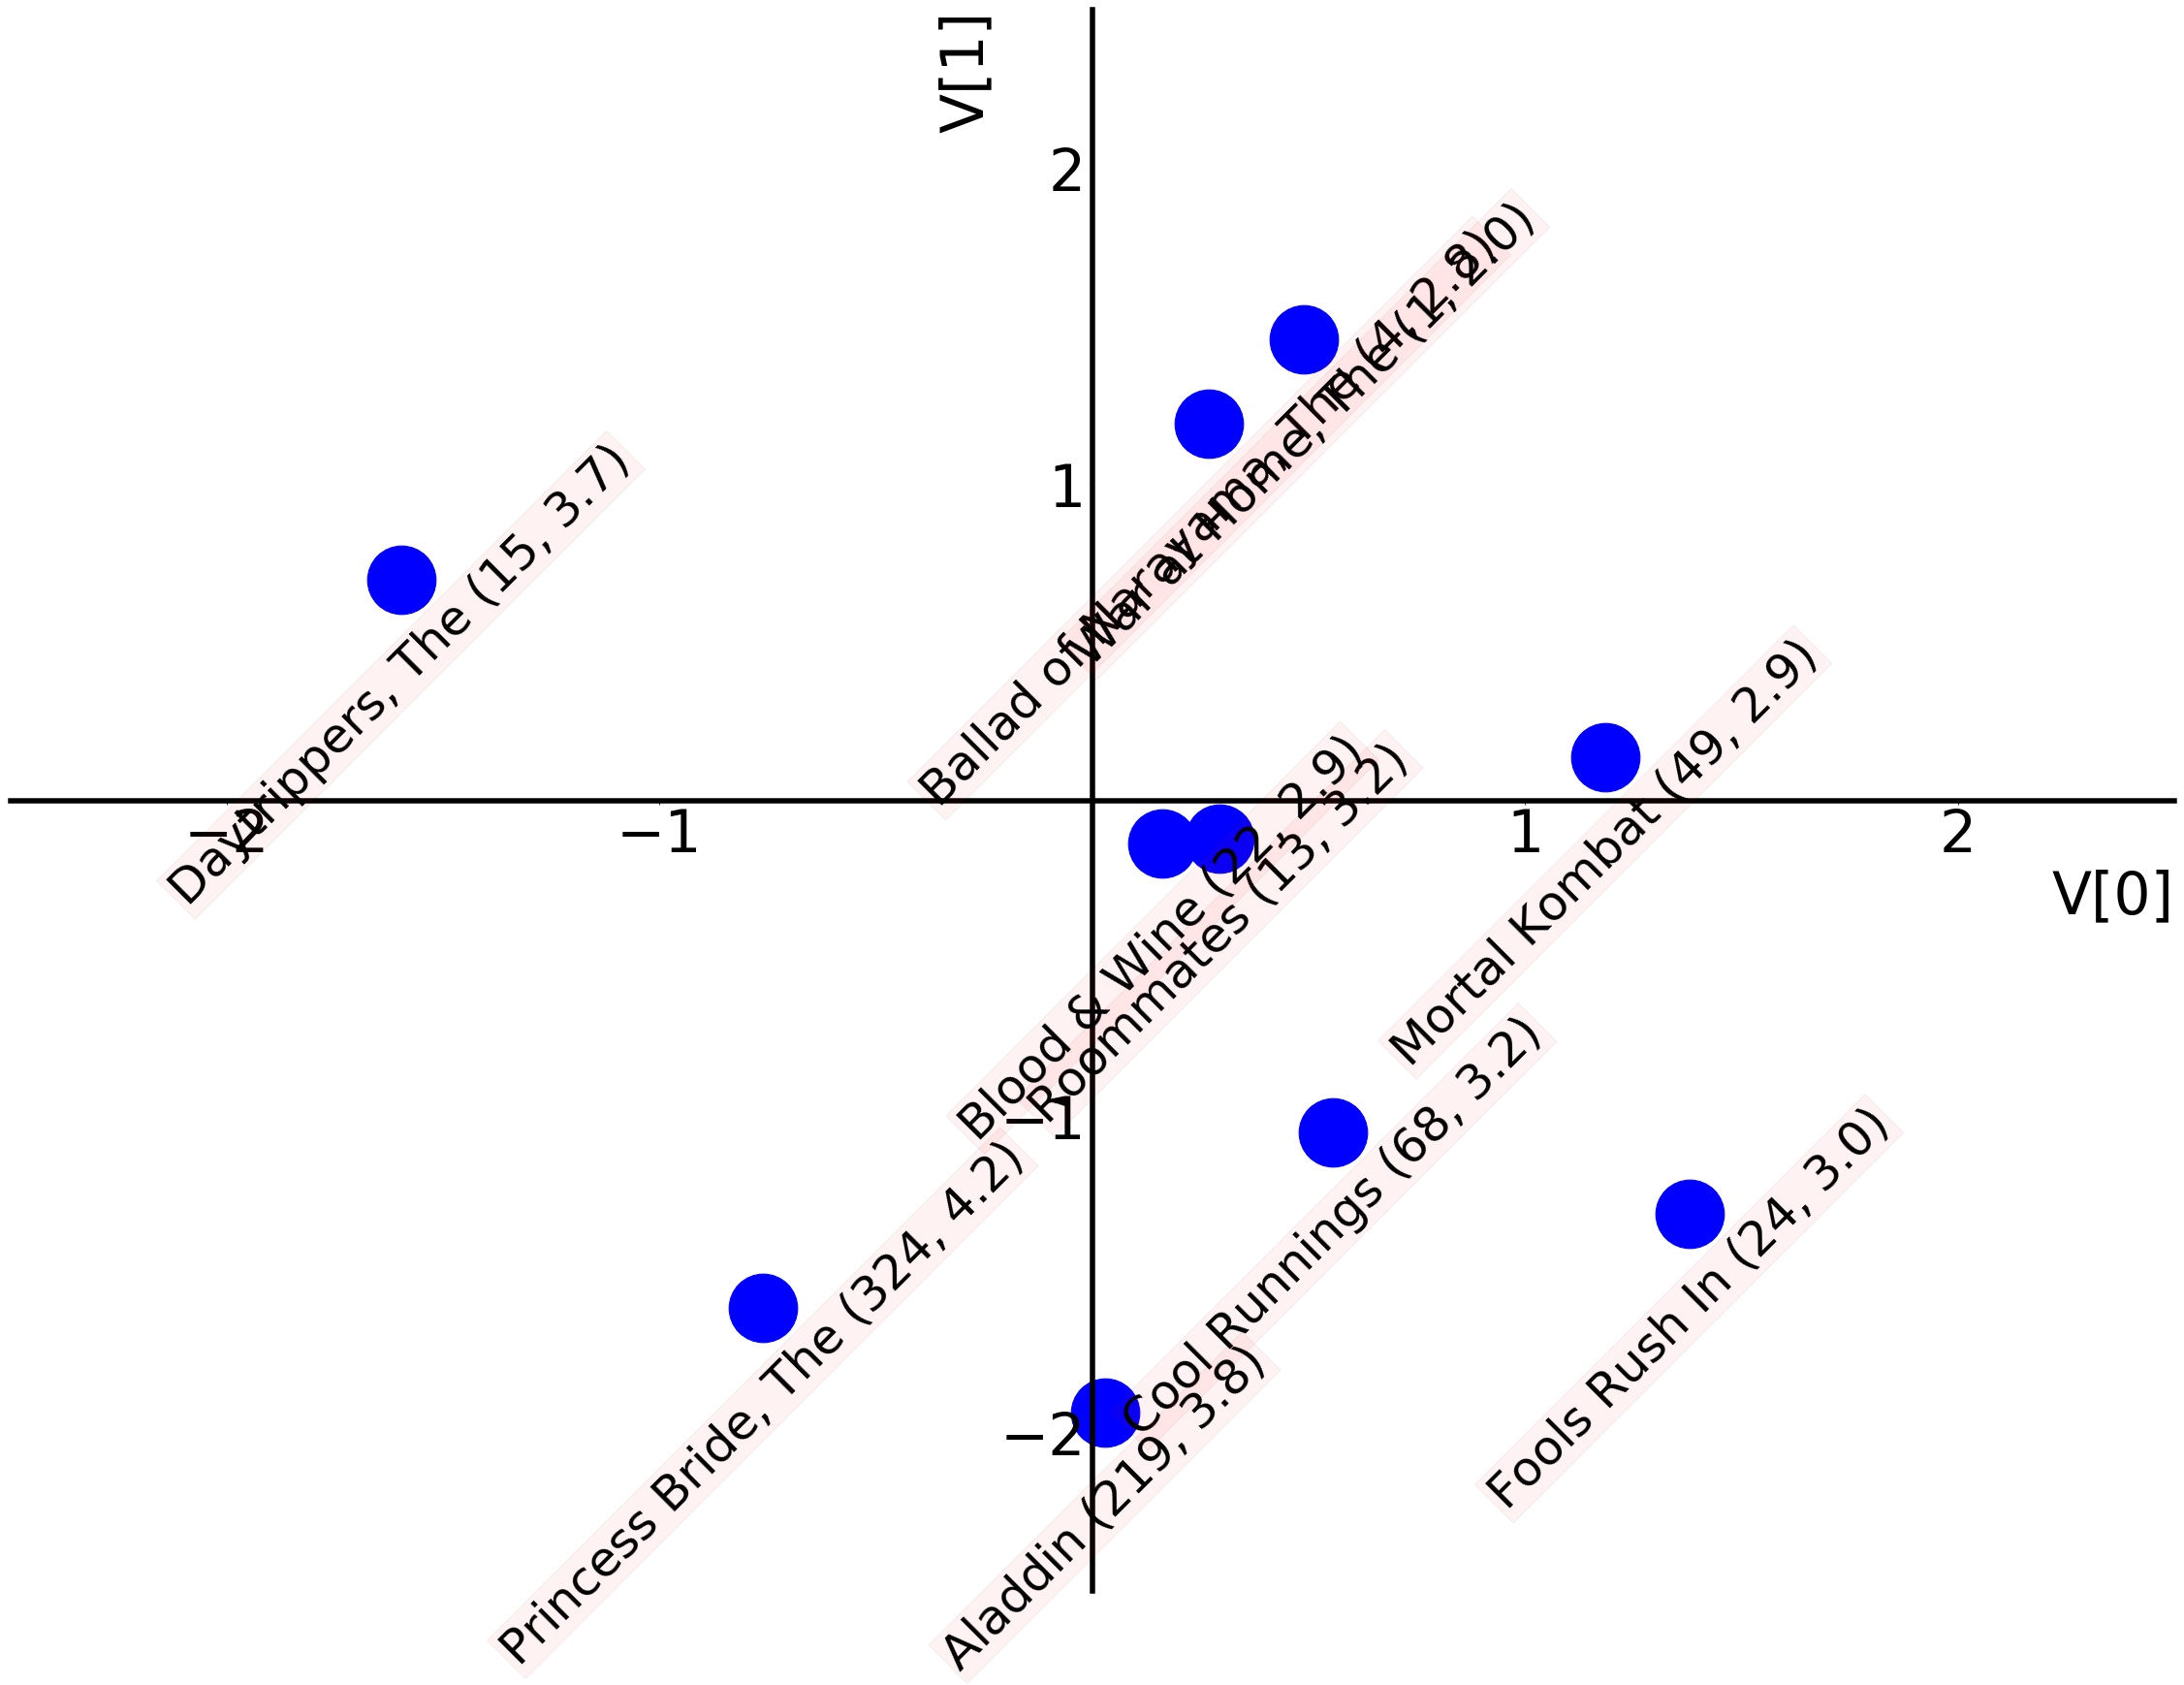

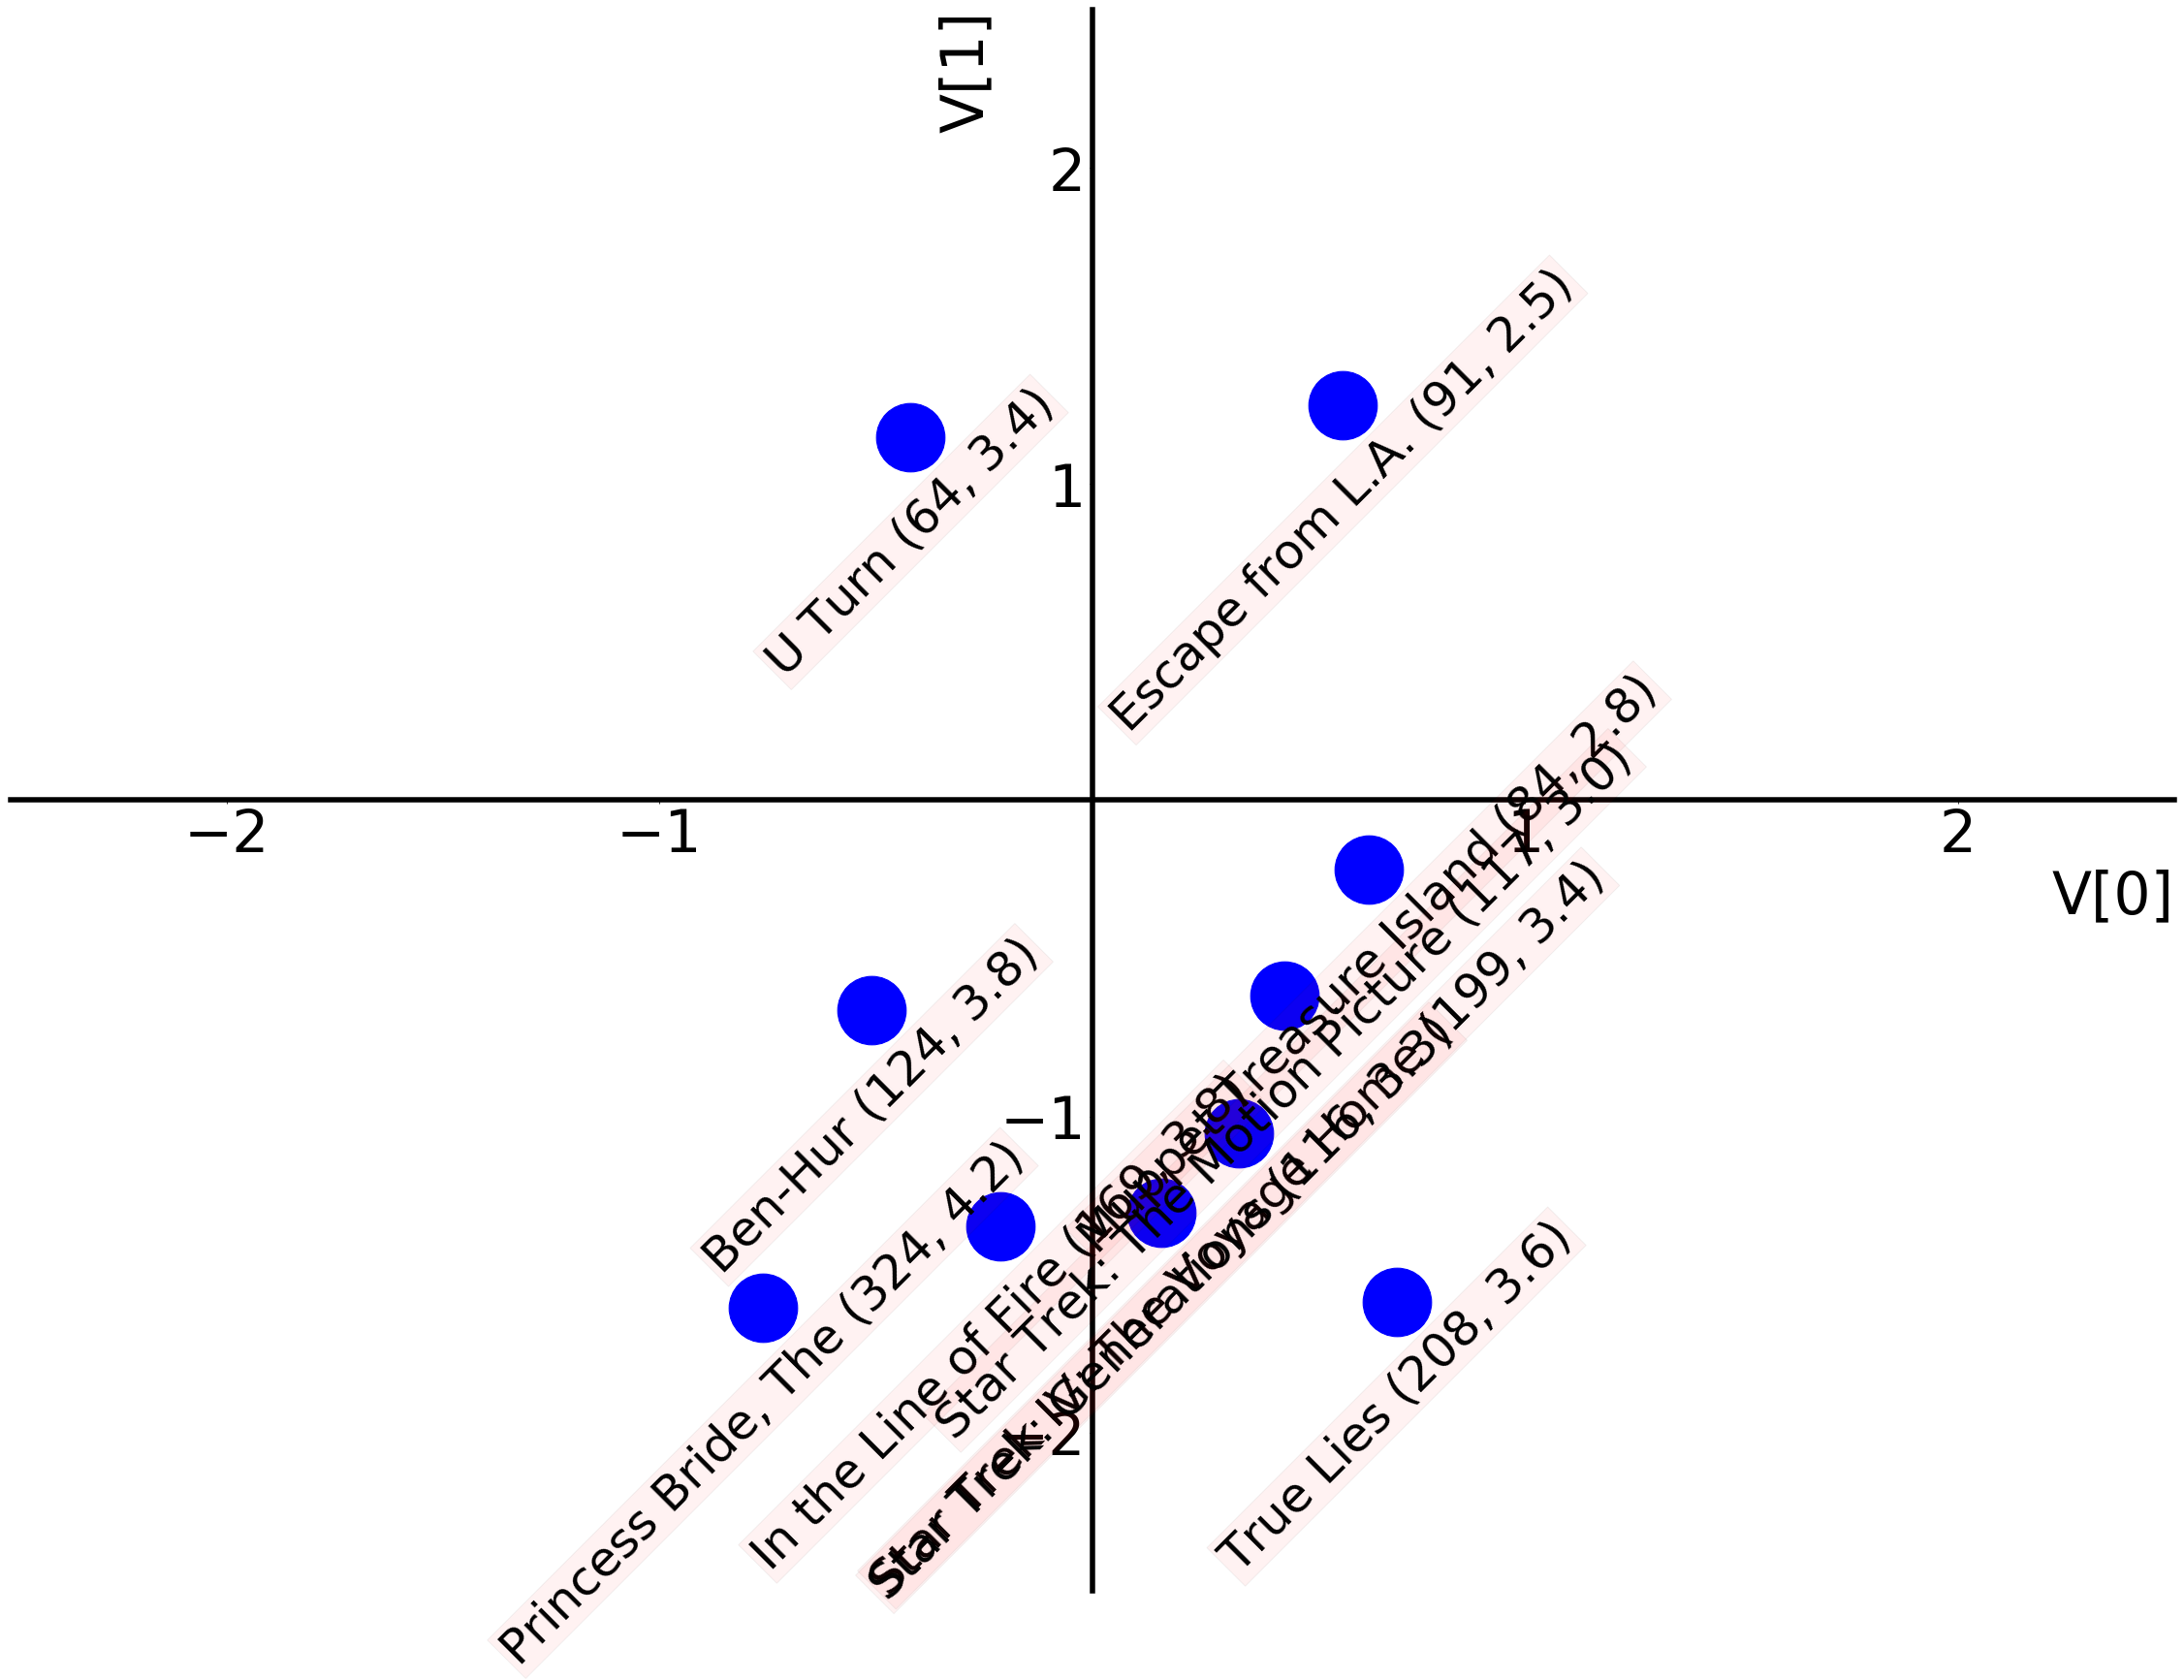

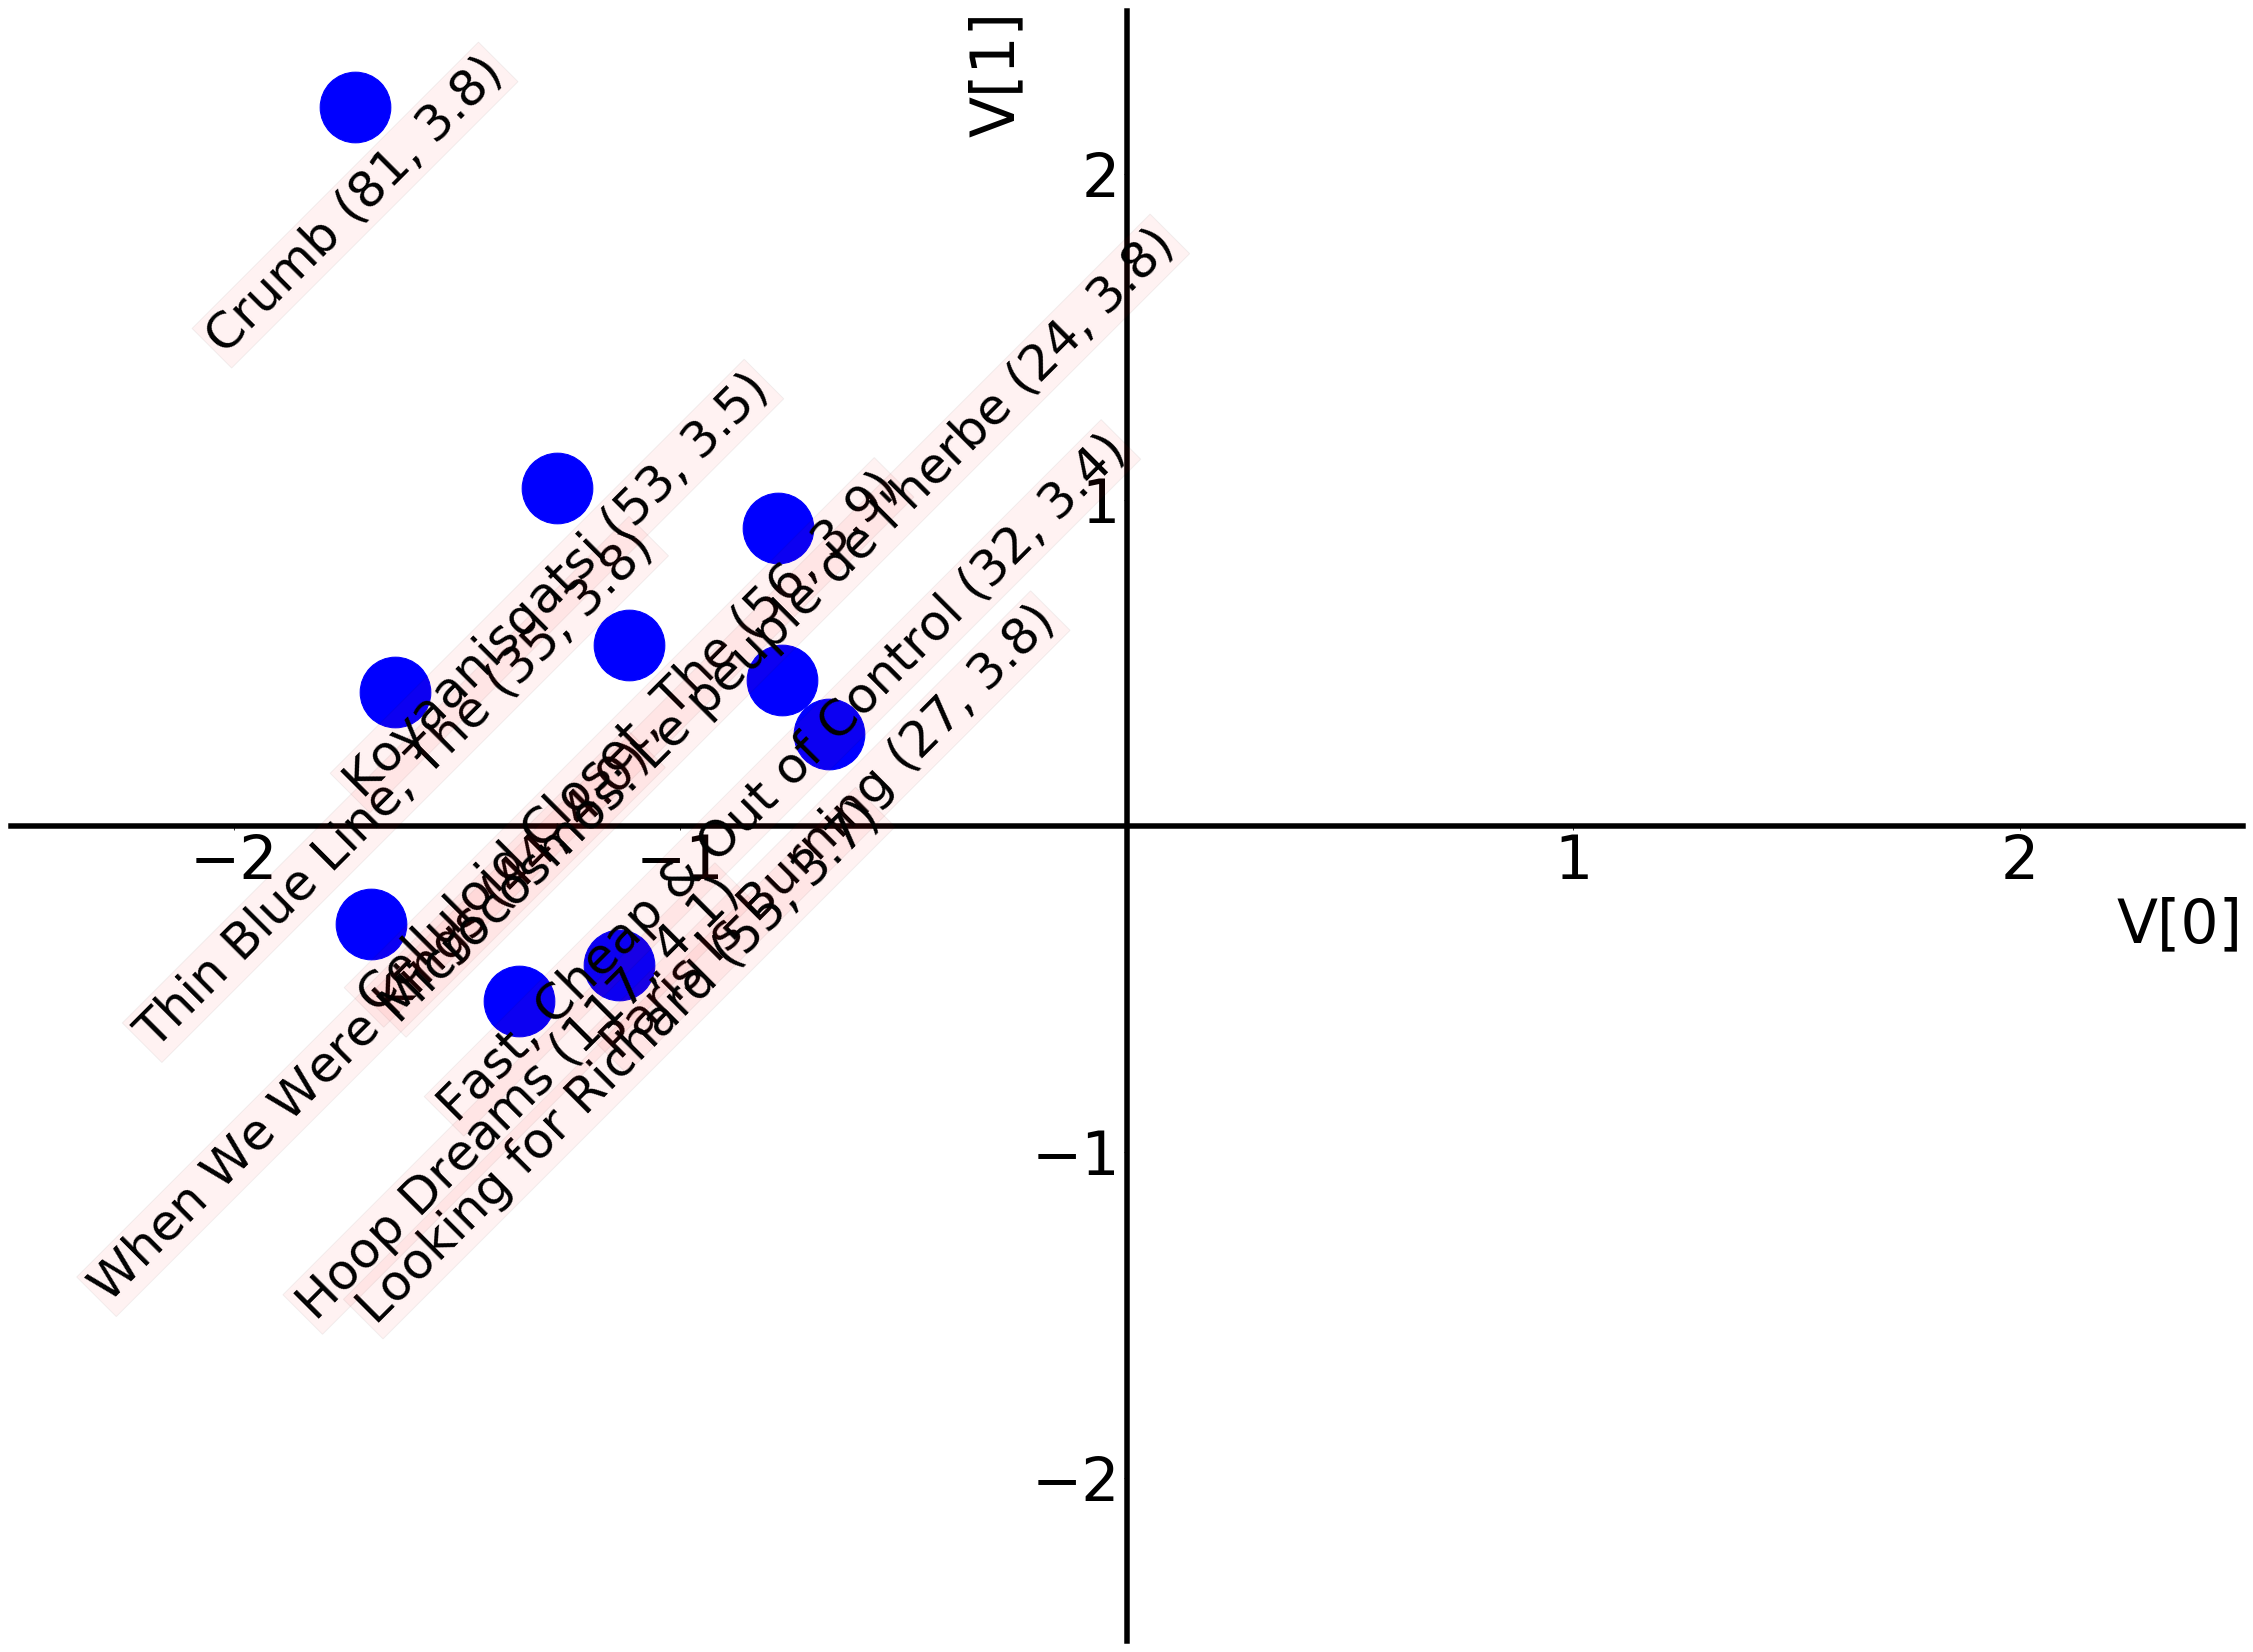

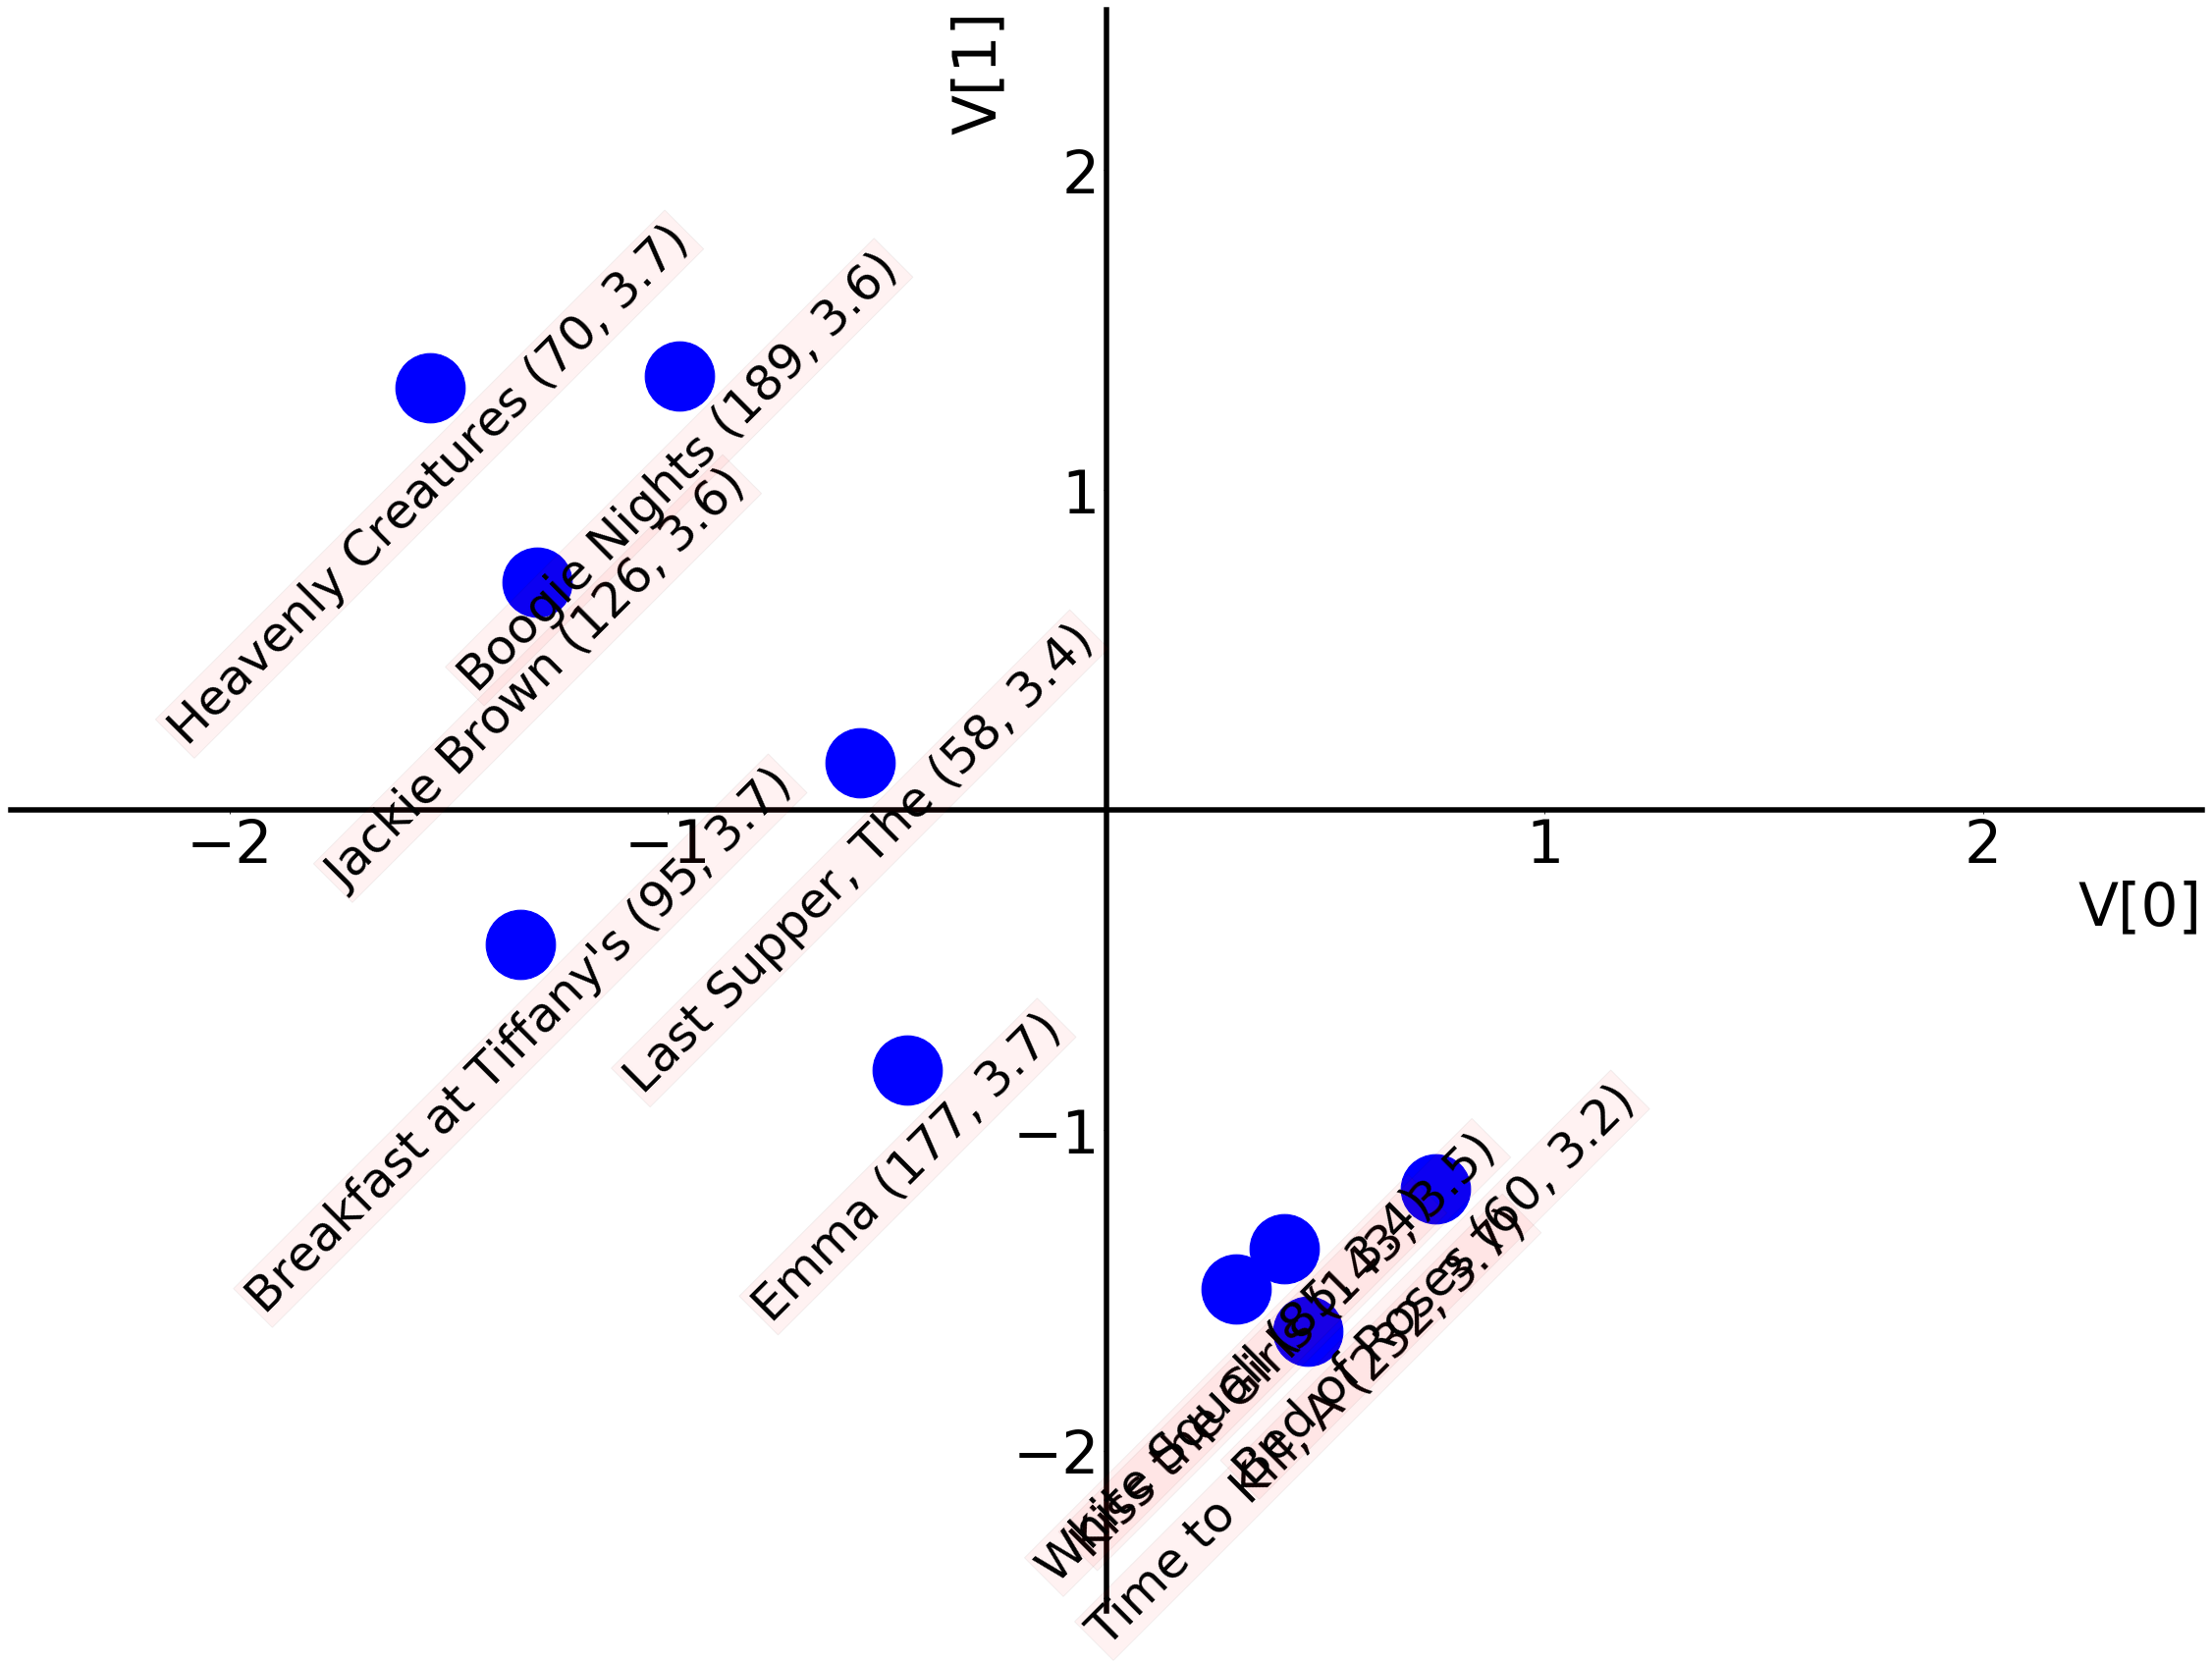

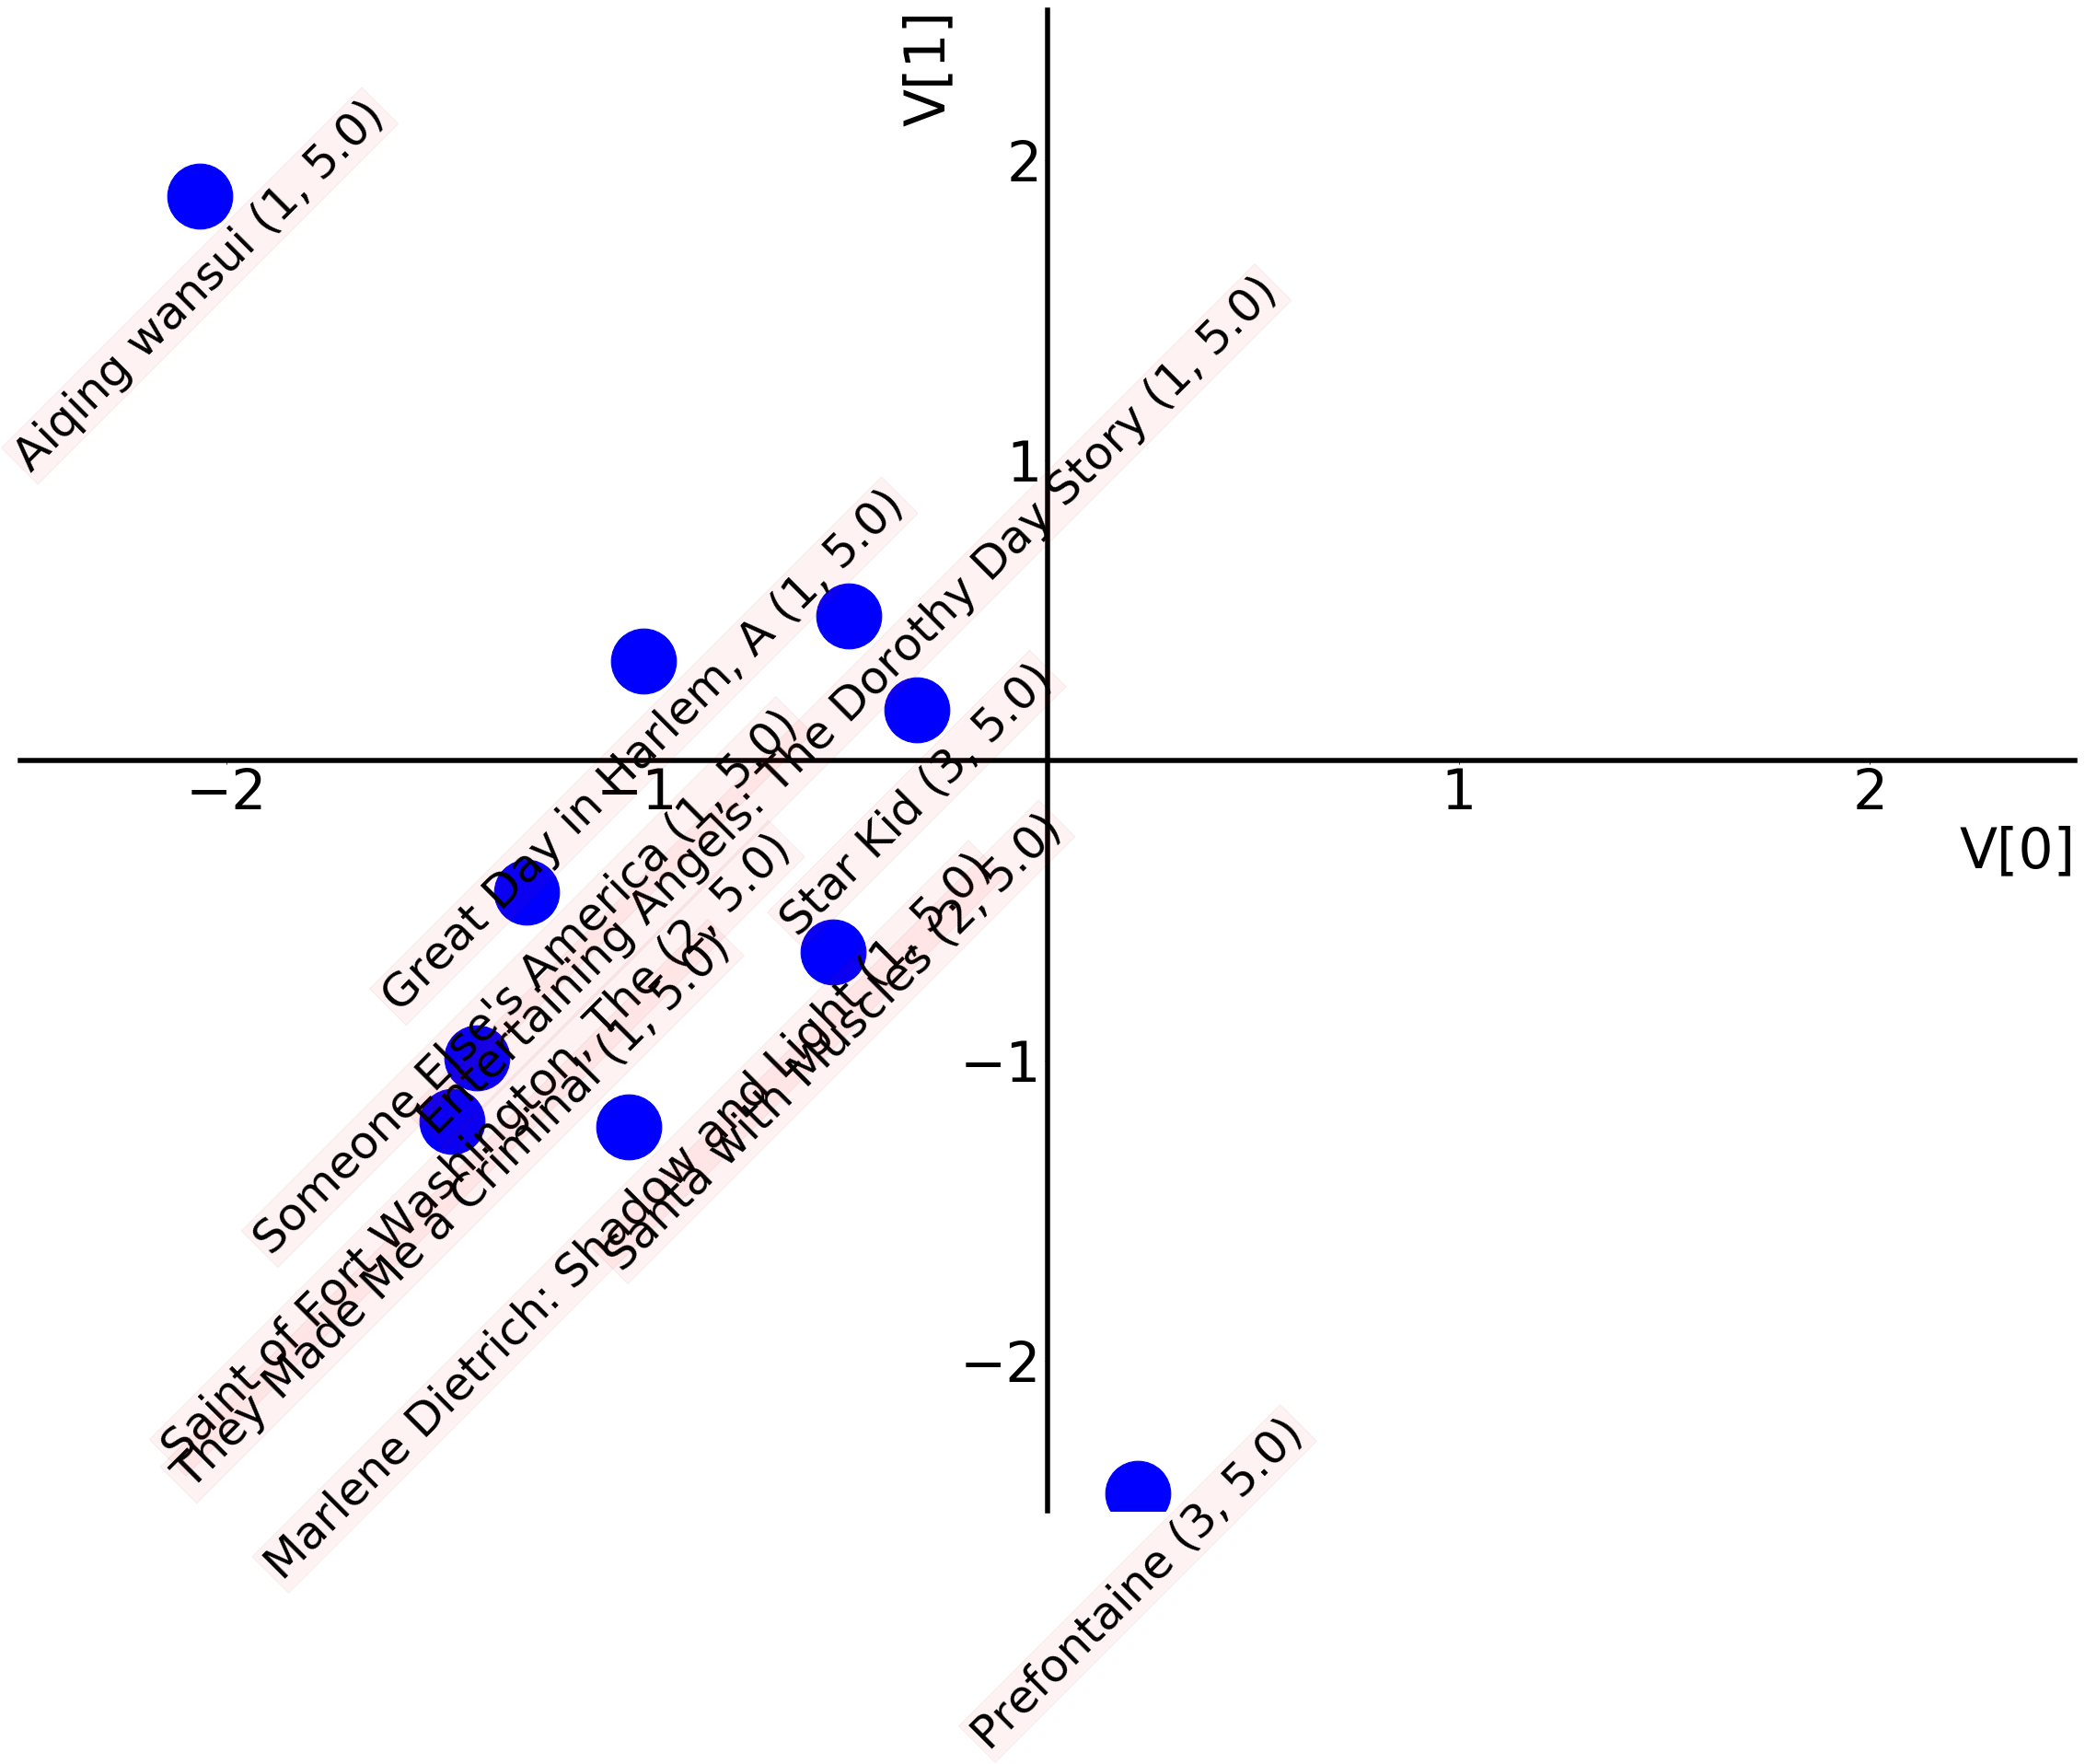

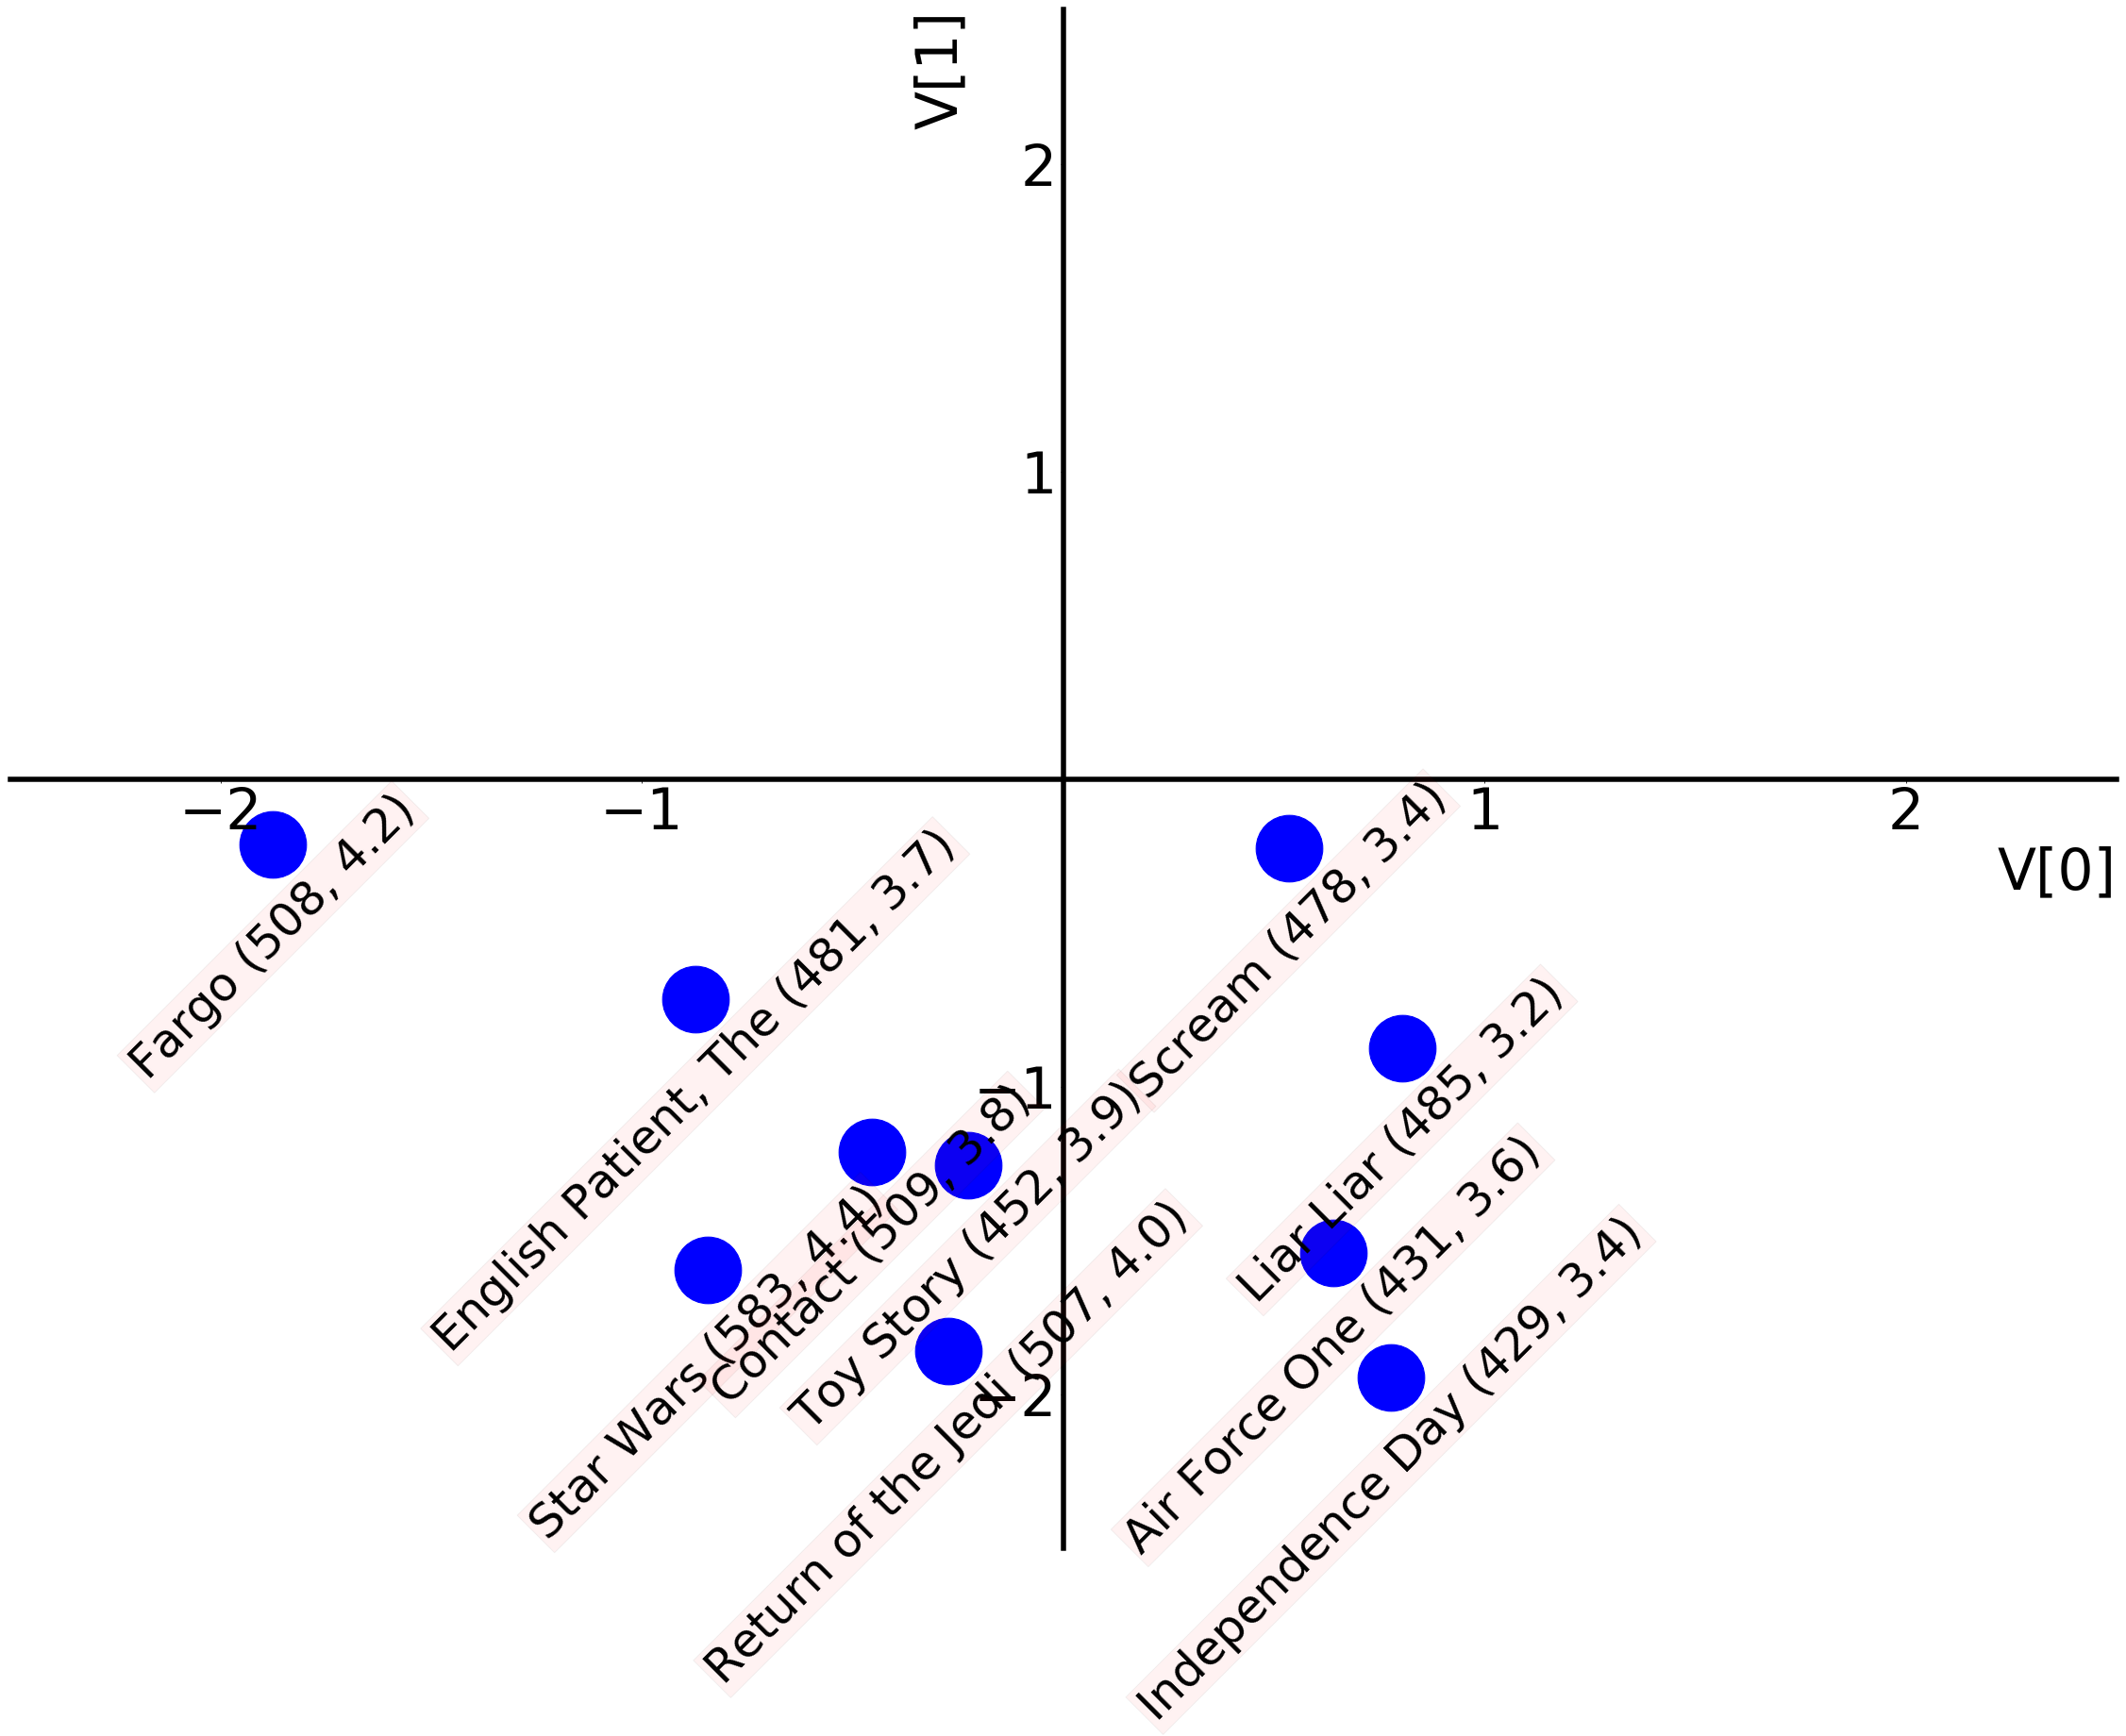

In [215]:
## perform SVD to V and get the A, Sigma, B
U = UT.transpose()
V = VT.transpose()
Vp = np.zeros_like(V)
V_row_means = np.mean(V, axis=1)
for irow in range(len(V)):
    Vp[irow] = V[irow] - V_row_means[irow]
A, S, B =  np.linalg.svd(Vp)
A12 = A[:,[0,1]]
A12T = A12.transpose()
Vtilt = np.matmul(A12T, V)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')

## task 2: add bias term

In [9]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT_bias, VT_bias, a_bias, b_bias, e_in = train_model_bias(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err_bias(UT_bias, VT_bias, Y_test, a_bias, b_bias)

Initial error = 7.030654901920603
After epoch: 0, error = 0.5403870249224626, eps = 0.923138451188261
After epoch: 1, error = 0.4530281126331892, eps = 0.013459985619218906
After epoch: 2, error = 0.43241342486681605, eps = 0.003176246059031356
After epoch: 3, error = 0.41002371309339164, eps = 0.0034497361584680903
After epoch: 4, error = 0.4004643879427429, eps = 0.0014728706629394276
After epoch: 5, error = 0.3848917829546017, eps = 0.0023993778505400952
After epoch: 6, error = 0.3839265227587001, eps = 0.0001487242459317481
After epoch: 7, error = 0.3820310266678192, eps = 0.00029205205806660936
After epoch: 8, error = 0.3649113843950678, eps = 0.0026377404750001616
After epoch: 9, error = 0.35745503204526613, eps = 0.0011488512479165
After epoch: 10, error = 0.3515795025337726, eps = 0.0009052830519240505
After epoch: 11, error = 0.3407275446167011, eps = 0.0016720354417930077
After epoch: 12, error = 0.33779311156454395, eps = 0.000452128187583276
After epoch: 13, error = 0.33750

After epoch: 111, error = 0.2841150233129294, eps = 0.0008123947471060668
After epoch: 112, error = 0.2881741195725608, eps = 0.0006254127466783015
After epoch: 113, error = 0.29699160200817454, eps = 0.0013585698776568819
After epoch: 114, error = 0.2935919159973676, eps = 0.0005238128957443488
After epoch: 115, error = 0.2898541638115879, eps = 0.0005759010655055554
After epoch: 116, error = 0.2878223420456968, eps = 0.0003130566880131409
After epoch: 117, error = 0.29850353822534537, eps = 0.0016457250119834518
After epoch: 118, error = 0.29079790382668097, eps = 0.0011872598396090214
After epoch: 119, error = 0.29236801679411273, eps = 0.00024191805287364536
After epoch: 120, error = 0.2863526333763819, eps = 0.000926831300607742
After epoch: 121, error = 0.2888711265838831, eps = 0.00038804148846103393
After epoch: 122, error = 0.2892980581112297, eps = 6.578026291637336e-05
After epoch: 123, error = 0.2894452176189258, eps = 2.267387270987703e-05
After epoch: 124, error = 0.29061

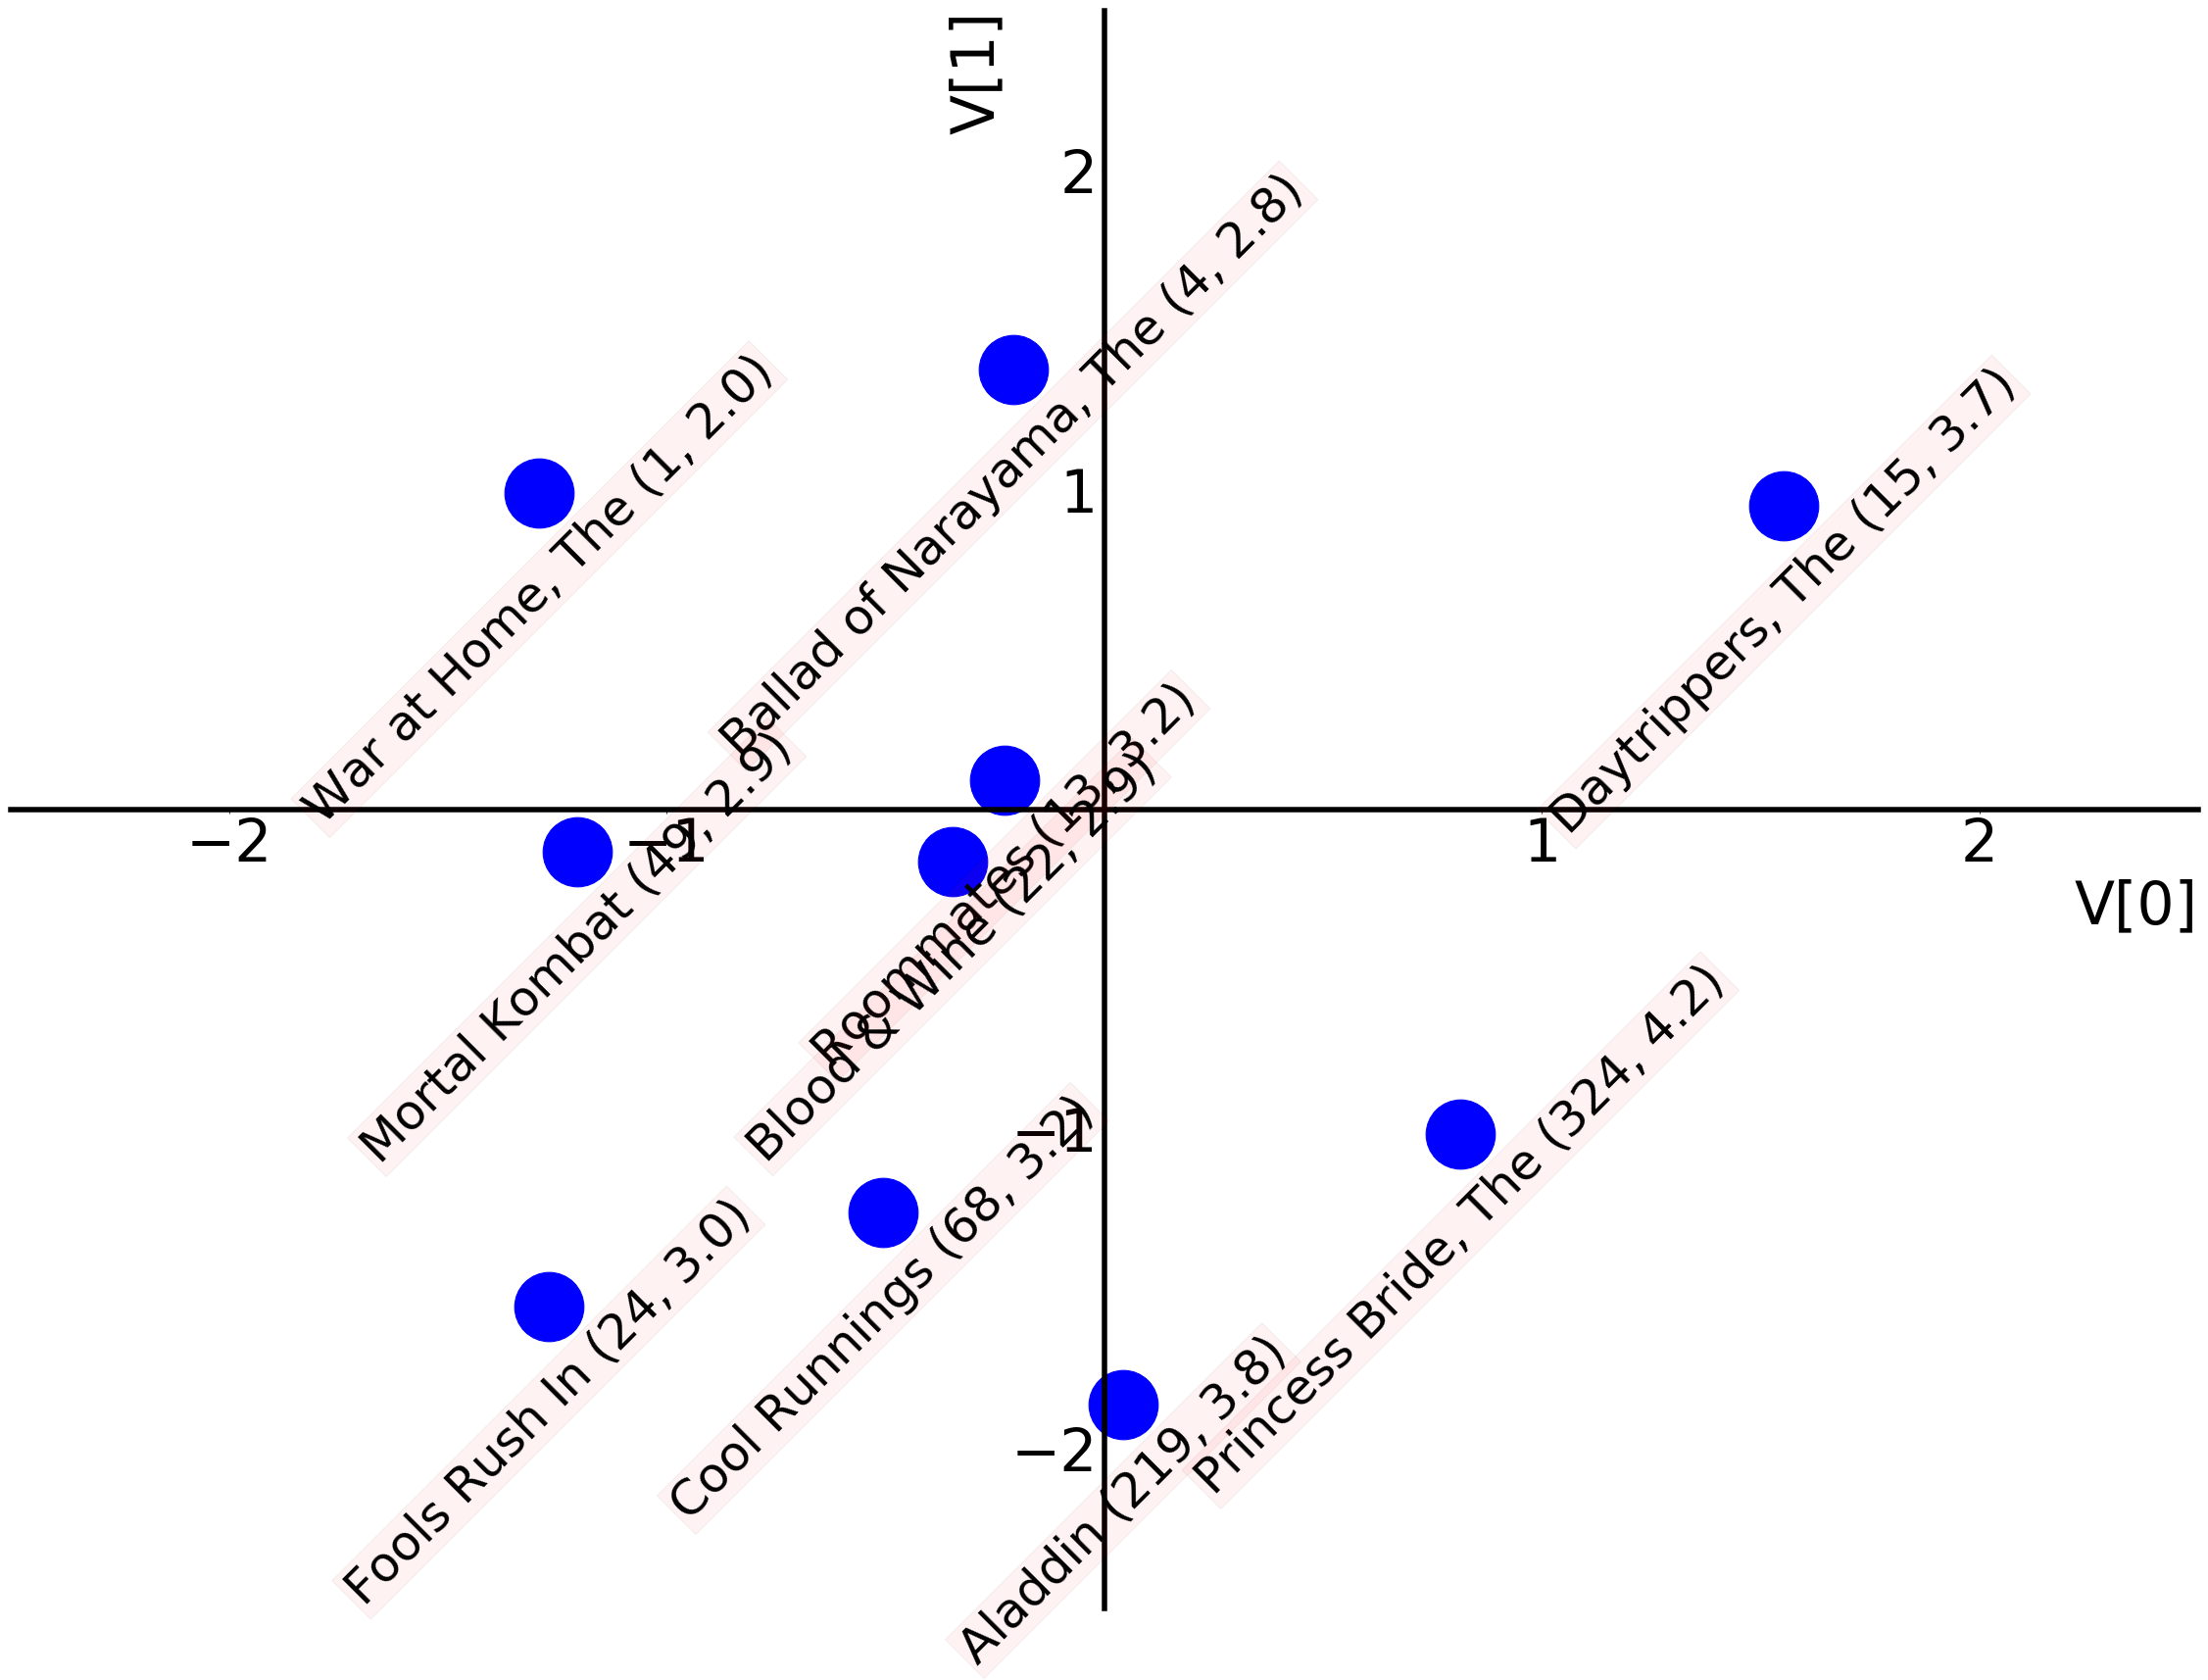

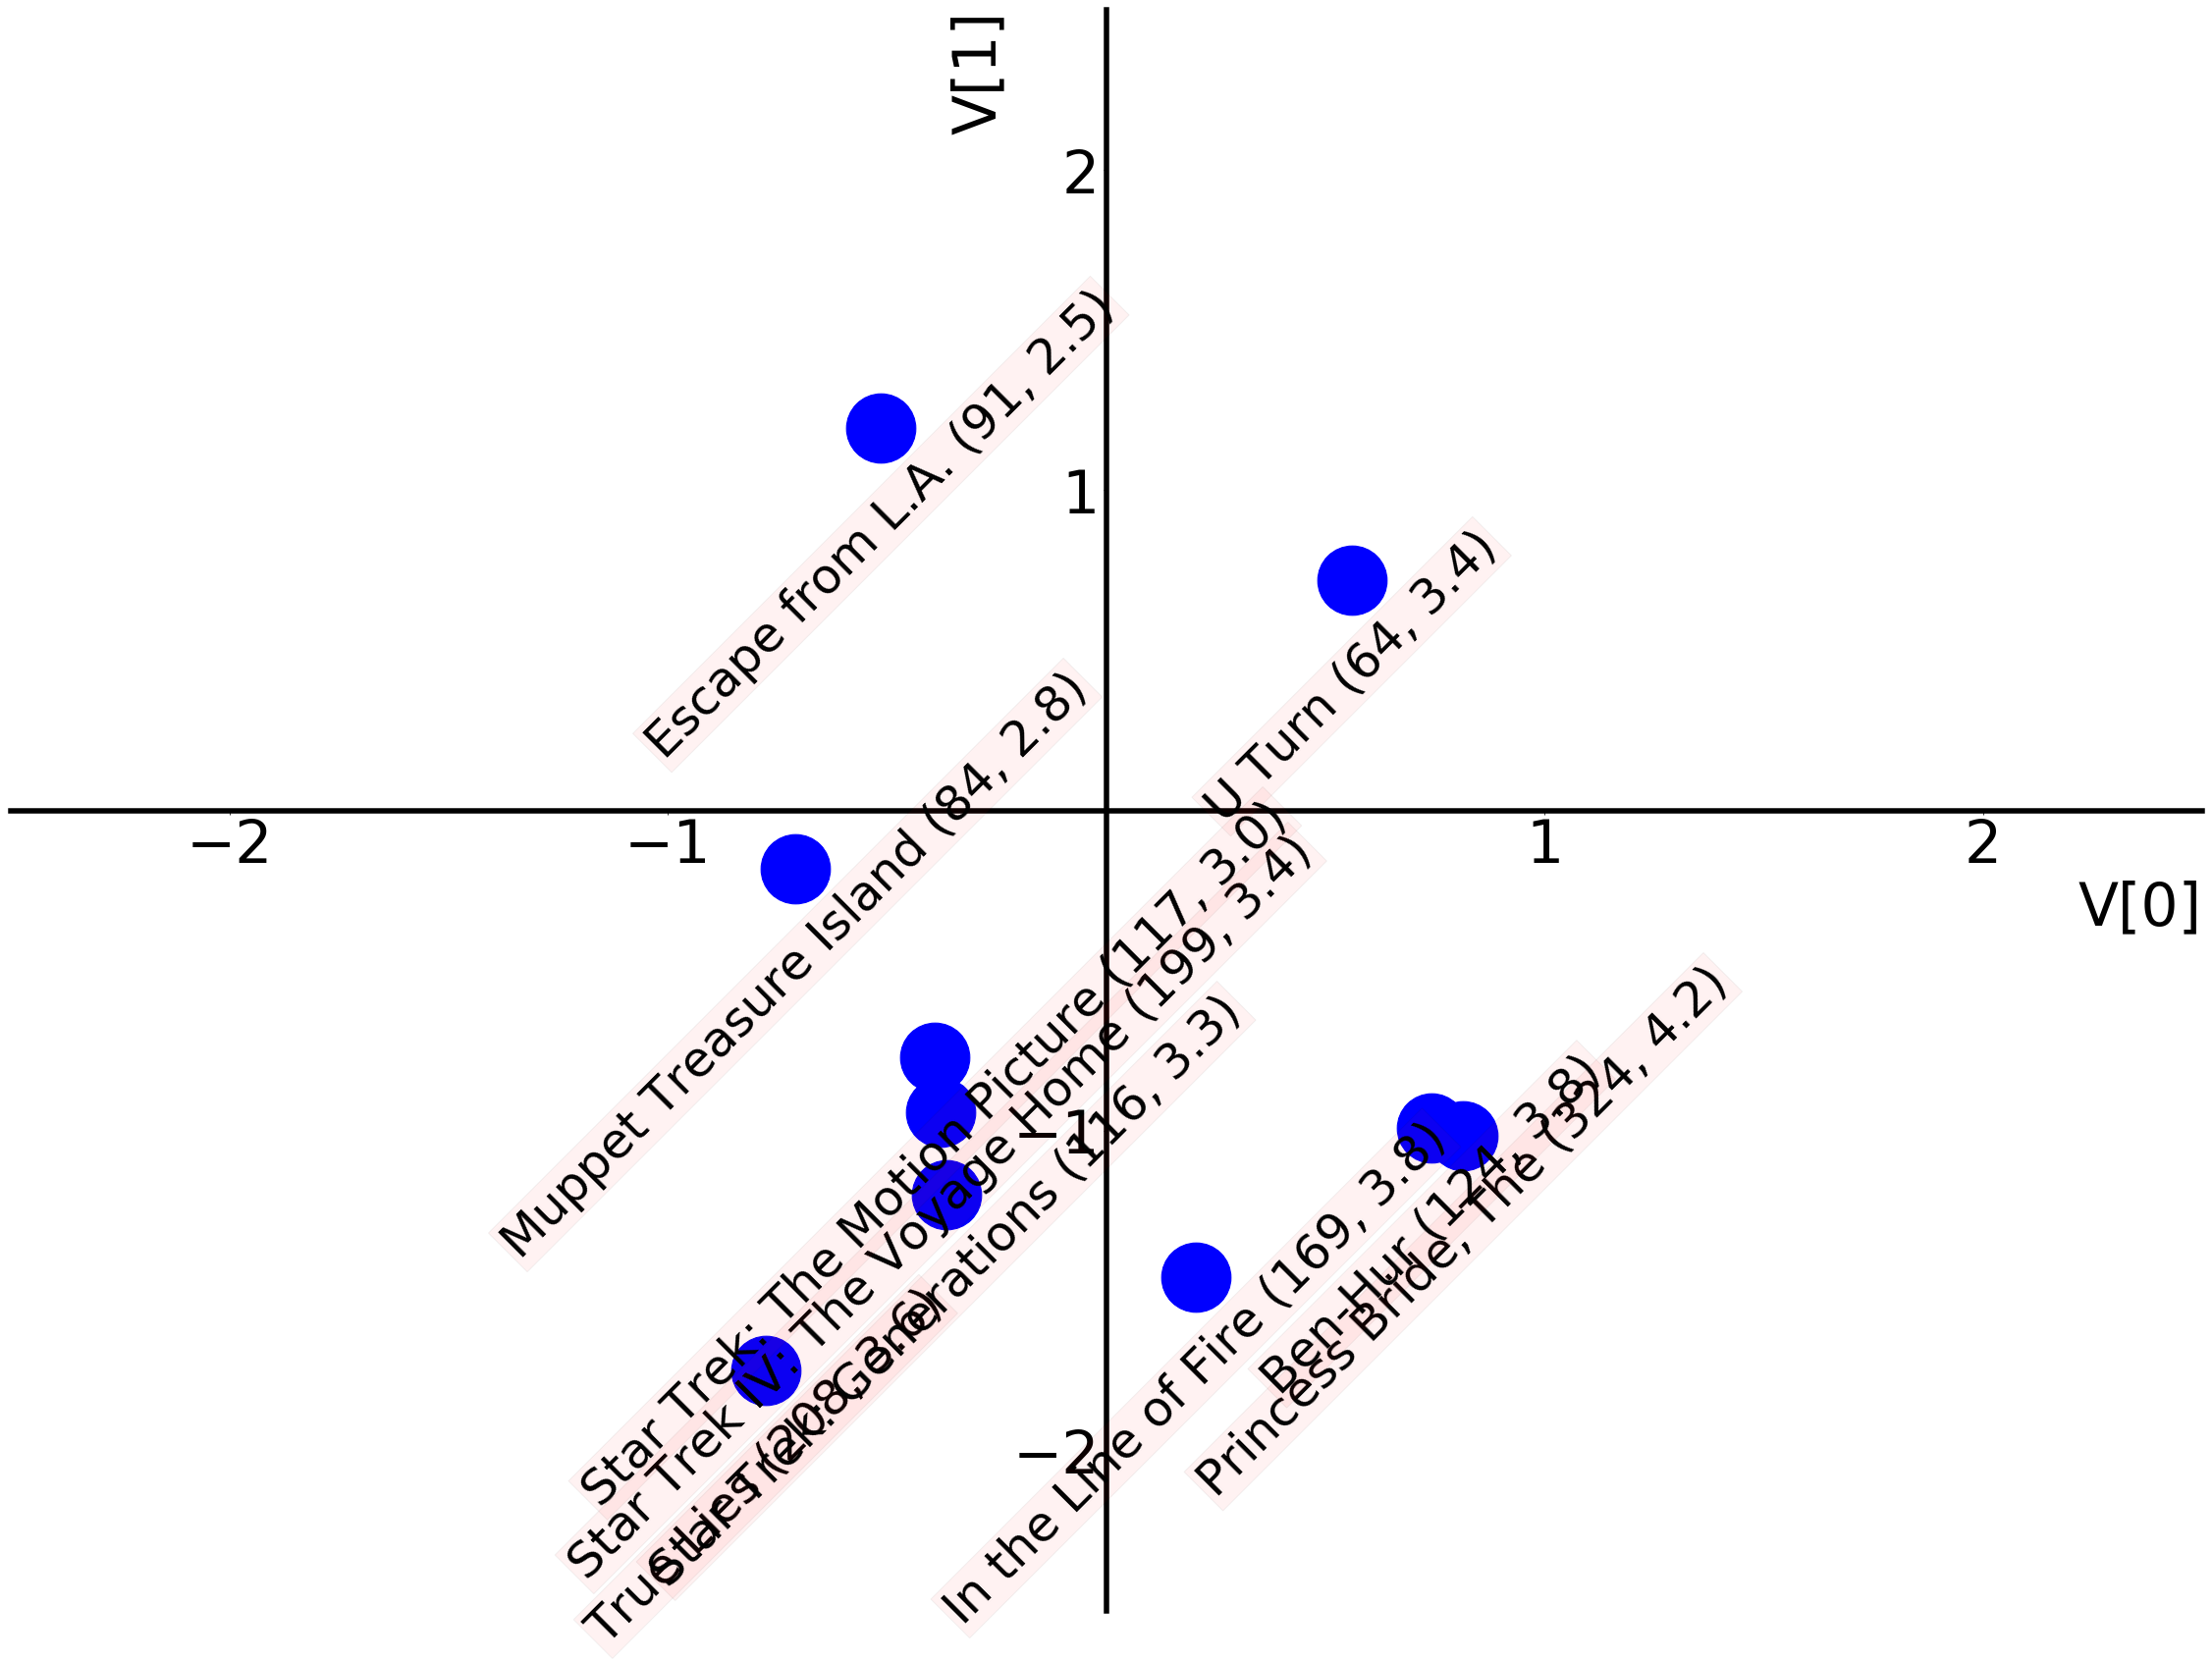

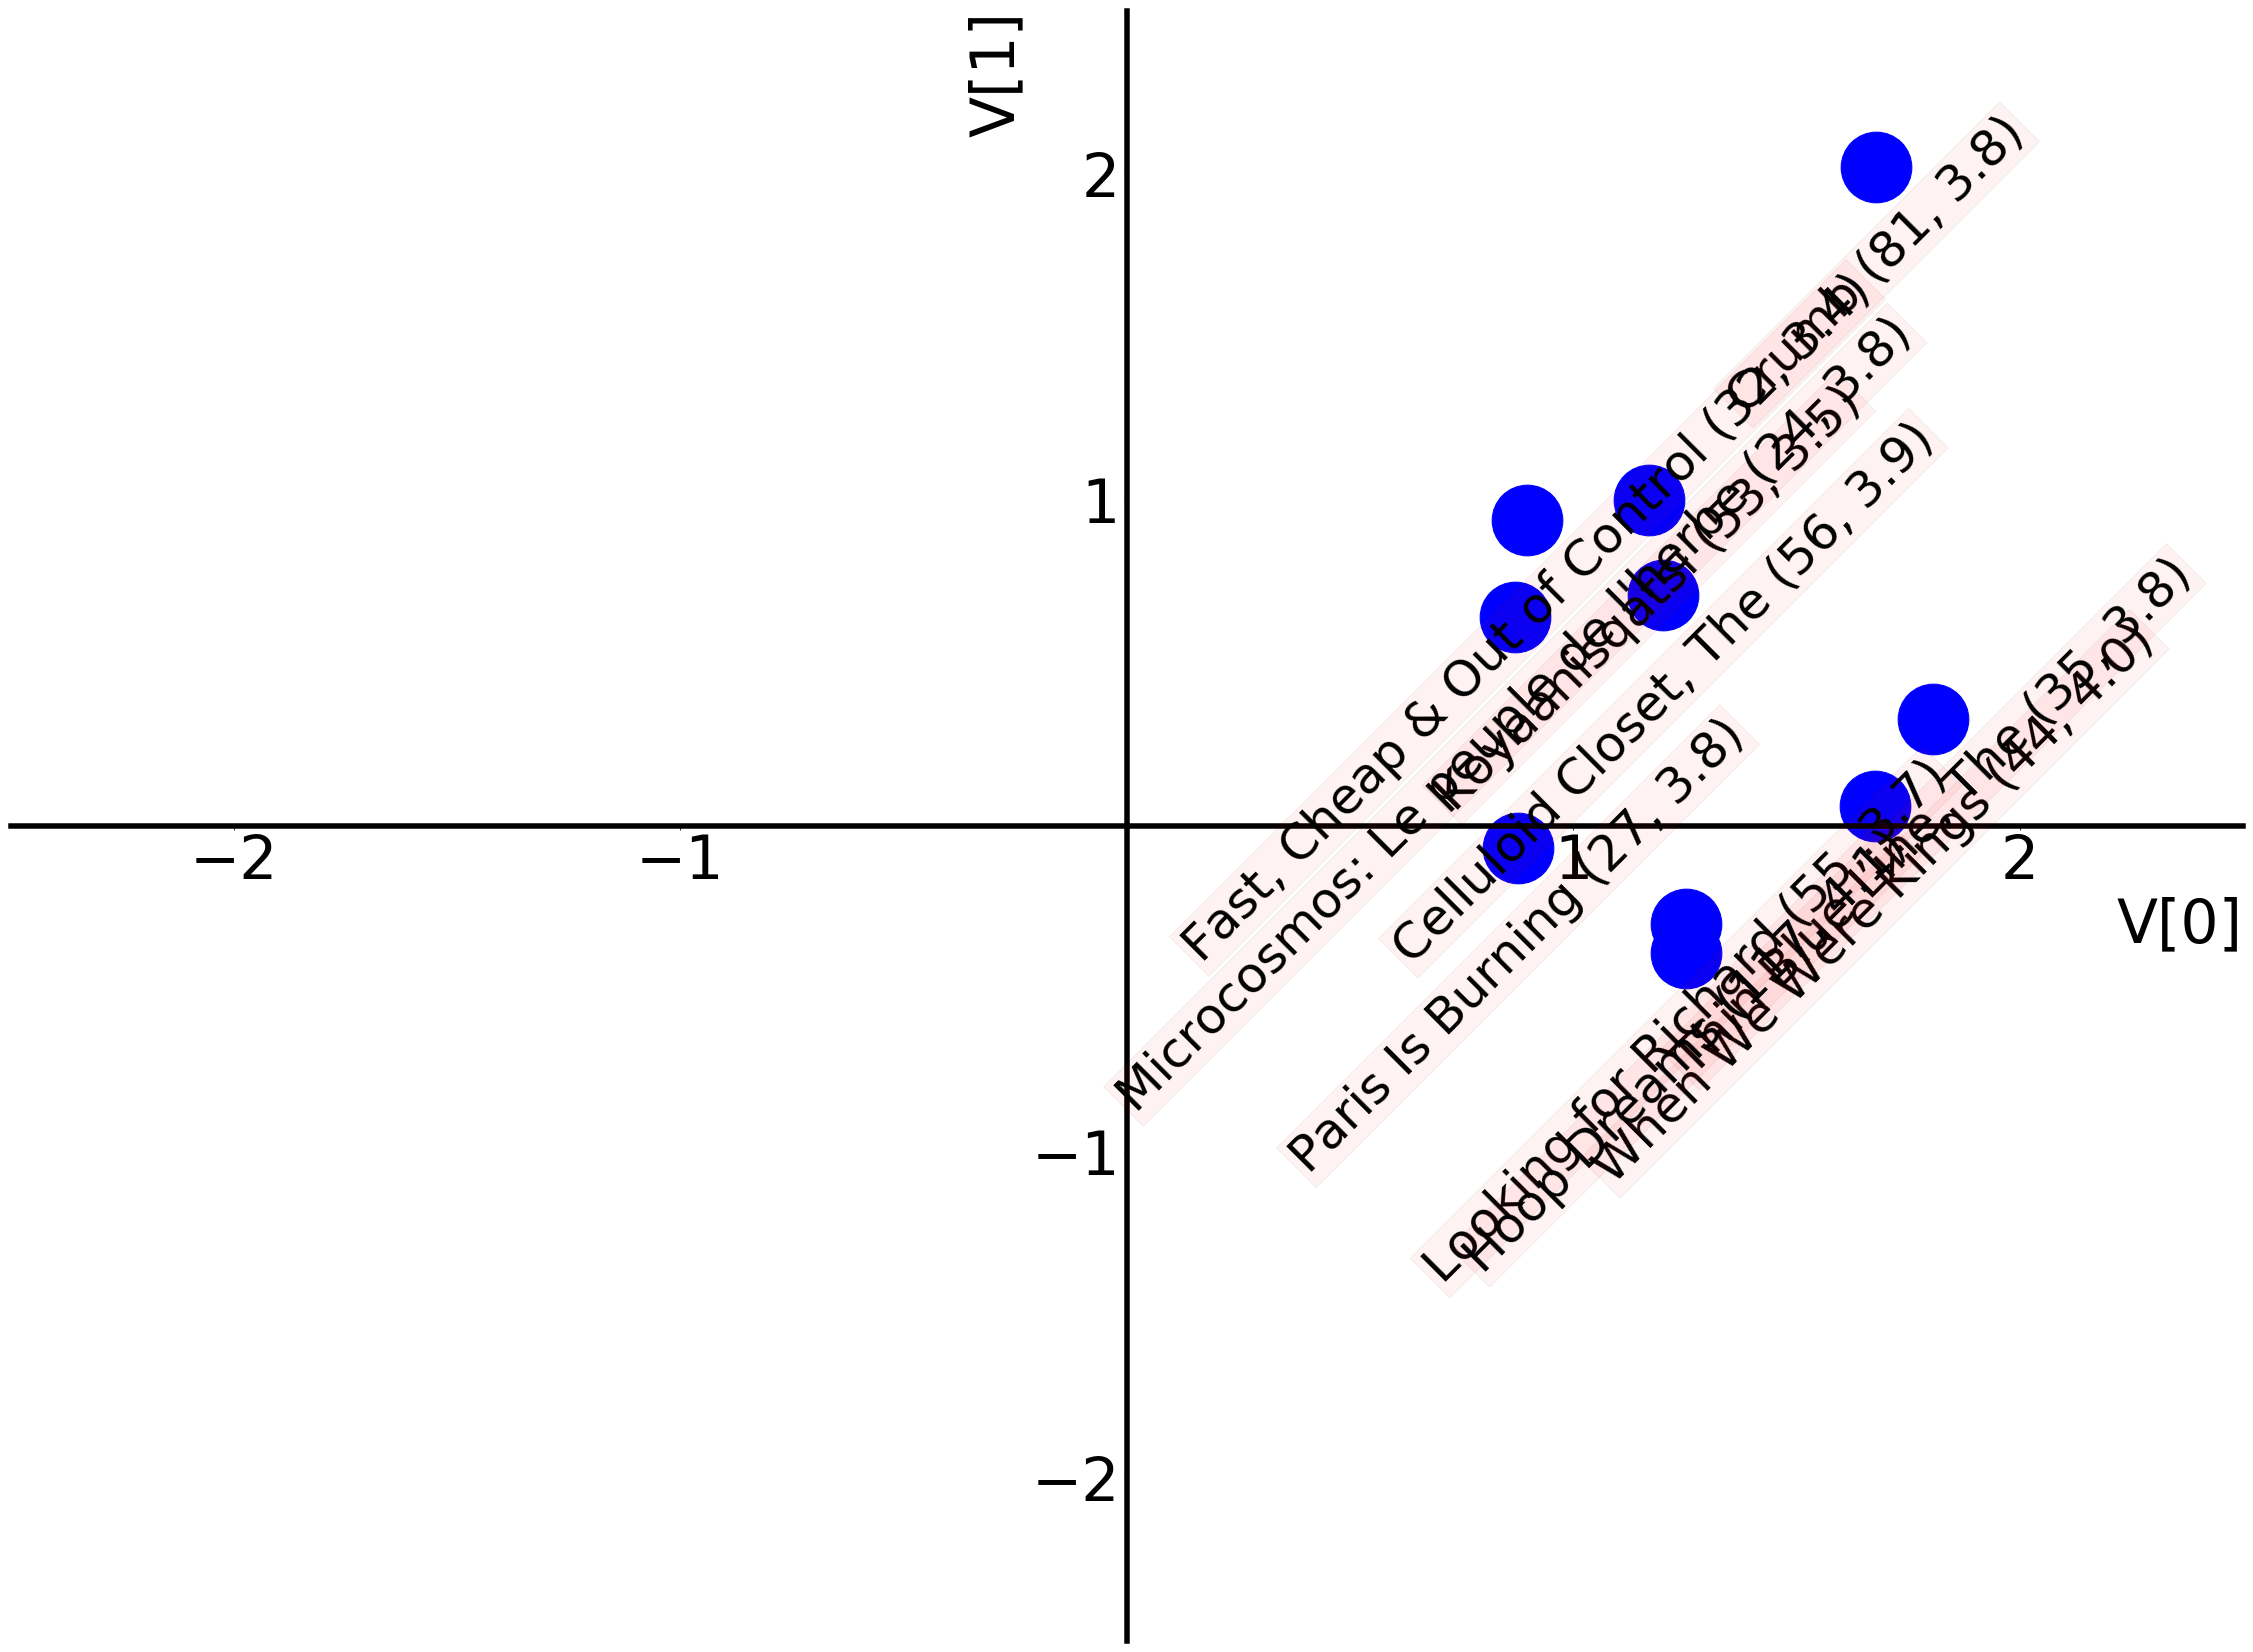

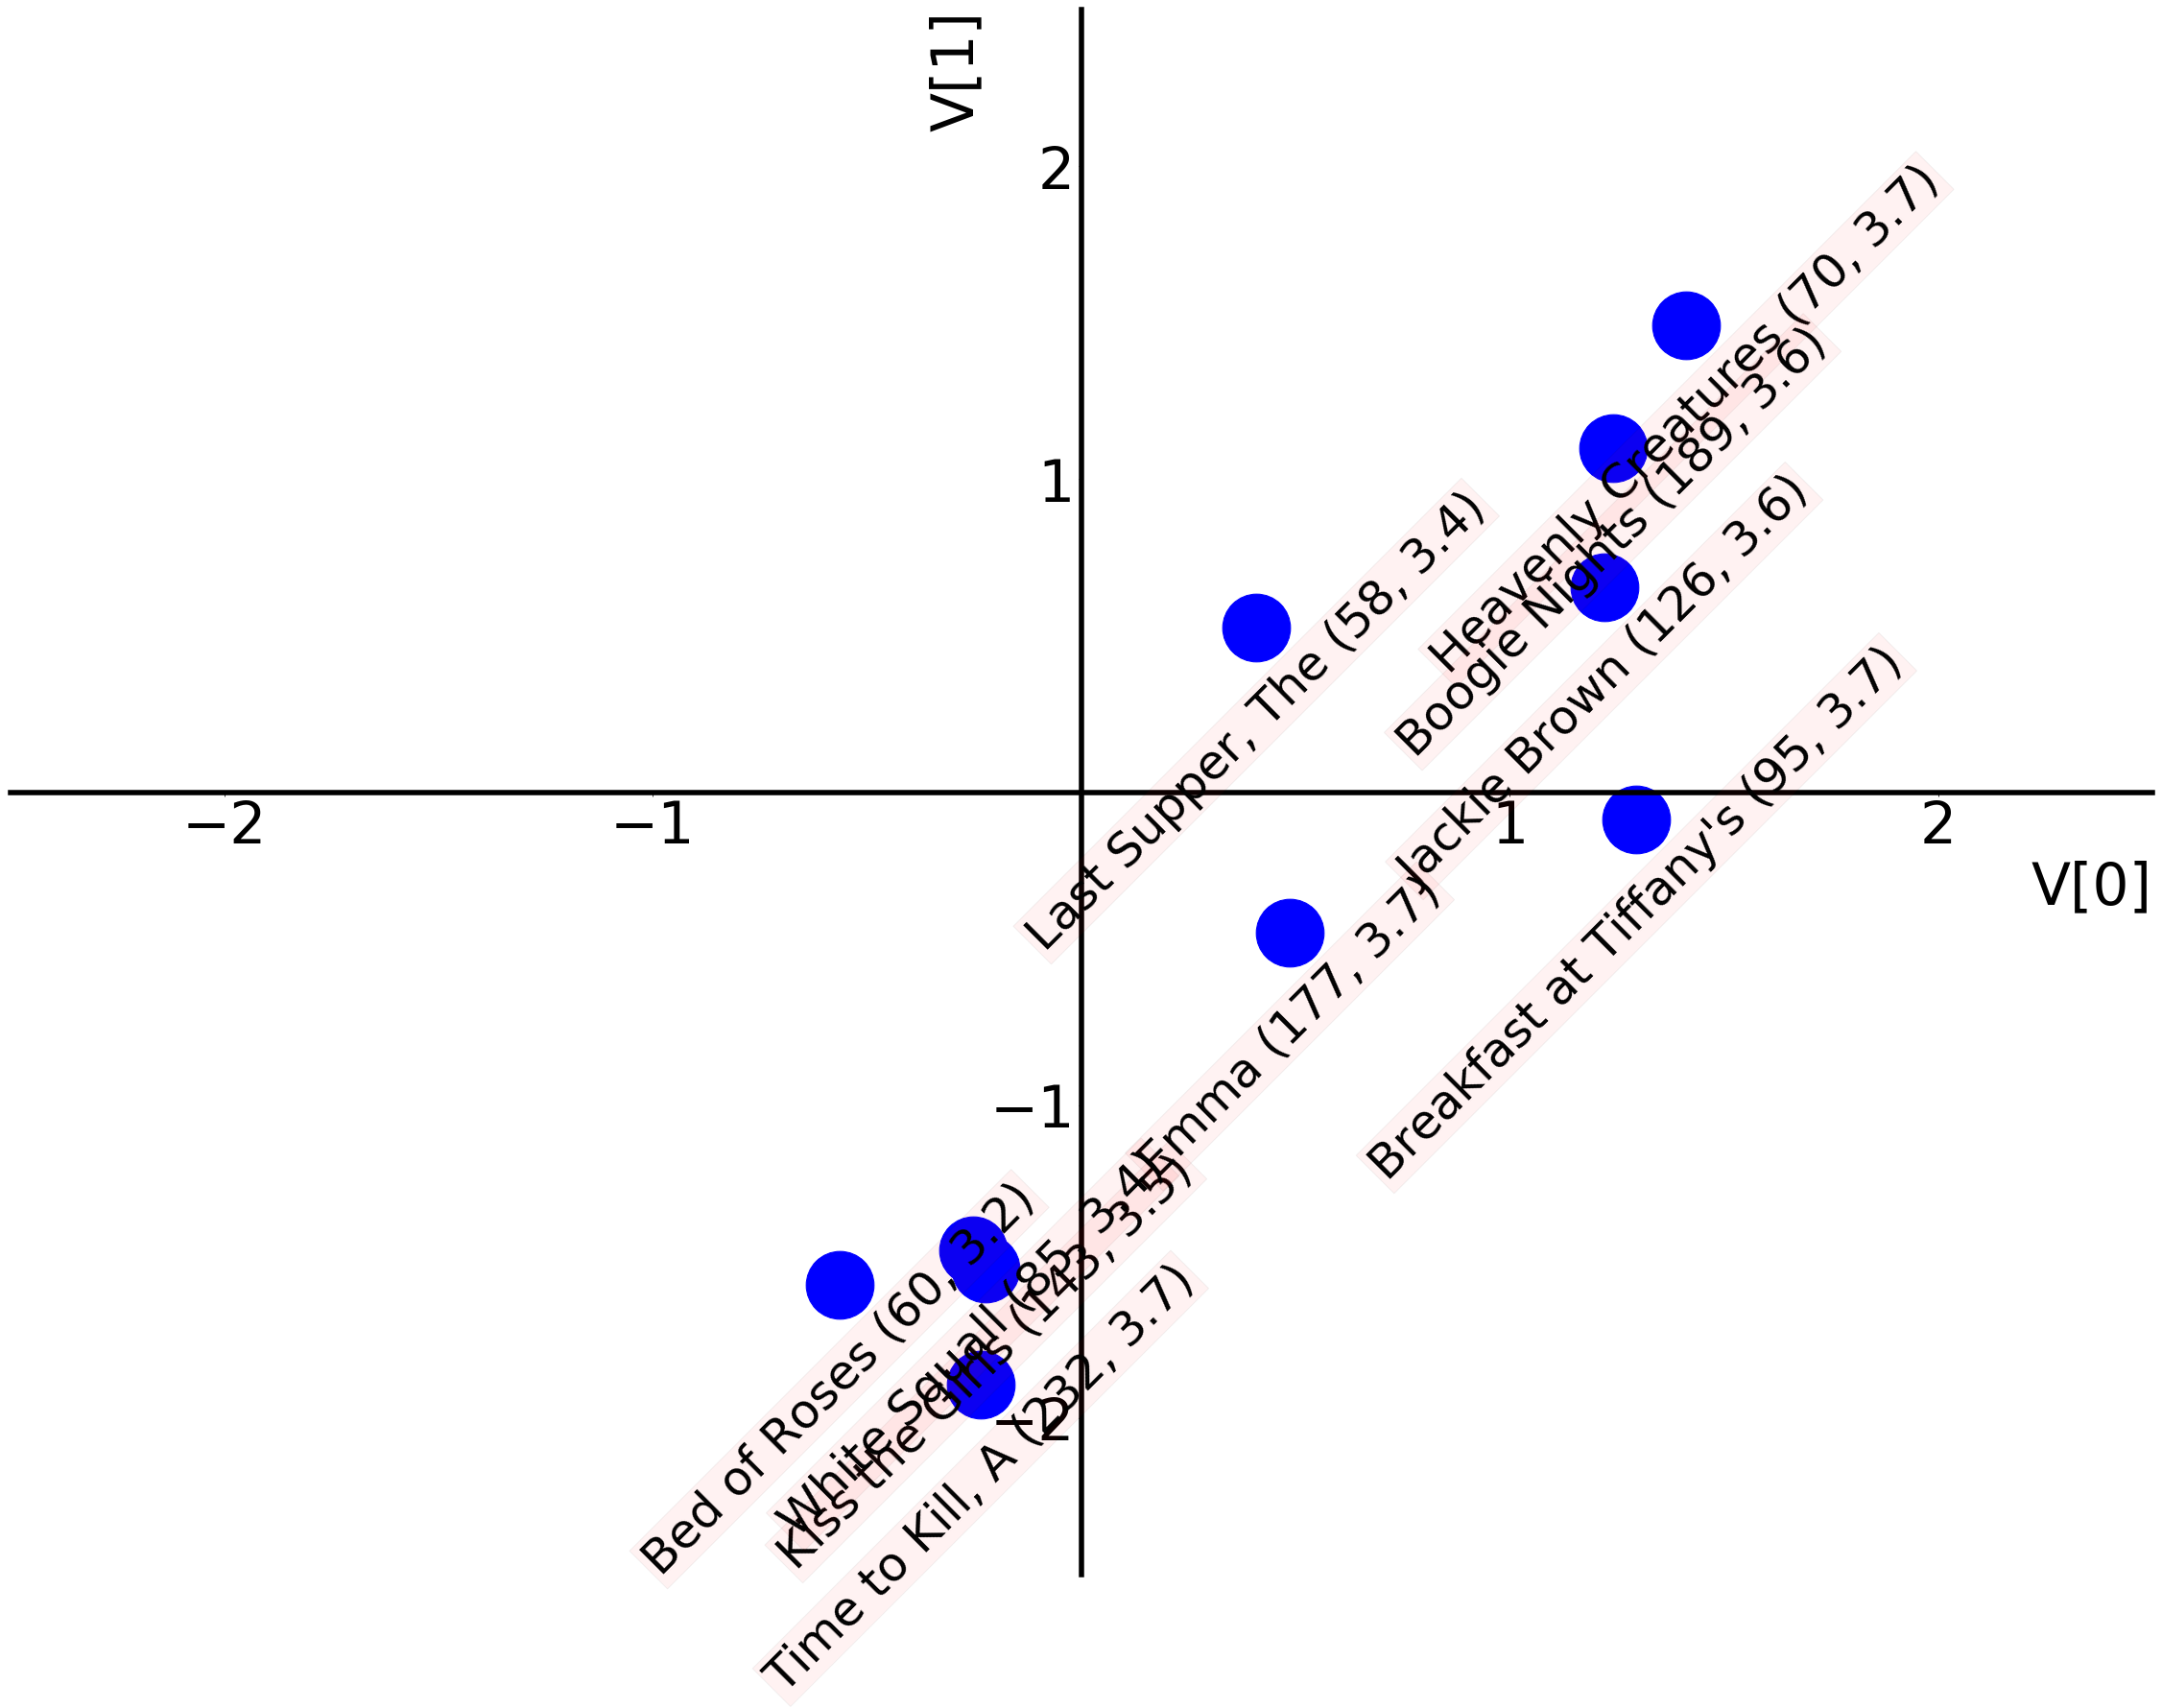

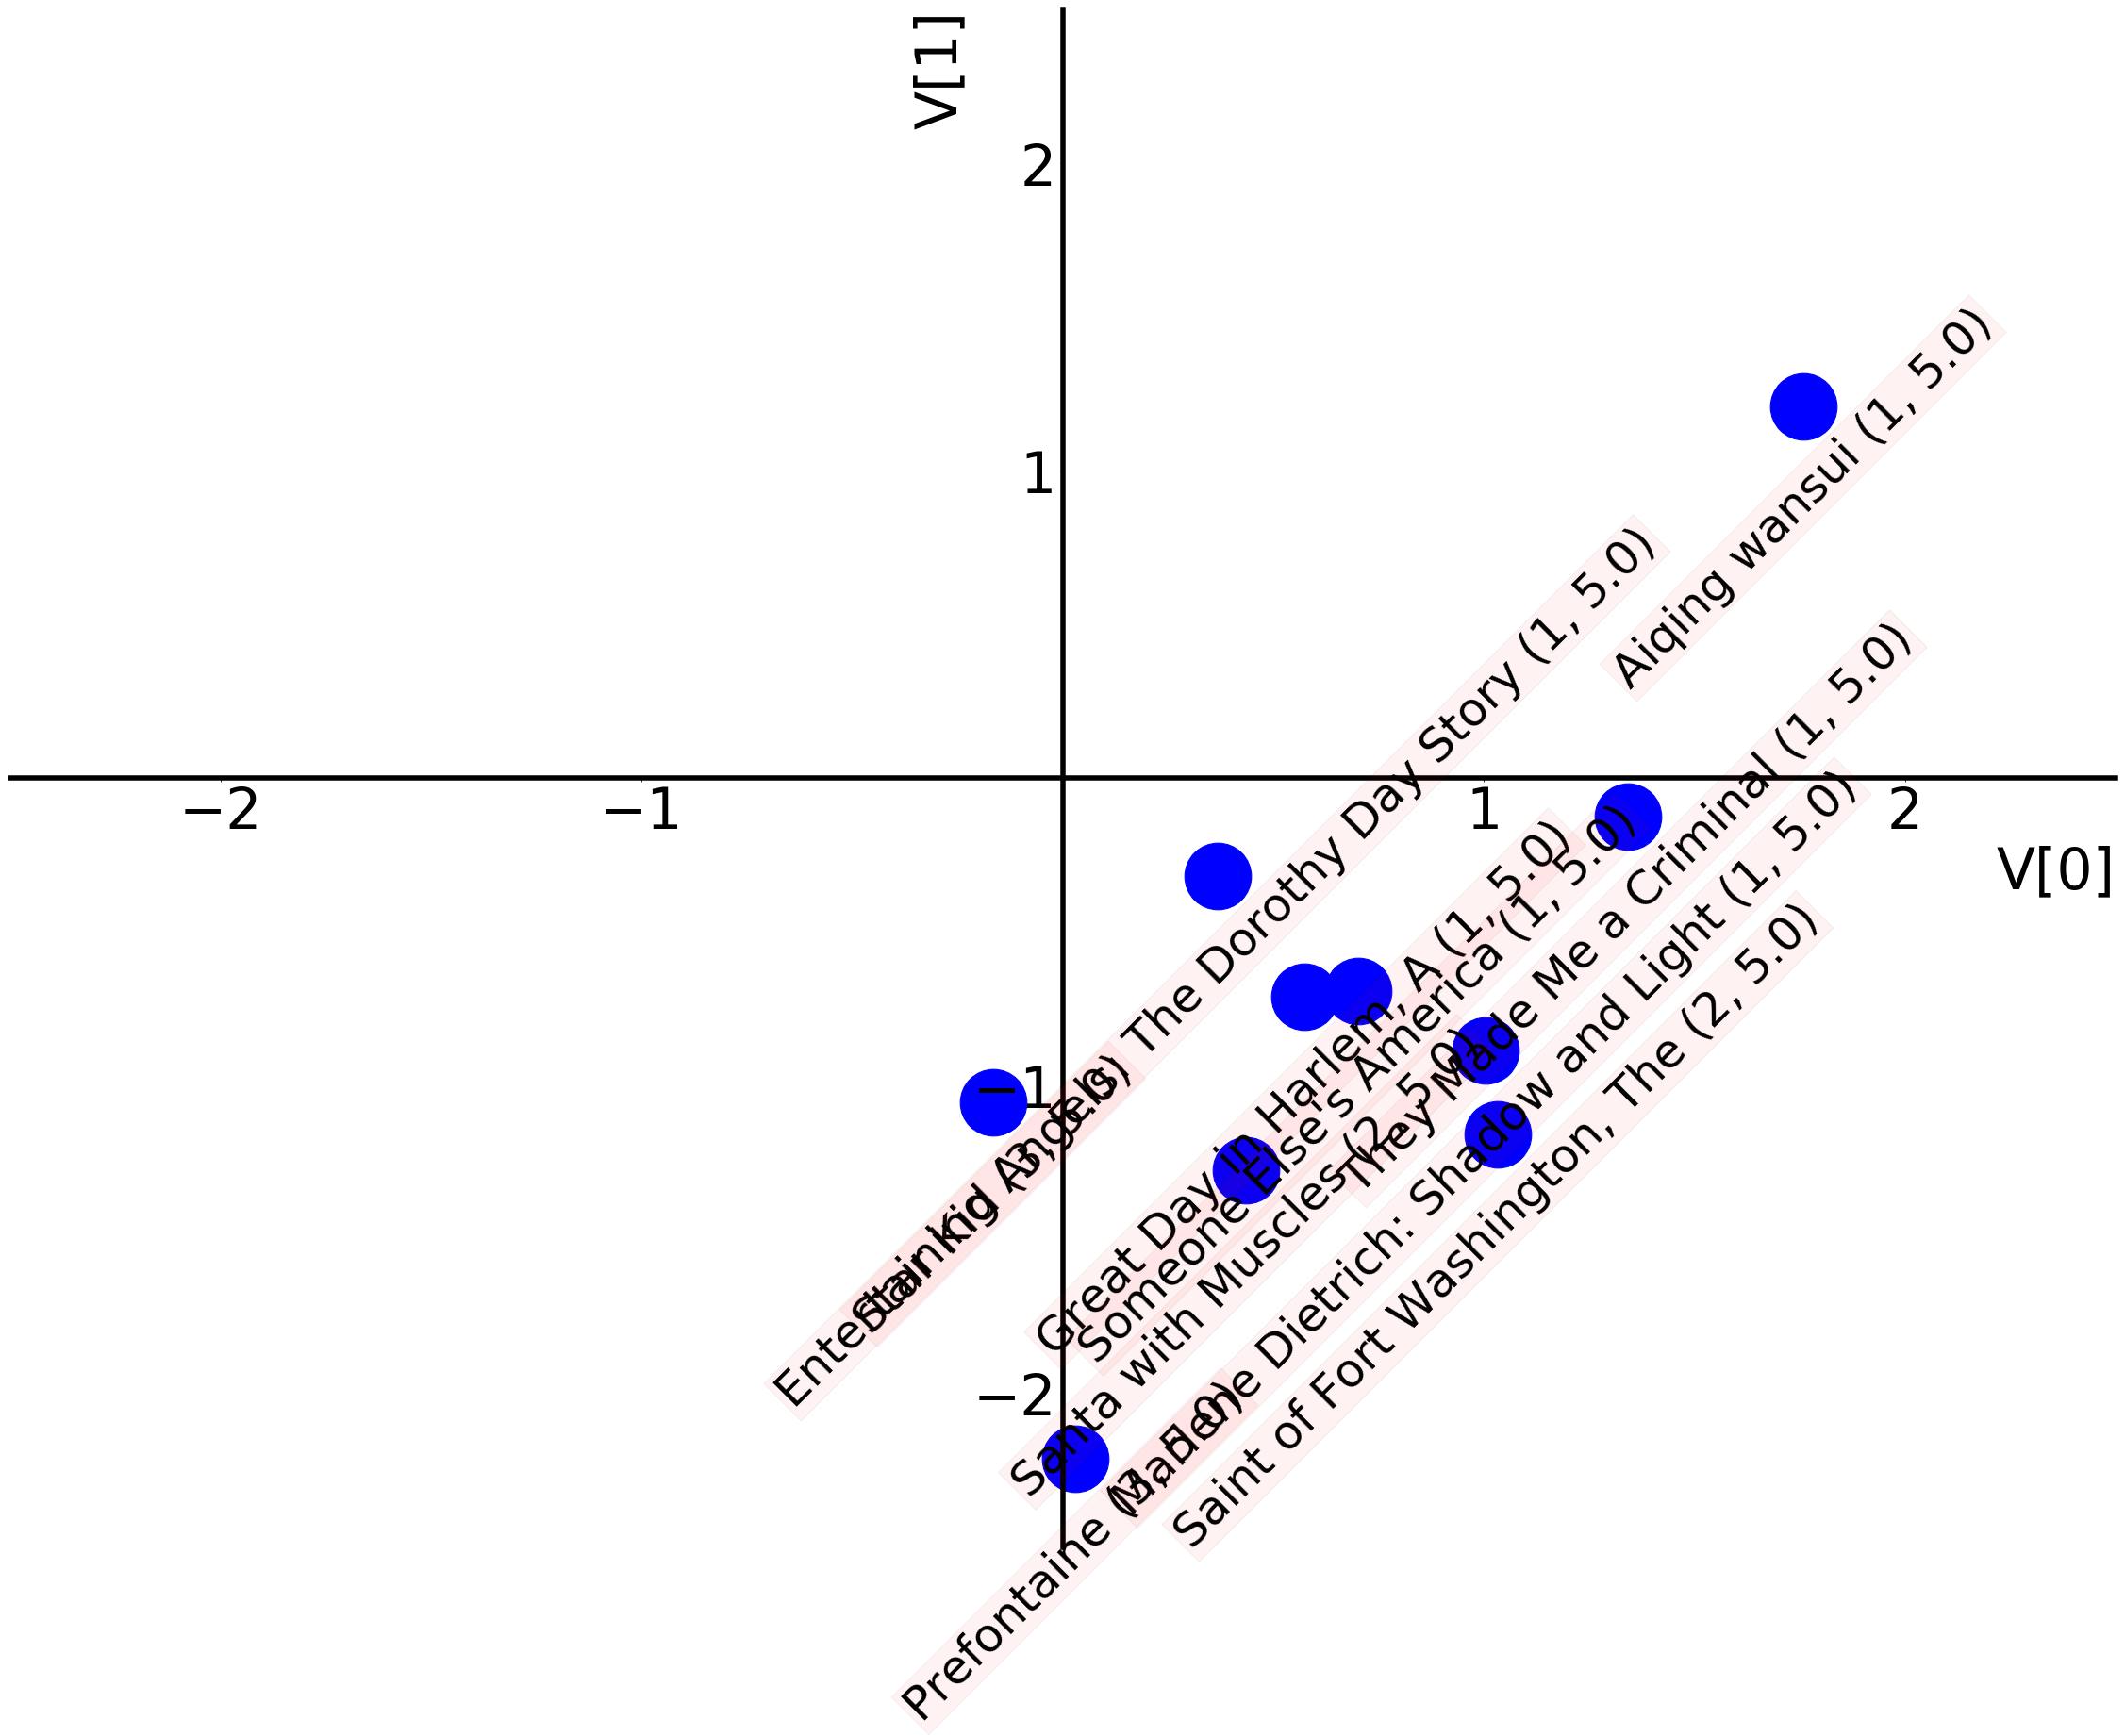

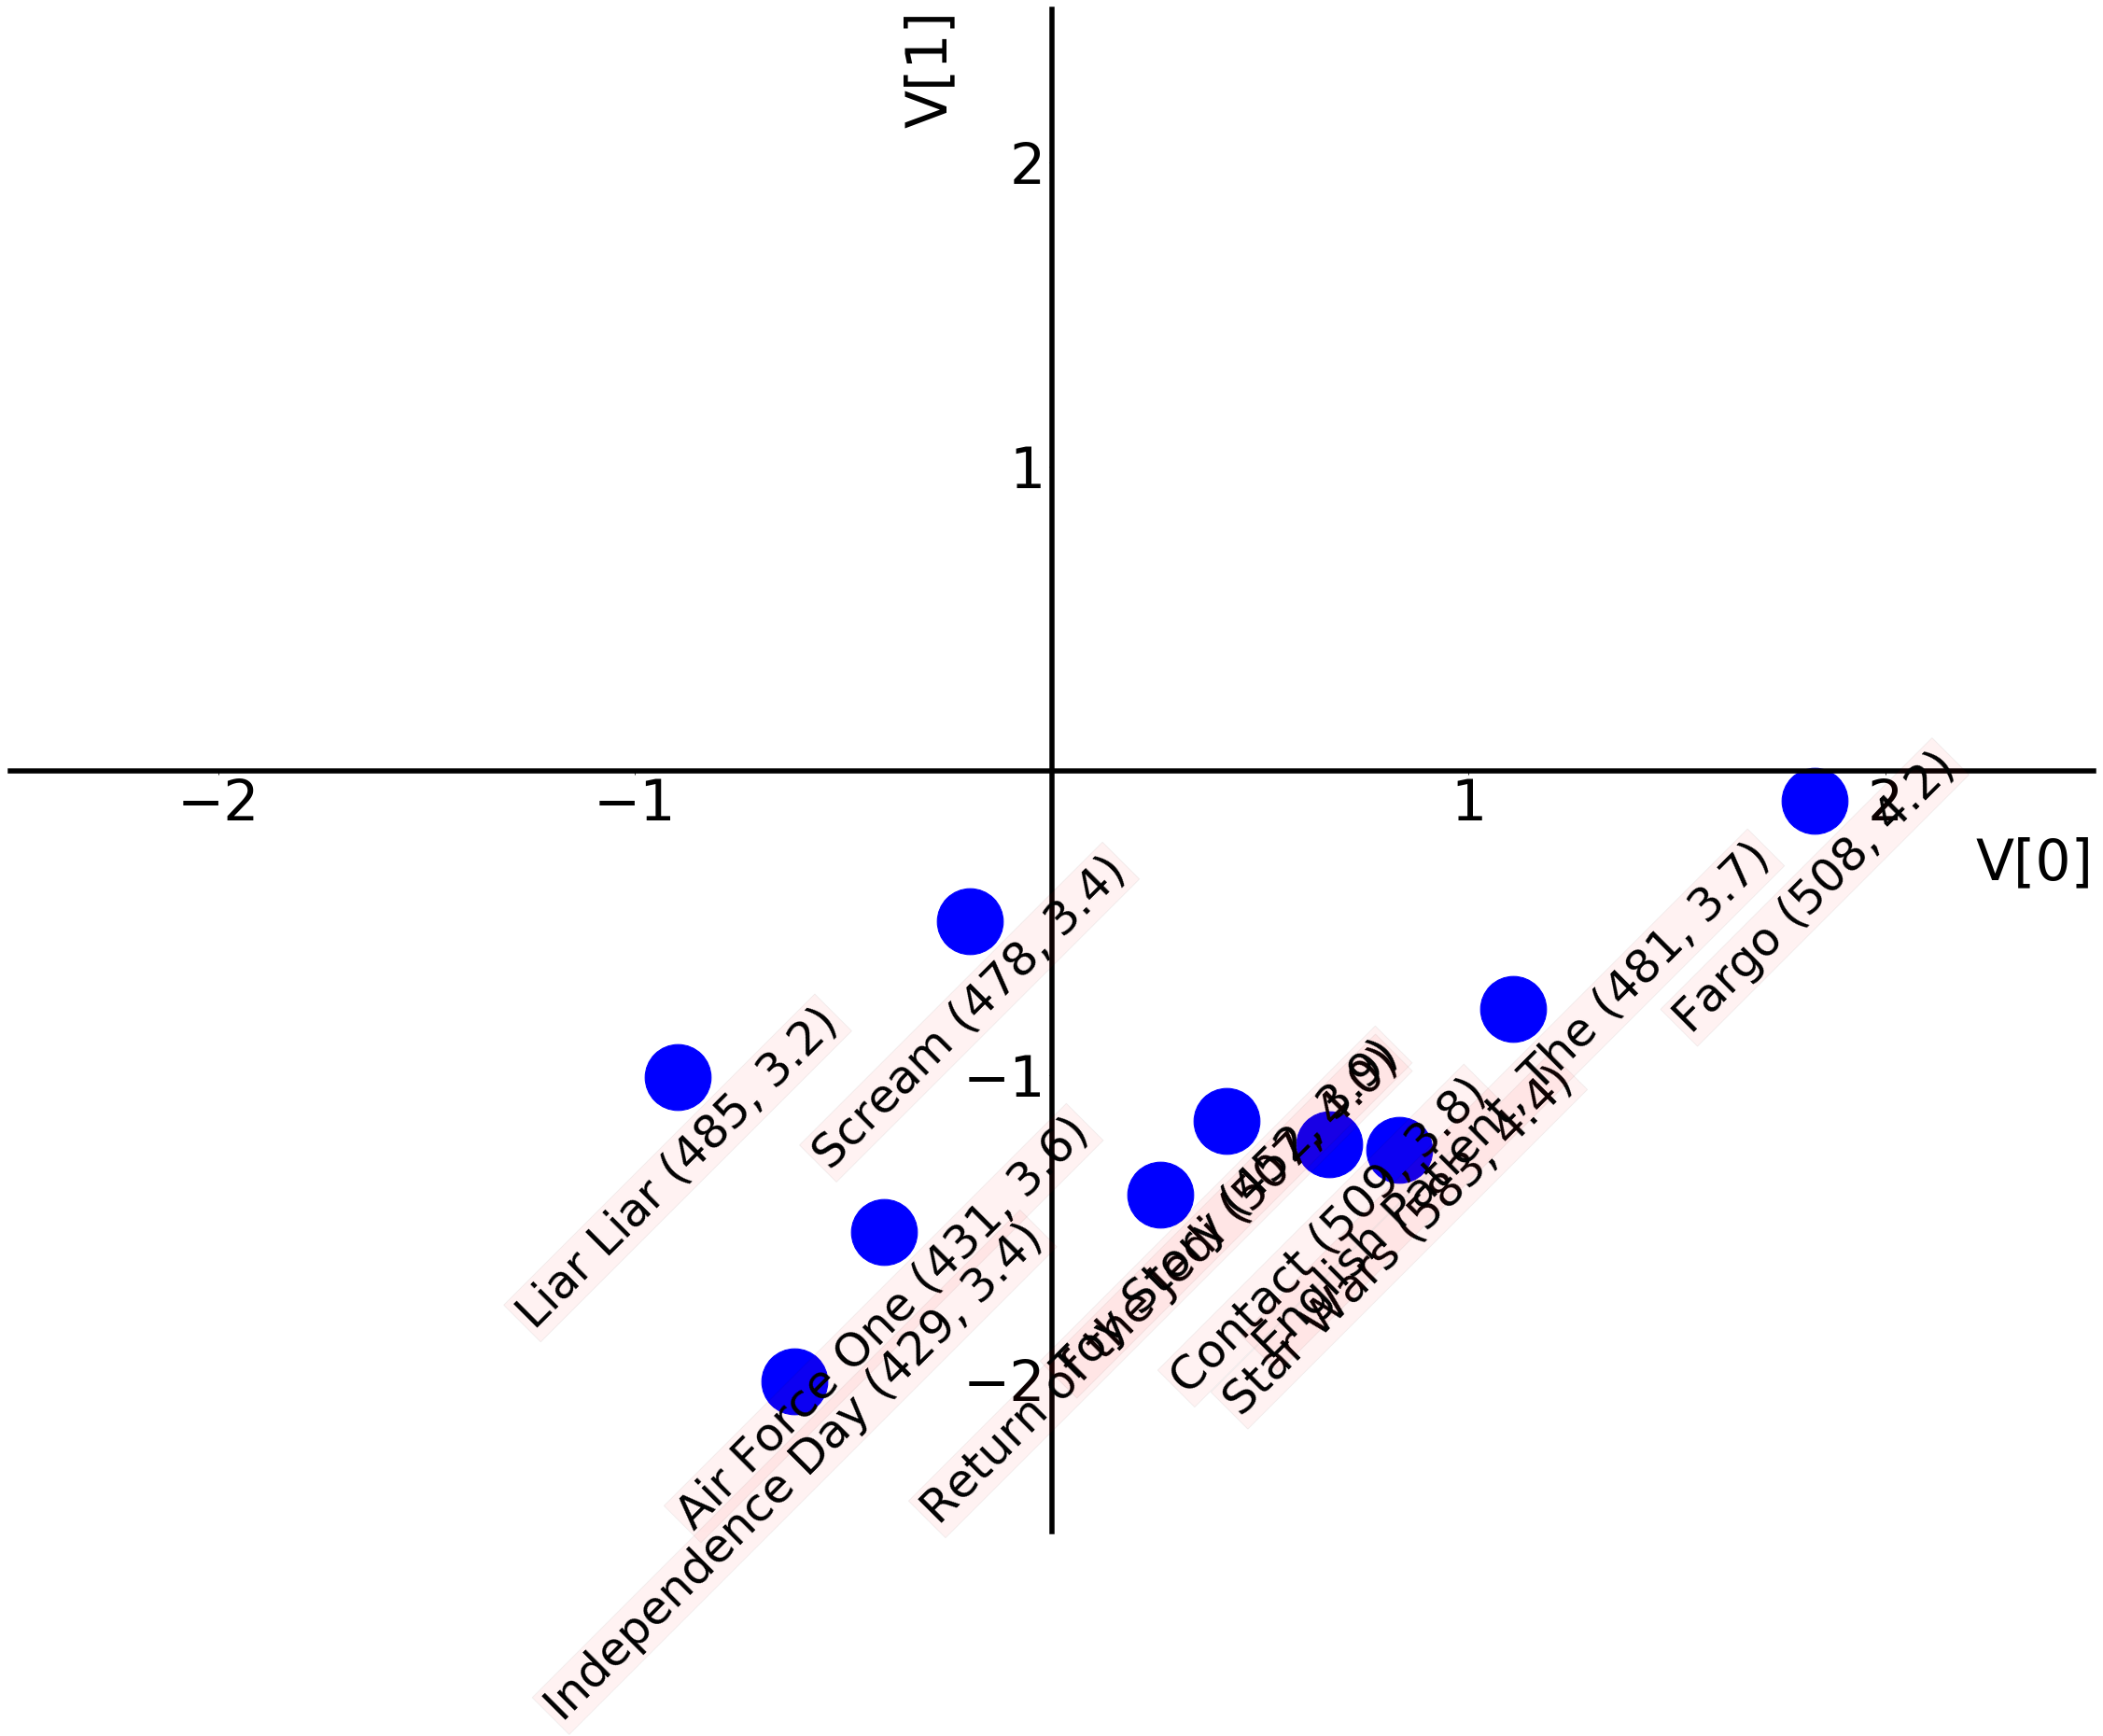

In [216]:
## perform SVD to V and get the A, Sigma, B
U_bias = UT_bias.transpose()
V_bias = VT_bias.transpose()
Vp_bias = np.zeros_like(V_bias)
V_bias_row_means = np.mean(V_bias, axis=1)
for irow in range(len(V)):
    Vp_bias[irow] = V_bias[irow] - V_bias_row_means[irow]
A_bias, S_bias, B_bias =  np.linalg.svd(Vp_bias)
A12_bias = A_bias[:,[0,1]]
A12T_bias = A12_bias.transpose()
Vtilt_bias = np.matmul(A12T_bias, V_bias)

## visualize the movies of choices
visualize_V(Vtilt_bias, id_random10, name_random10, 'visualize_V_bias_random10movies')
visualize_V(Vtilt_bias, id_random10_action, name_random10_action, 'visualize_V_bias_random10movies_action')
visualize_V(Vtilt_bias, id_random10_documentary, name_random10_documentary, 'visualize_V_bias_random10movies_documentary')
visualize_V(Vtilt_bias, id_random10_drama, name_random10_drama, 'visualize_V_bias_random10movies_drama')
visualize_V(Vtilt_bias, id_best_10, name_best_10, 'visualize_V_bias_best10movies')
visualize_V(Vtilt_bias, id_most_popular_10, name_most_popular_10, 'visualize_V_bias_mostpopular10movies')

## additional visualization: average V[0] and V[1] for certain types of movies

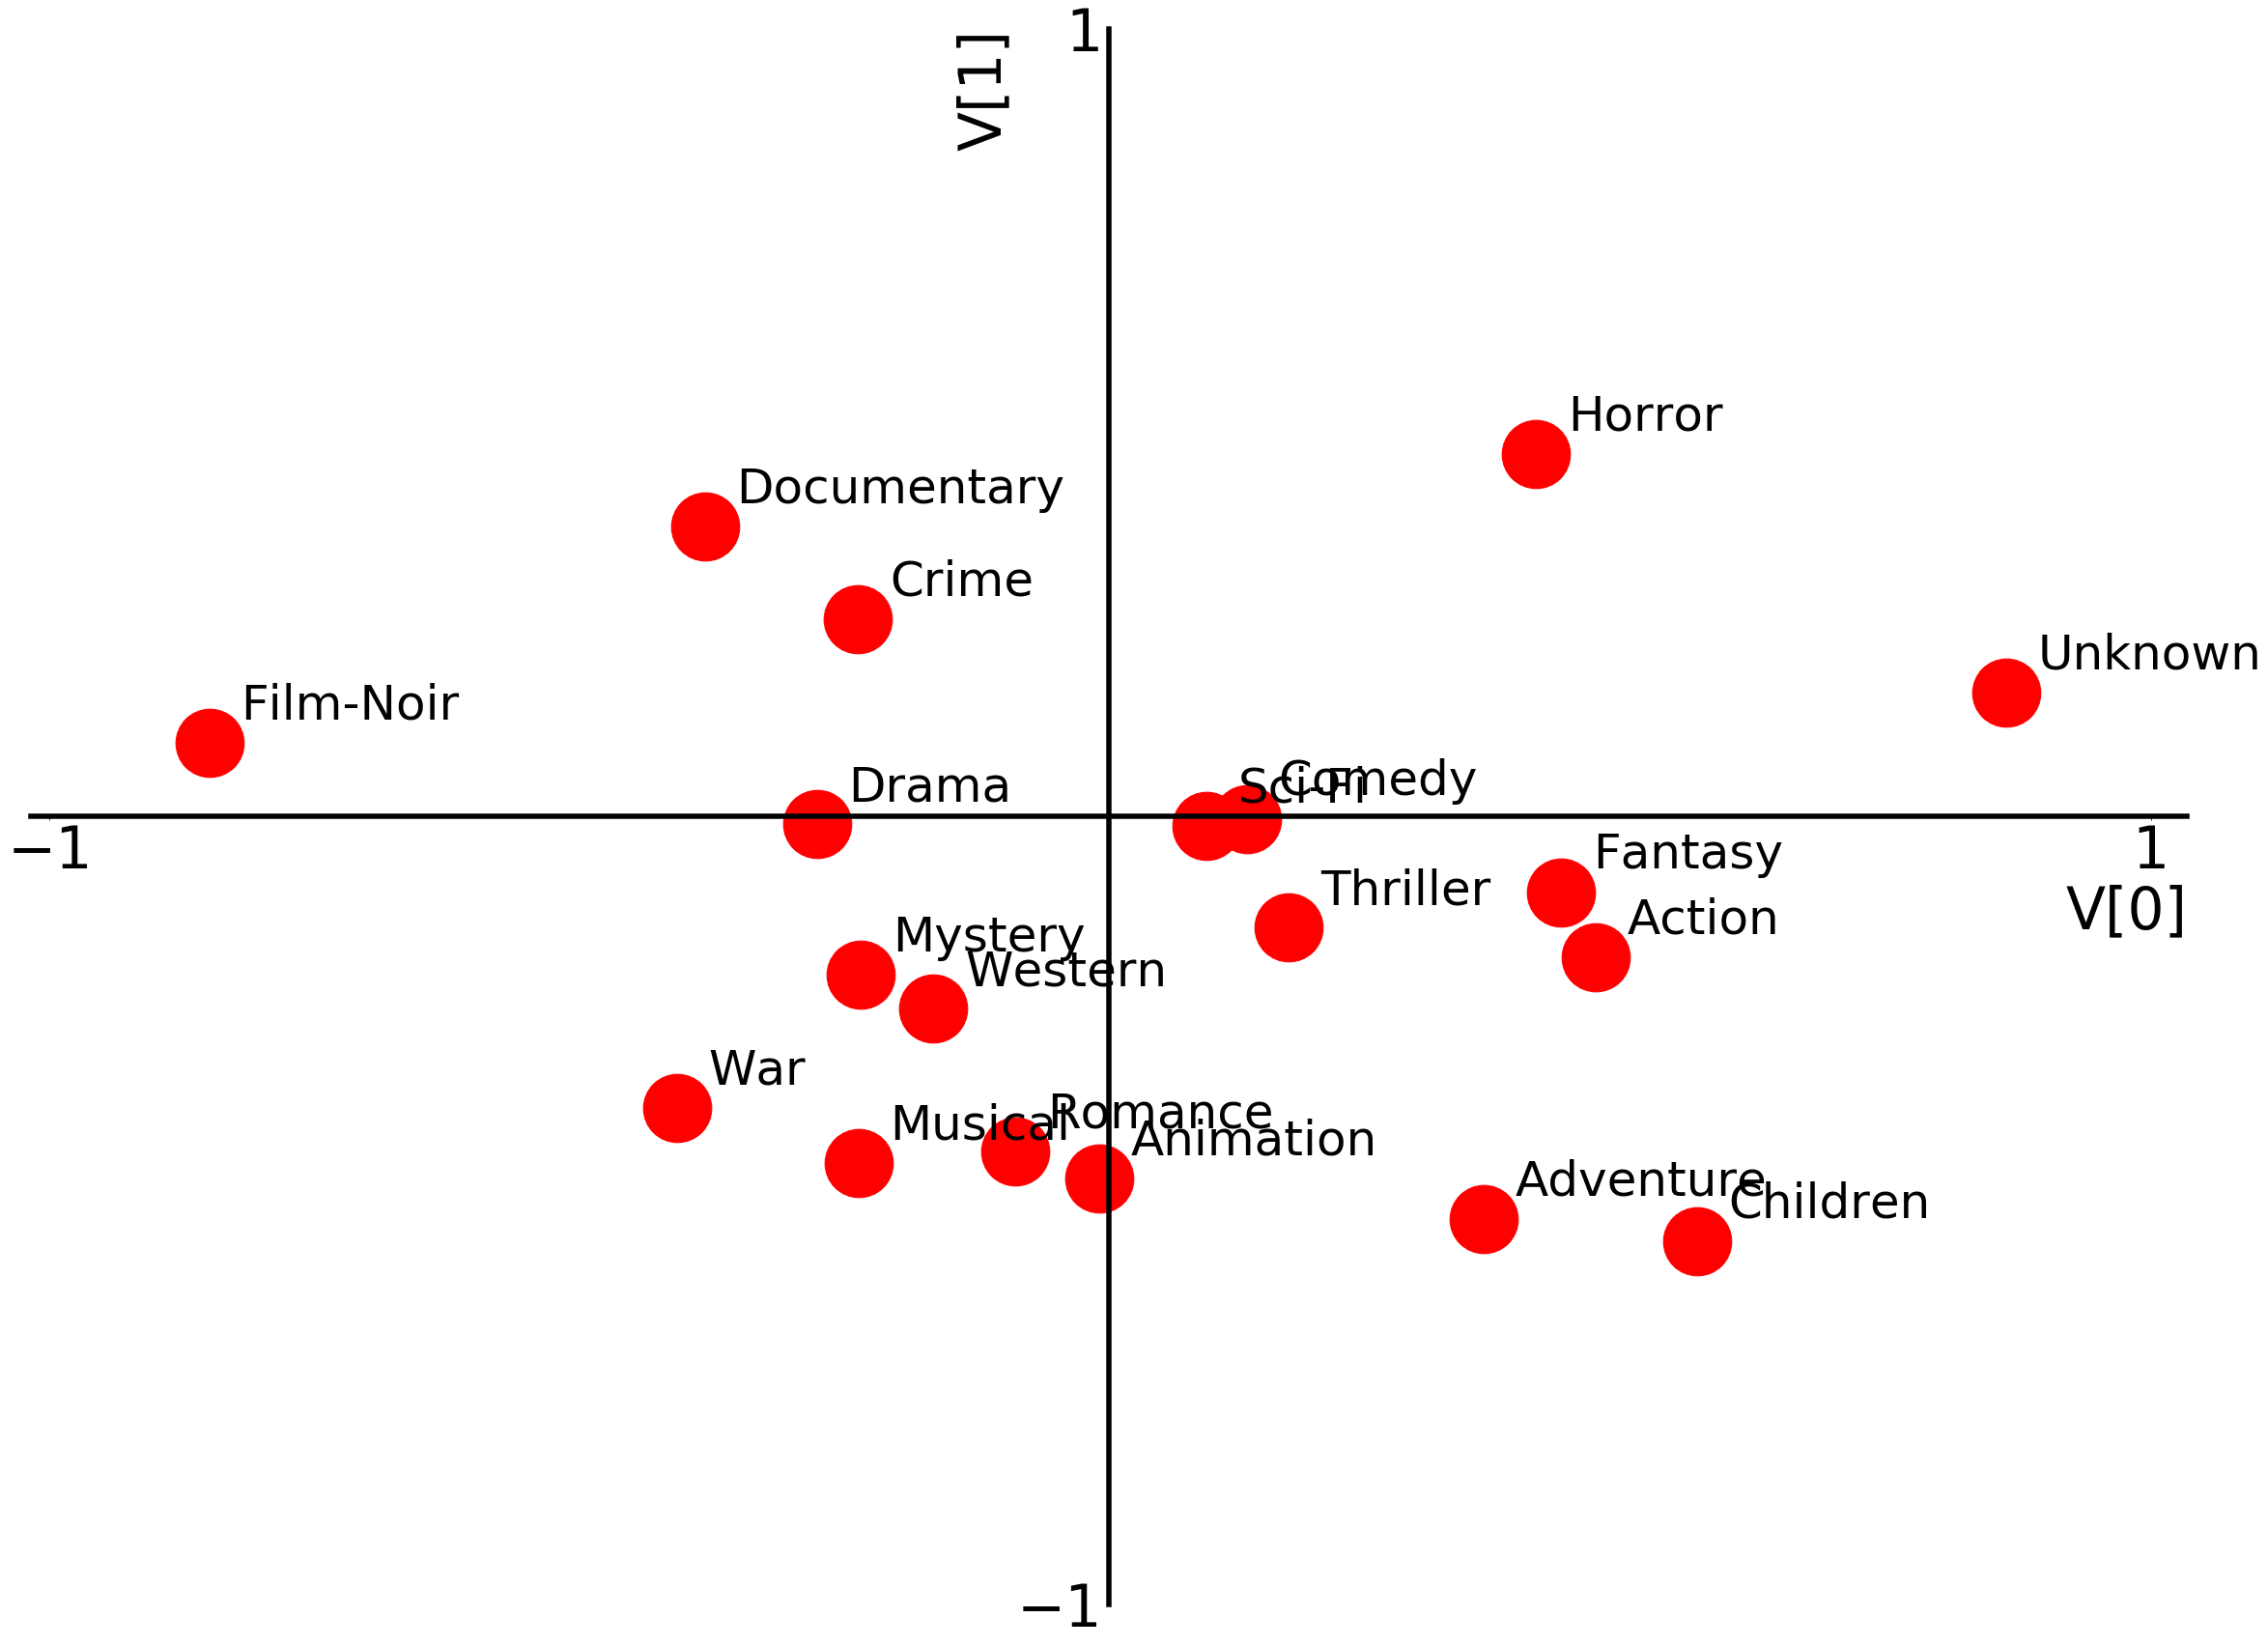

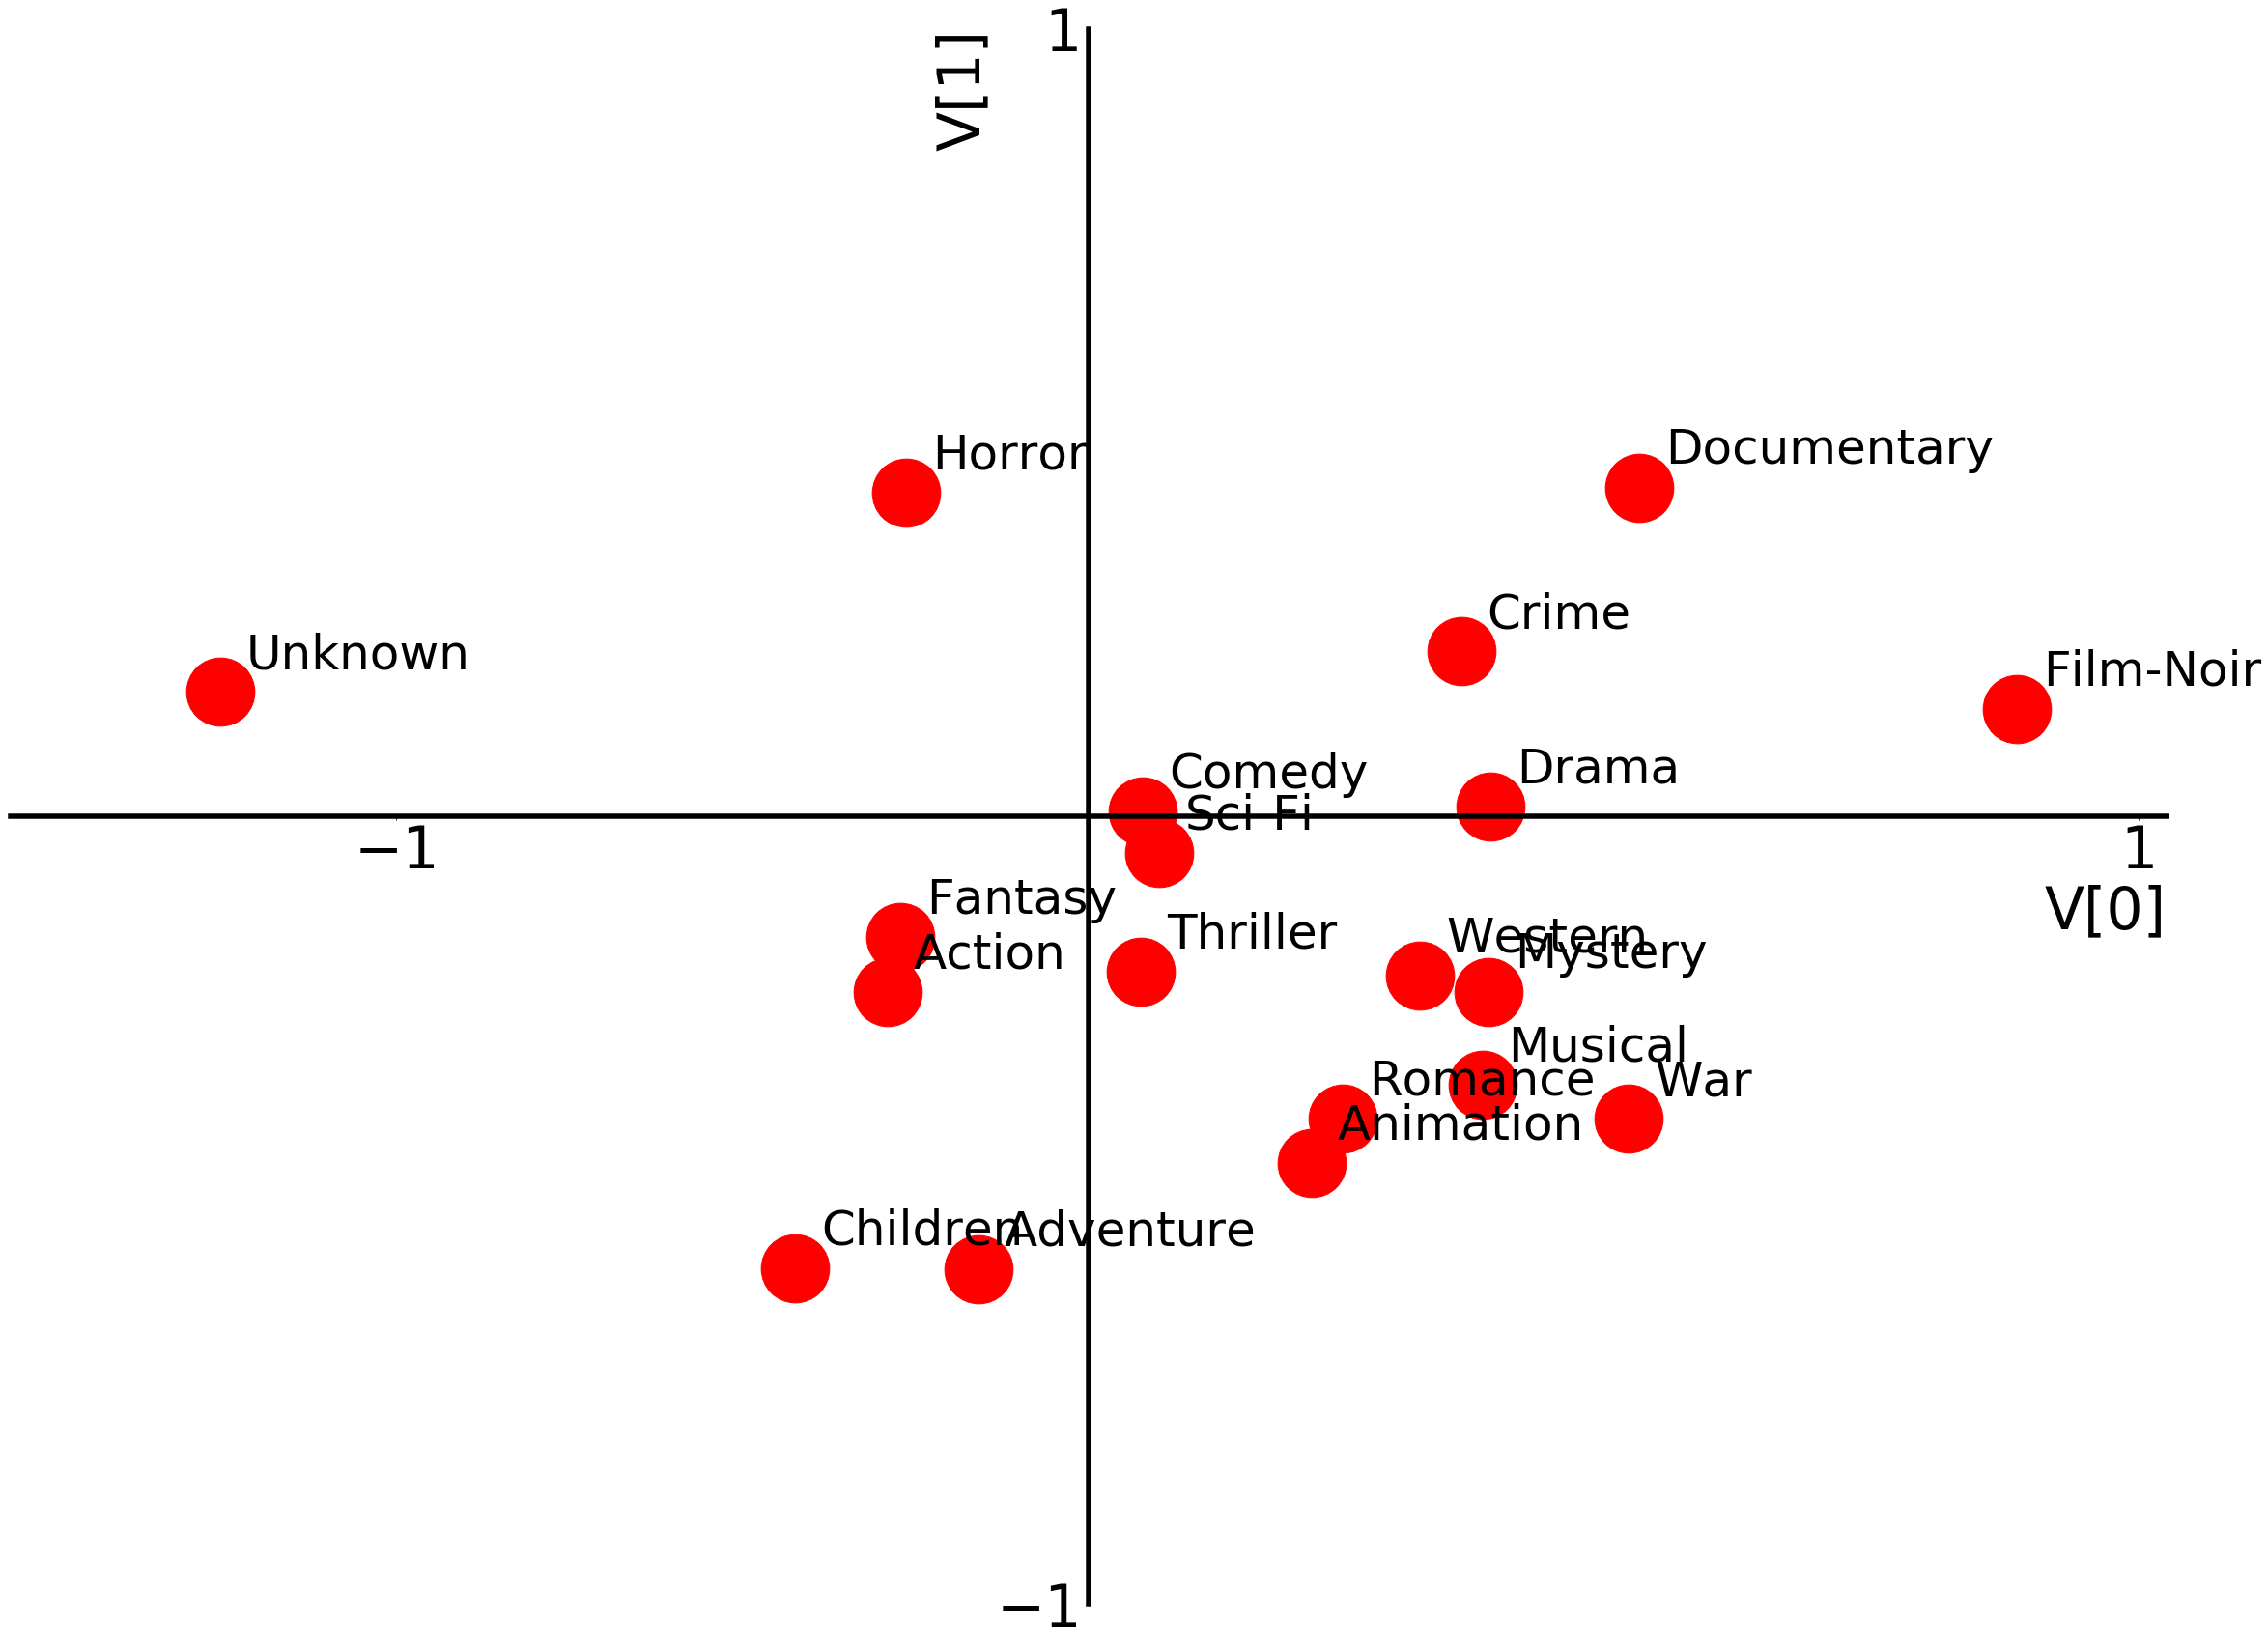

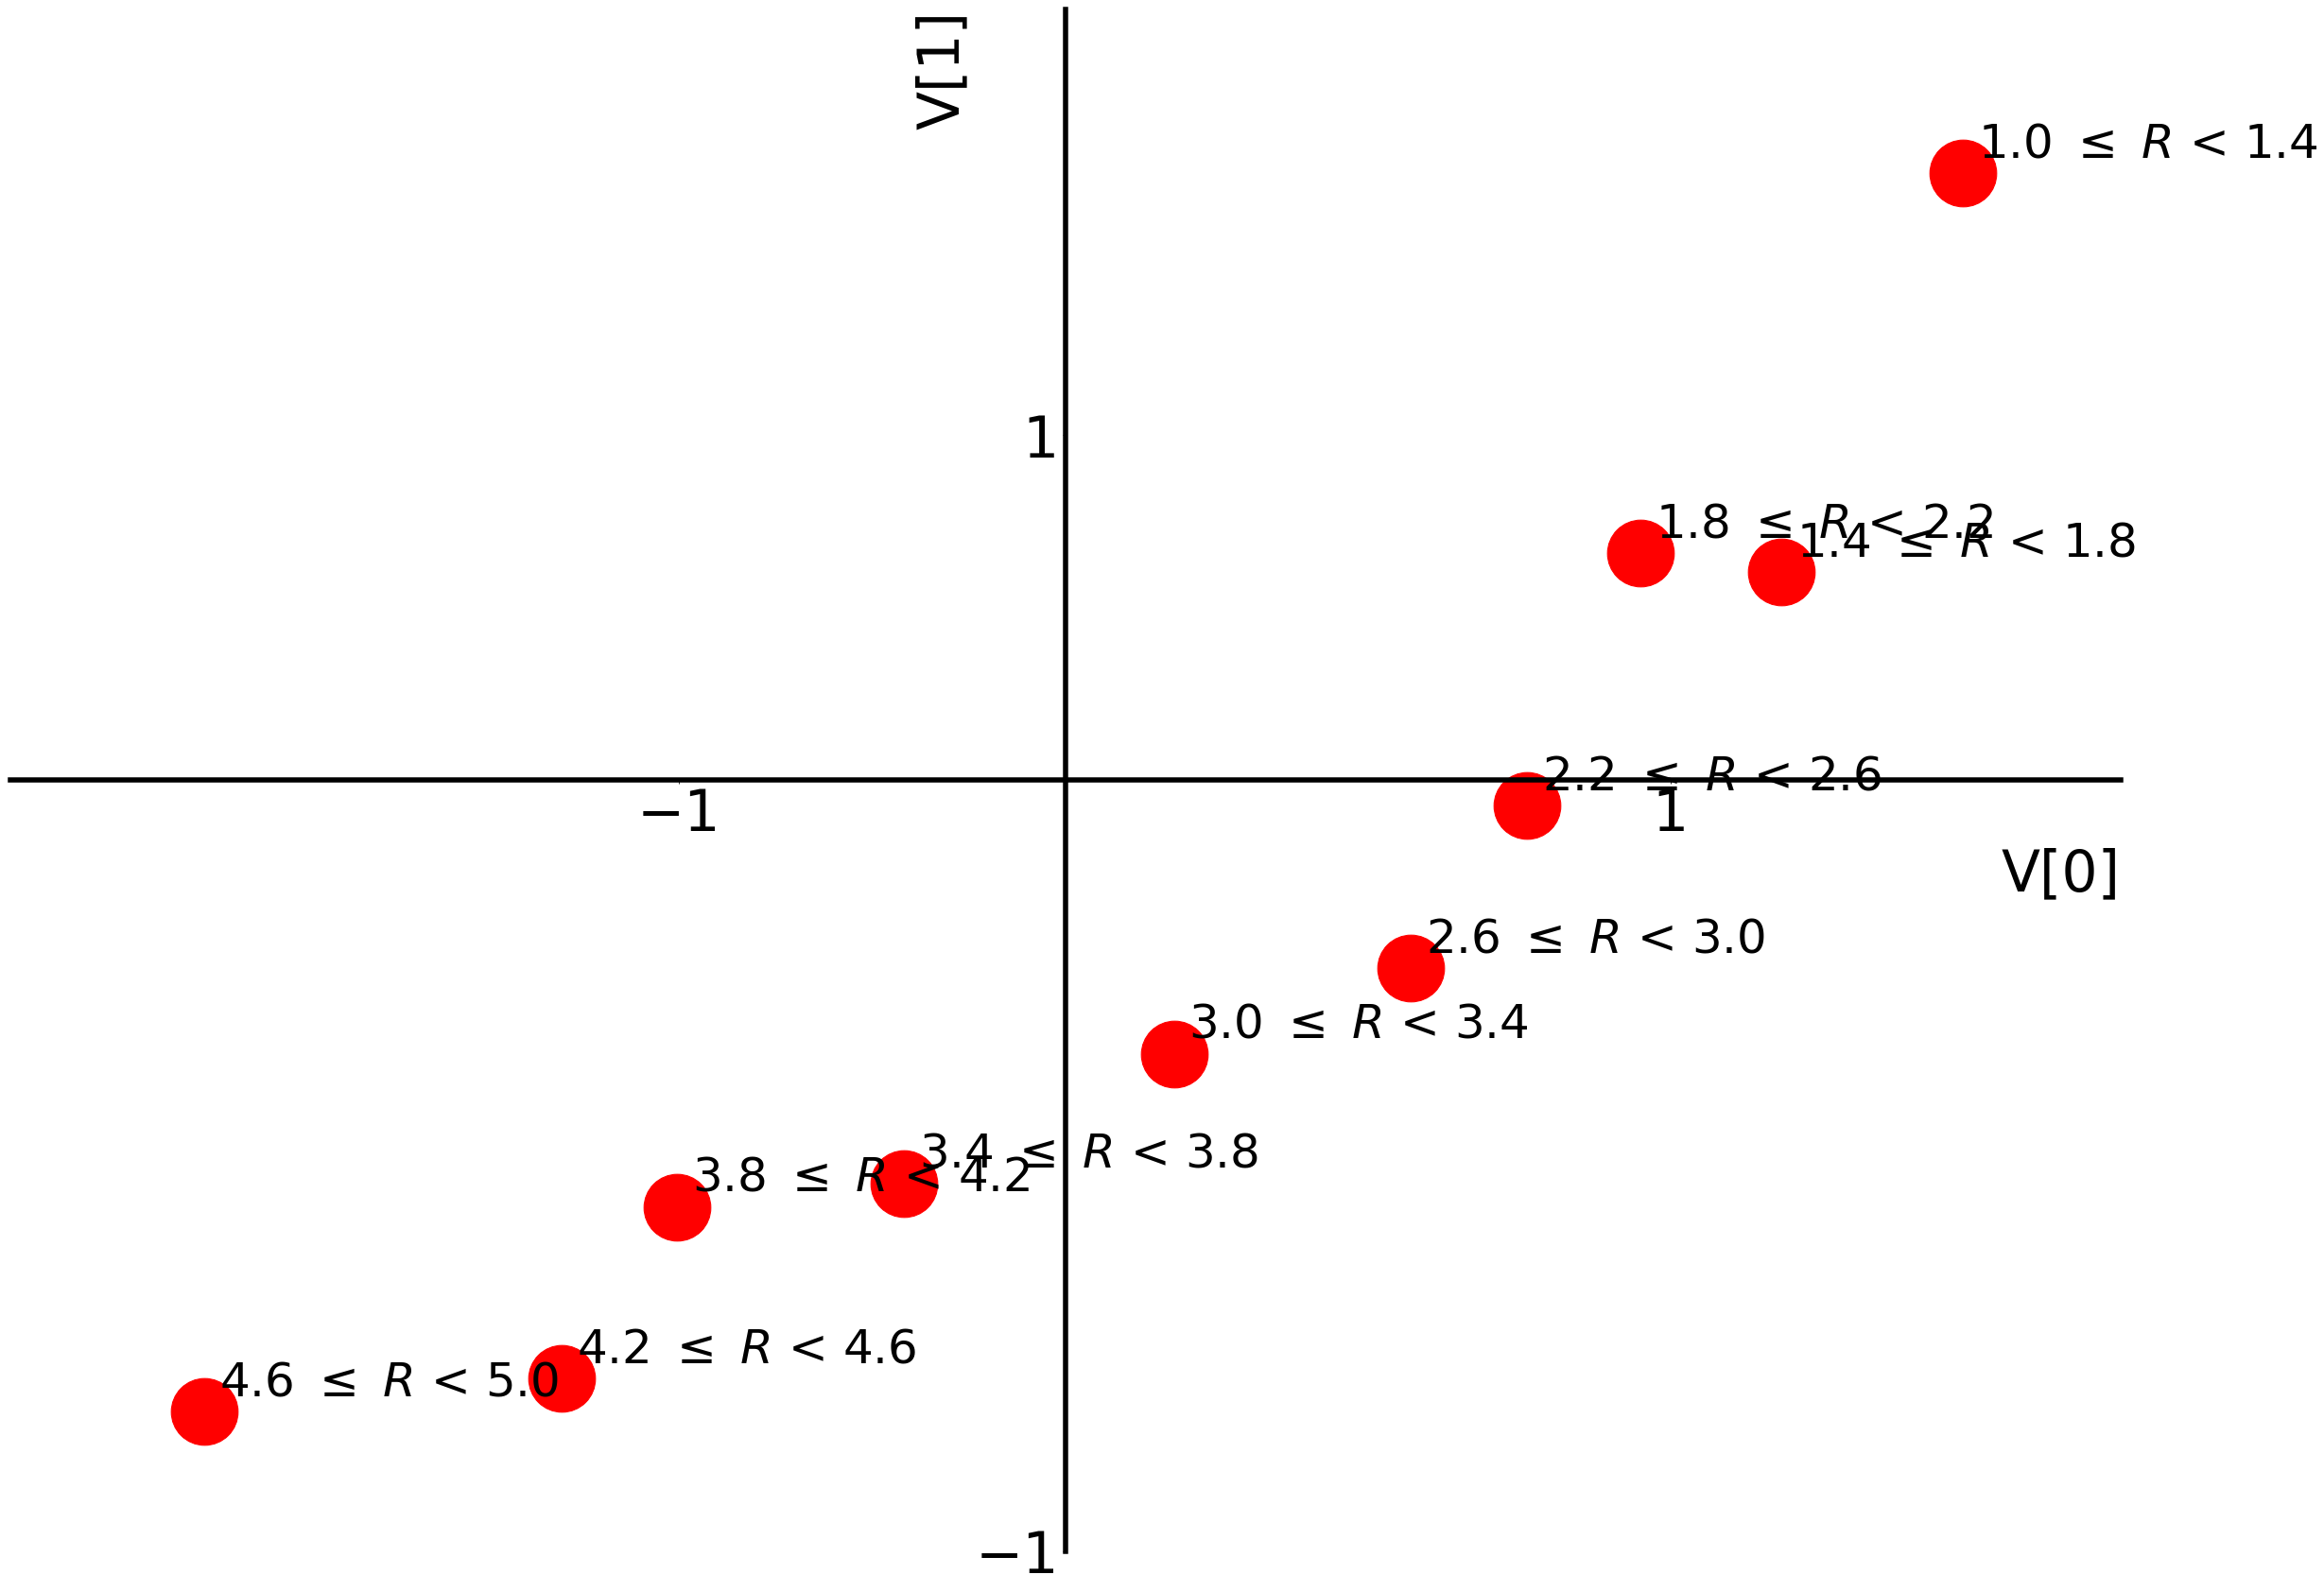

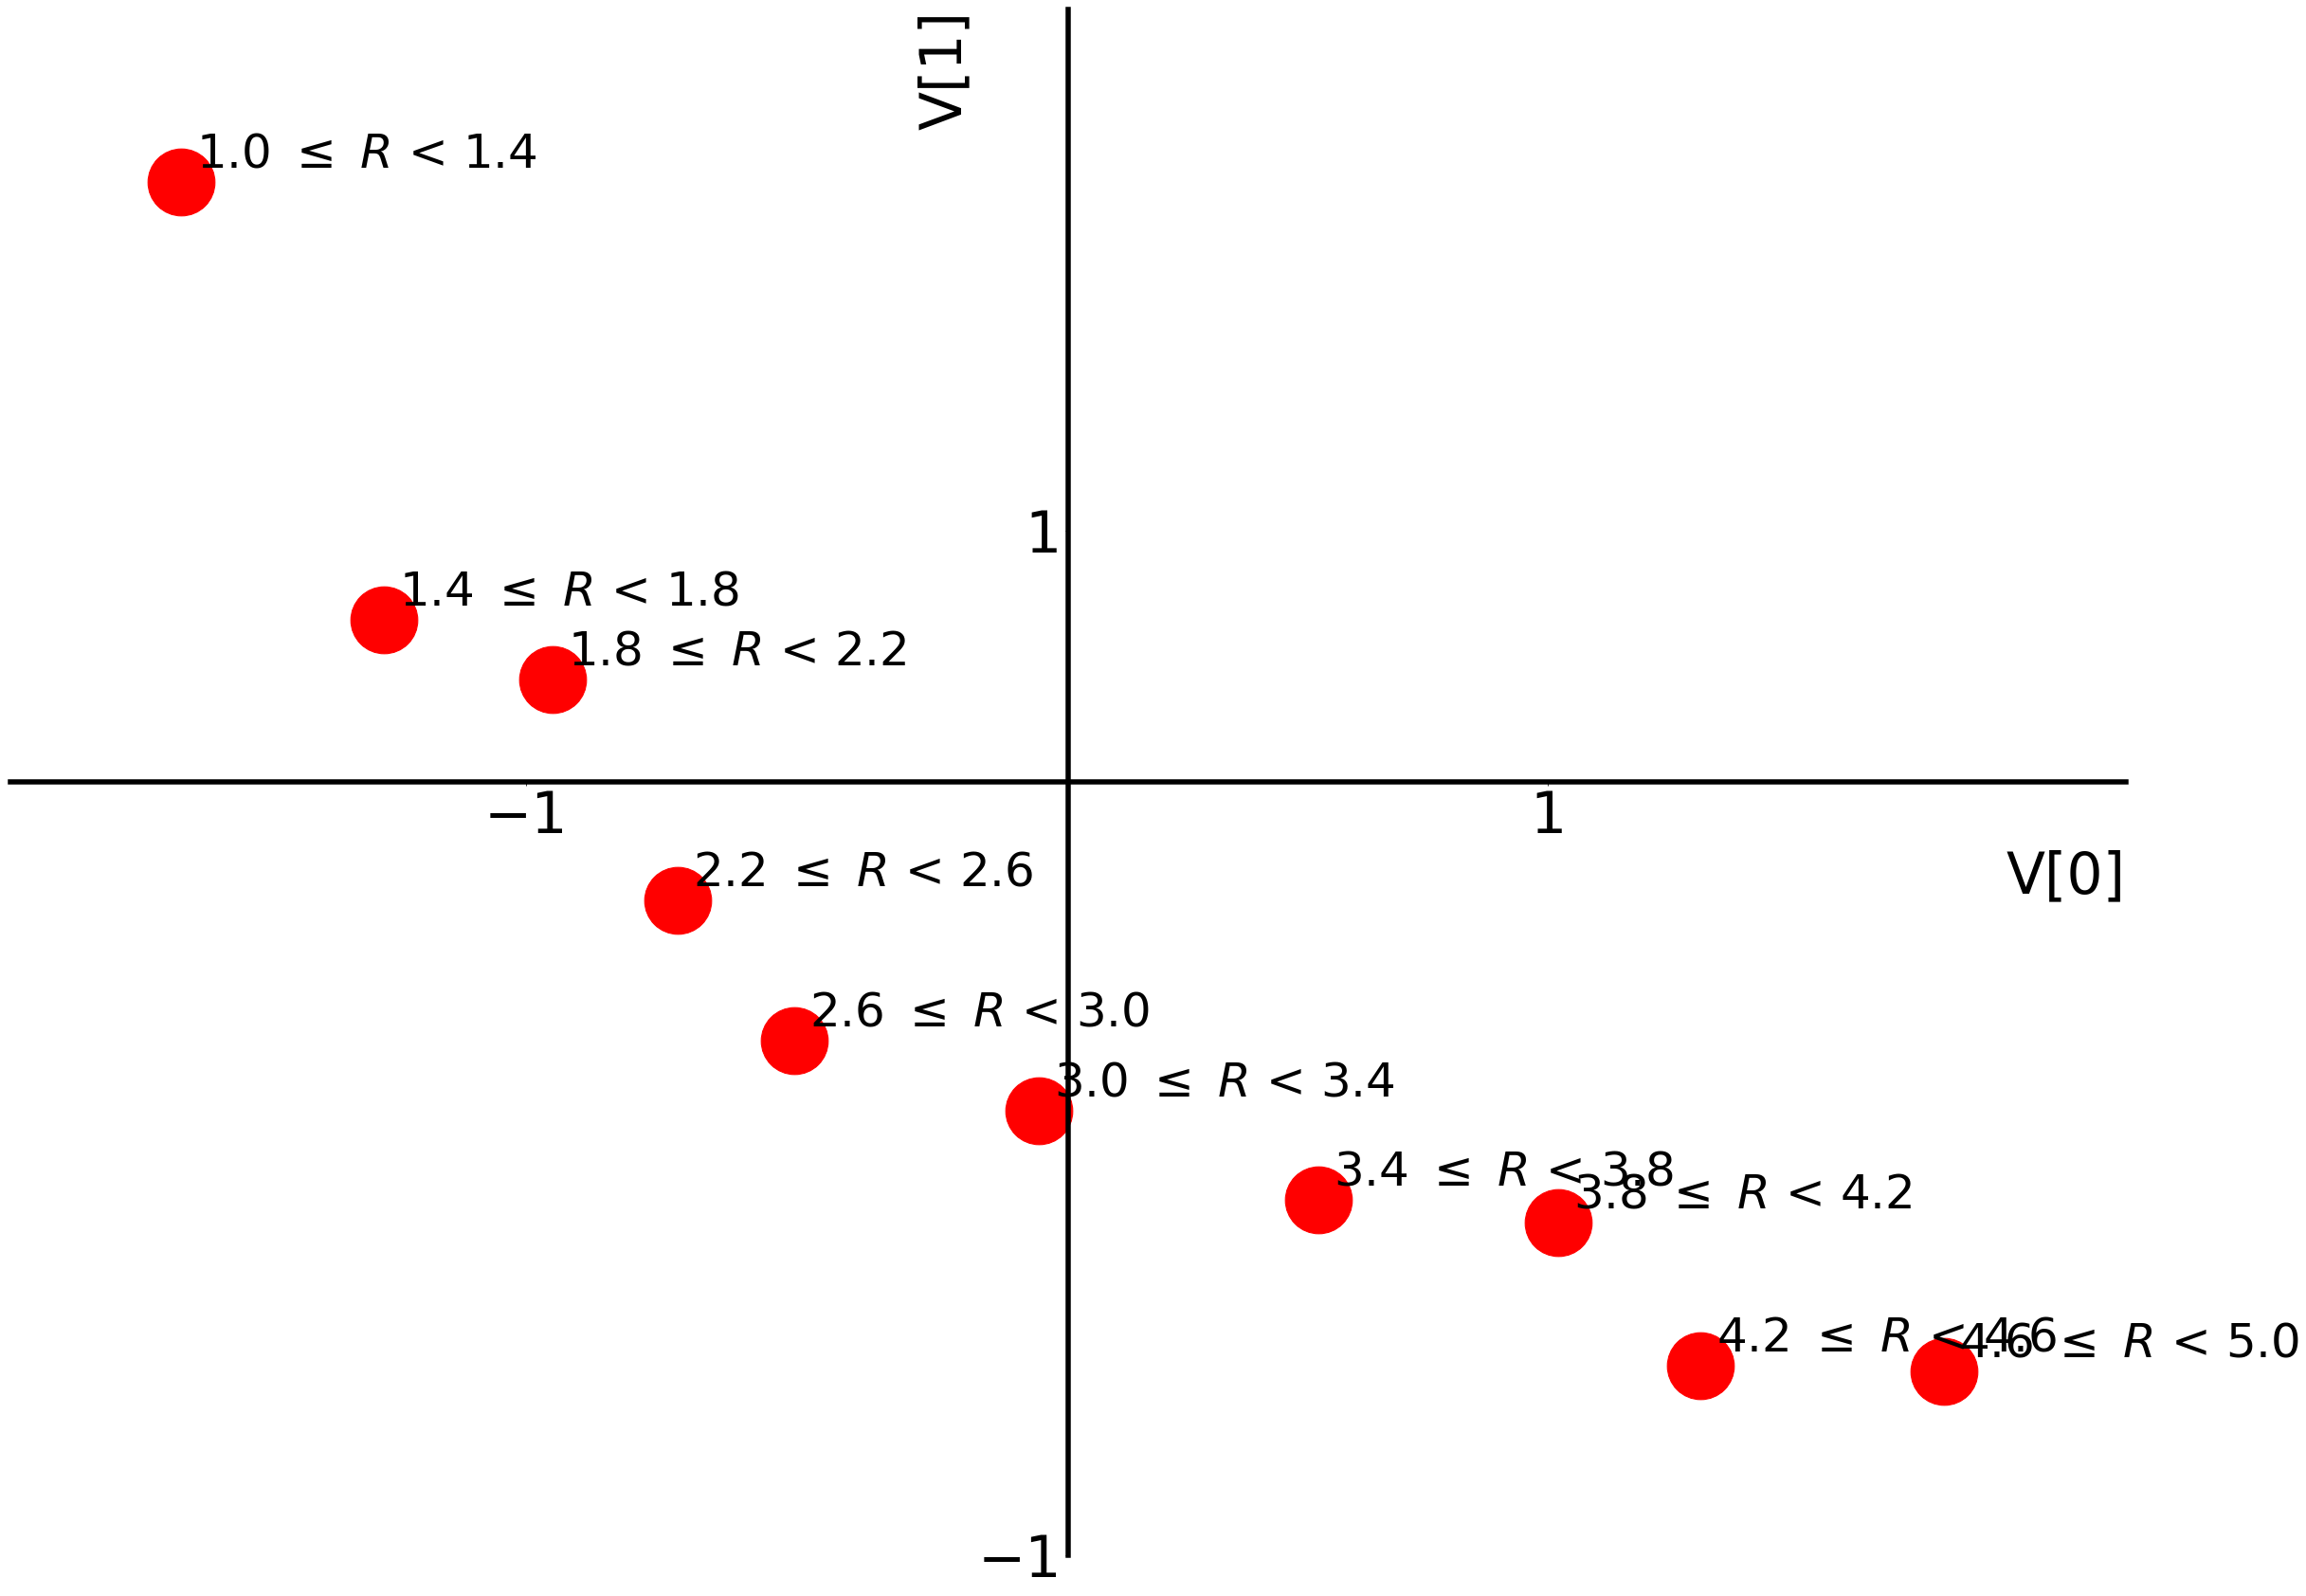

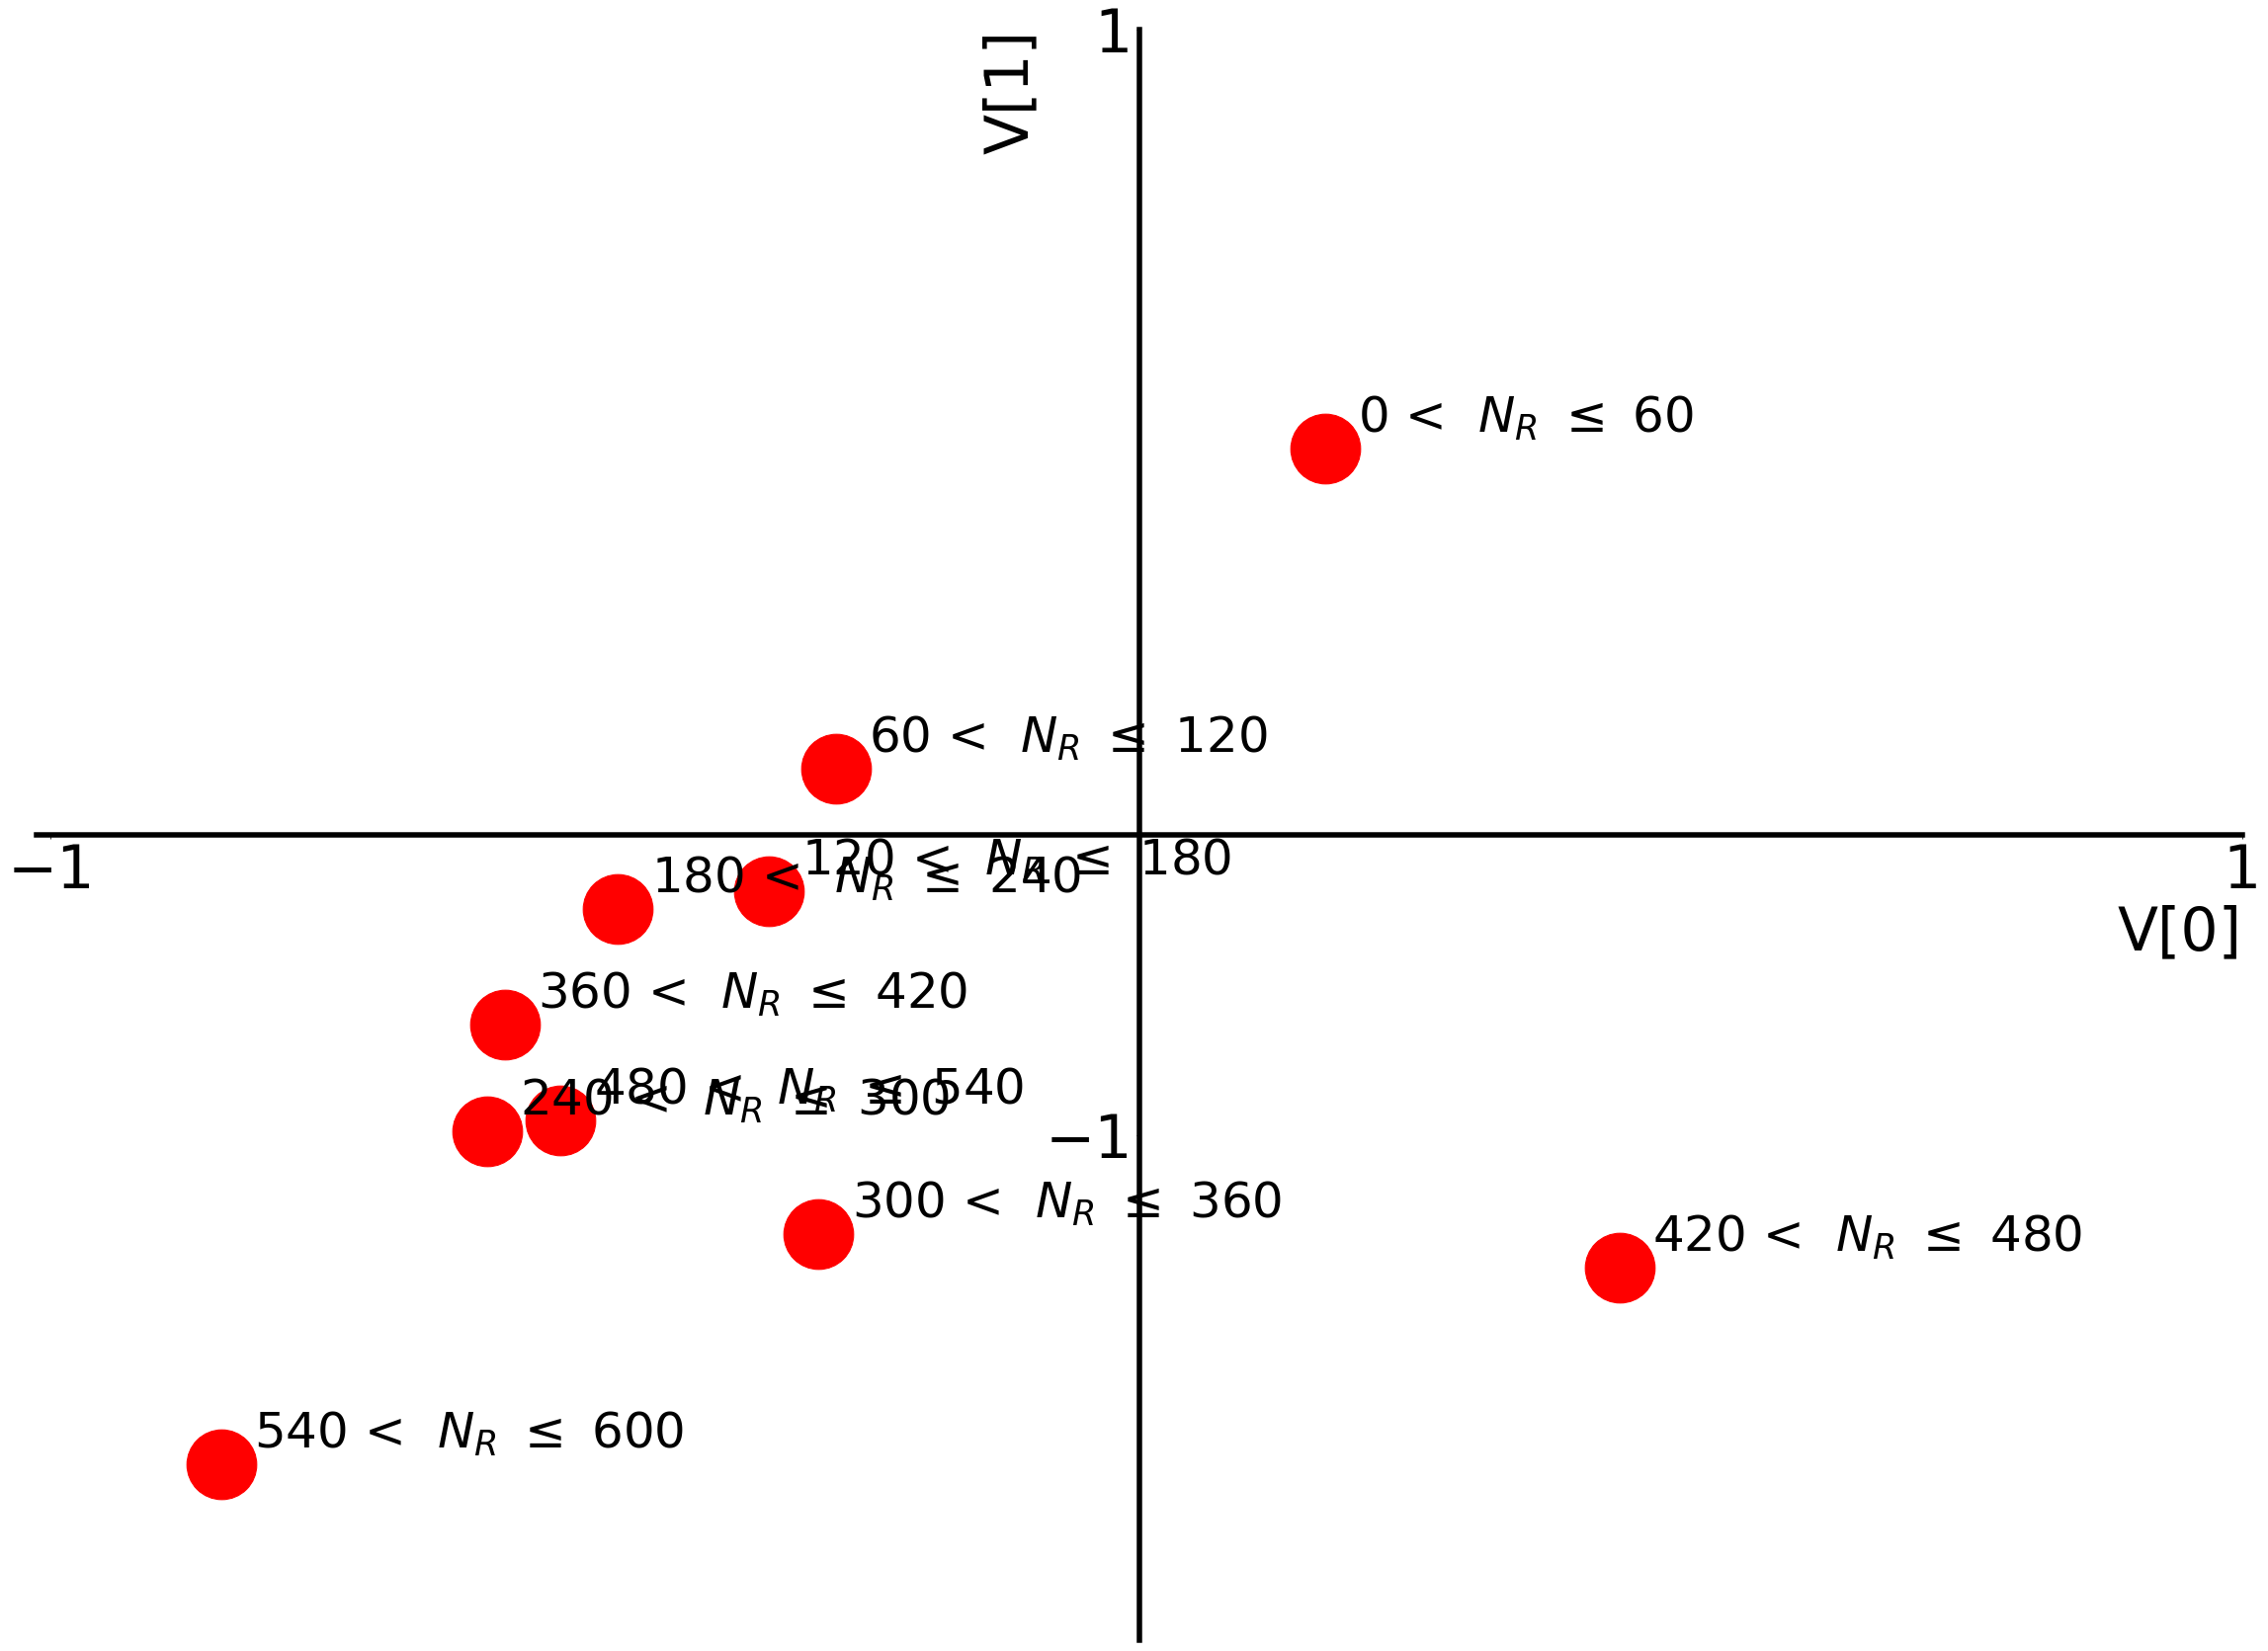

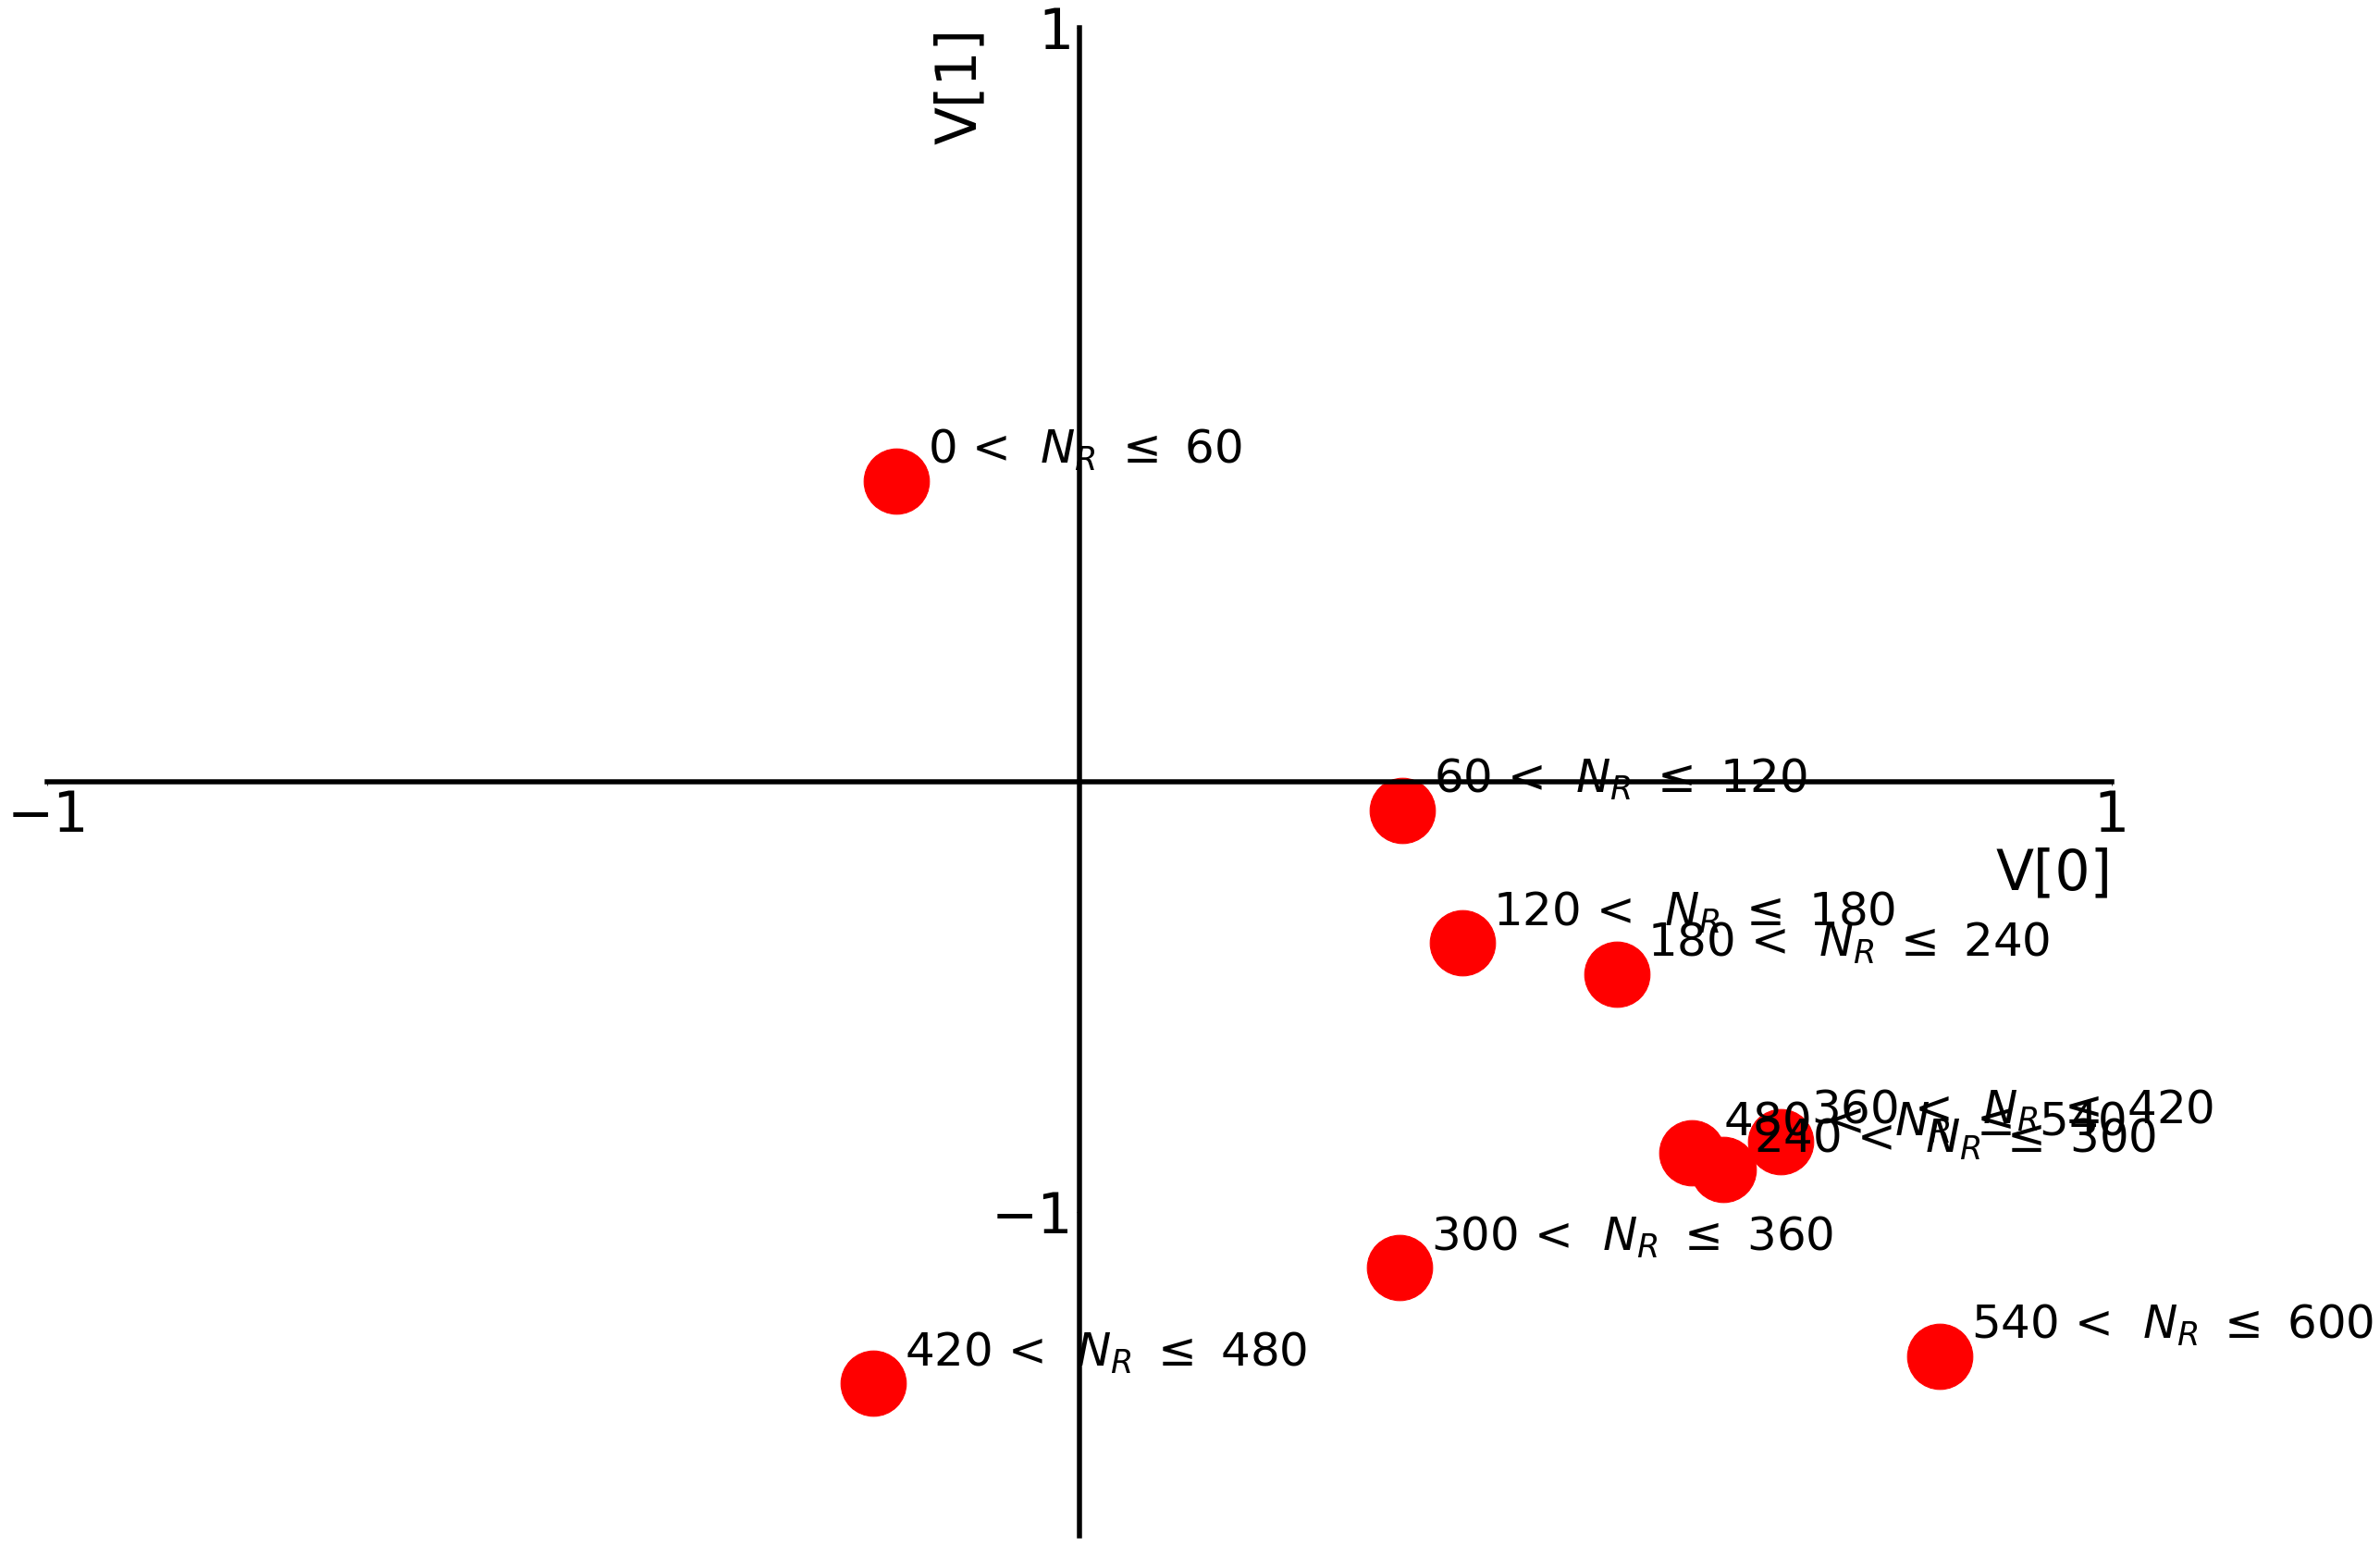

In [217]:
def visualize_V_CoM(V0, V1, labels, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    V0/V1: average V[0]/V1 of the labeled group
    labels: list of labels of the groups
    figname: the figure name you want to save
    """   
    fig = plt.figure()
    fig.set_size_inches(40,30)
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(labels)):
        plt.scatter(V0[idx], V1[idx], marker='o', s=5000, color='red')
        plt.text(V0[idx]+0.03, V1[idx]+0.03, labels[idx], fontsize=50,rotation=0)
        #horizontalalignment='center', verticalalignment='center')
        
    plt.xlim(1.2*min(V0), 1.2*max(V0))
    plt.ylim(1.2*min(V1), 1.2*max(V1))
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_linewidth(5.5)
    ax.spines['bottom'].set_linewidth(5.5)
    ax.spines['right'].set_linewidth(5.5)
    ax.spines['top'].set_linewidth(5.5)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xticks([-1,1], fontsize=60)
    plt.yticks([-1,1], fontsize=60)
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0, fontsize=60)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0, fontsize=60)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')
def averageV(Vtilt, ids):
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
    V0 = 0.0
    V1 = 0.0
    for idx in range(len(ids)):
        V0 += Vtiltp[0][ids[idx]]
        V1 += Vtiltp[1][ids[idx]]
    V0 = V0/len(ids)
    V1 = V1/len(ids)
    return V0, V1

##plot the average V[0] and V[1] for all the 19 types of movies
generes_all = ['Unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
V0_generes_all = np.zeros(len(generes_all))
V1_generes_all = np.zeros(len(generes_all))

V0_generes_all_bias = np.zeros(len(generes_all))
V1_generes_all_bias = np.zeros(len(generes_all))

for idx in range(len(generes_all)):
    ids_genere = [i for i in range(len(movies_all)) if movies_all[i][2+idx] ==1]
    V0_generes_all[idx],  V1_generes_all[idx]= averageV(Vtilt, ids_genere)
    V0_generes_all_bias[idx],  V1_generes_all_bias[idx]= averageV(Vtilt_bias, ids_genere)
#print(V0_generes_all)
#print(V1_generes_all)

visualize_V_CoM(V0_generes_all, V1_generes_all, generes_all, 'visualize_V_averageV_all_generes')
visualize_V_CoM(V0_generes_all_bias, V1_generes_all_bias, generes_all, 'visualize_V_bias_averageV_all_generes')

##plot average V[0] and V[1] in bins of average ratings
range_rating = []
V0_ratings_all = np.zeros(10)
V1_ratings_all = np.zeros(10)
V0_ratings_all_bias = np.zeros(10)
V1_ratings_all_bias = np.zeros(10)

for idx in range(10):
    rating_low = 1.0 + idx*(5.0-1.0)/10
    rating_high = 1.0 + (idx+1)*(5.0-1.0)/10
    range_rating.append("%.1f $\leq$ $R$ < %.1f"%(rating_low, rating_high))
    ids_rating = [i for i in range(len(average_ratings_all)) if average_ratings_all[i] >= rating_low and average_ratings_all[i] < rating_high]
    V0_ratings_all[idx],  V1_ratings_all[idx]= averageV(Vtilt, ids_rating) 
    V0_ratings_all_bias[idx],  V1_ratings_all_bias[idx]= averageV(Vtilt_bias, ids_rating) 
#print(range_rating)
#print(V0_ratings_all)
#print(V1_ratings_all)
visualize_V_CoM(V0_ratings_all, V1_ratings_all, range_rating, 'visualize_V_averageV_all_ratings')
visualize_V_CoM(V0_ratings_all_bias, V1_ratings_all_bias, range_rating, 'visualize_V_bias_averageV_all_ratings')

##plot average V[0] and V[1] in bins of average num of ratings
range_Nrating = []
V0_Nratings_all = np.zeros(10)
V1_Nratings_all = np.zeros(10)
V0_Nratings_all_bias = np.zeros(10)
V1_Nratings_all_bias = np.zeros(10)

for idx in range(10):
    Nrating_low = 0.0 + idx*(600.0-0.0)/10
    Nrating_high = 0.0 + (idx+1)*(600.0-0.0)/10
    range_Nrating.append("%.0f <  $N_{R}$ $\leq$ %.0f"%(Nrating_low, Nrating_high))
    ids_Nrating = [i for i in range(len(num_of_ratings_all)) if num_of_ratings_all[i] > Nrating_low and num_of_ratings_all[i] <= Nrating_high]
    #print(ids_Nrating)
    V0_Nratings_all[idx],  V1_Nratings_all[idx]= averageV(Vtilt, ids_Nrating) 
    V0_Nratings_all_bias[idx],  V1_Nratings_all_bias[idx]= averageV(Vtilt_bias, ids_Nrating) 
#print(range_Nrating)
#print(V0_Nratings_all)
#print(V1_Nratings_all)
visualize_V_CoM(V0_Nratings_all, V1_Nratings_all, range_Nrating, 'visualize_V_averageV_all_num_of_ratings')
visualize_V_CoM(V0_Nratings_all_bias, V1_Nratings_all_bias, range_Nrating, 'visualize_V_bias_averageV_all_num_of_ratings')